<a href="https://colab.research.google.com/github/gcalambas/Matchpreditc/blob/main/matchpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,home_team,away_team,home_score,away_score,neutral,target
1748,1933-06-11,Sweden,Estonia,6,2,False,Win
1753,1933-06-29,Lithuania,Sweden,0,2,False,Lose
1772,1933-09-24,Yugoslavia,Switzerland,2,2,False,Draw
1780,1933-10-15,Poland,Czechoslovakia,1,2,False,Lose
1787,1933-10-29,Switzerland,Romania,2,2,False,Draw


,date,home_team,away_team,neutral,target,goals_home_3,goals_away_3
1748,1933-06-11,Sweden,Estonia,False,Win,0.0,0.0
1753,1933-06-29,Lithuania,Sweden,False,Lose,0.0,0.0
1772,1933-09-24,Yugoslavia,Switzerland,False,Draw,0.0,0.0
1780,1933-10-15,Poland,Czechoslovakia,False,Lose,0.0,0.0
1787,1933-10-29,Switzerland,Romania,False,Draw,0.0,0.0


,date,home_team,away_team,neutral,target,goals_home_3,goals_away_3,ranking_home,ranking_away
1748,1933-06-11,Sweden,Estonia,False,Win,0.0,0.0,83.170175,85.231579
1753,1933-06-29,Lithuania,Sweden,False,Lose,0.0,0.0,83.170175,85.231579
1772,1933-09-24,Yugoslavia,Switzerland,False,Draw,0.0,0.0,83.170175,85.231579
1780,1933-10-15,Poland,Czechoslovakia,False,Lose,0.0,0.0,83.170175,85.231579
1787,1933-10-29,Switzerland,Romania,False,Draw,0.0,0.0,83.170175,85.231579


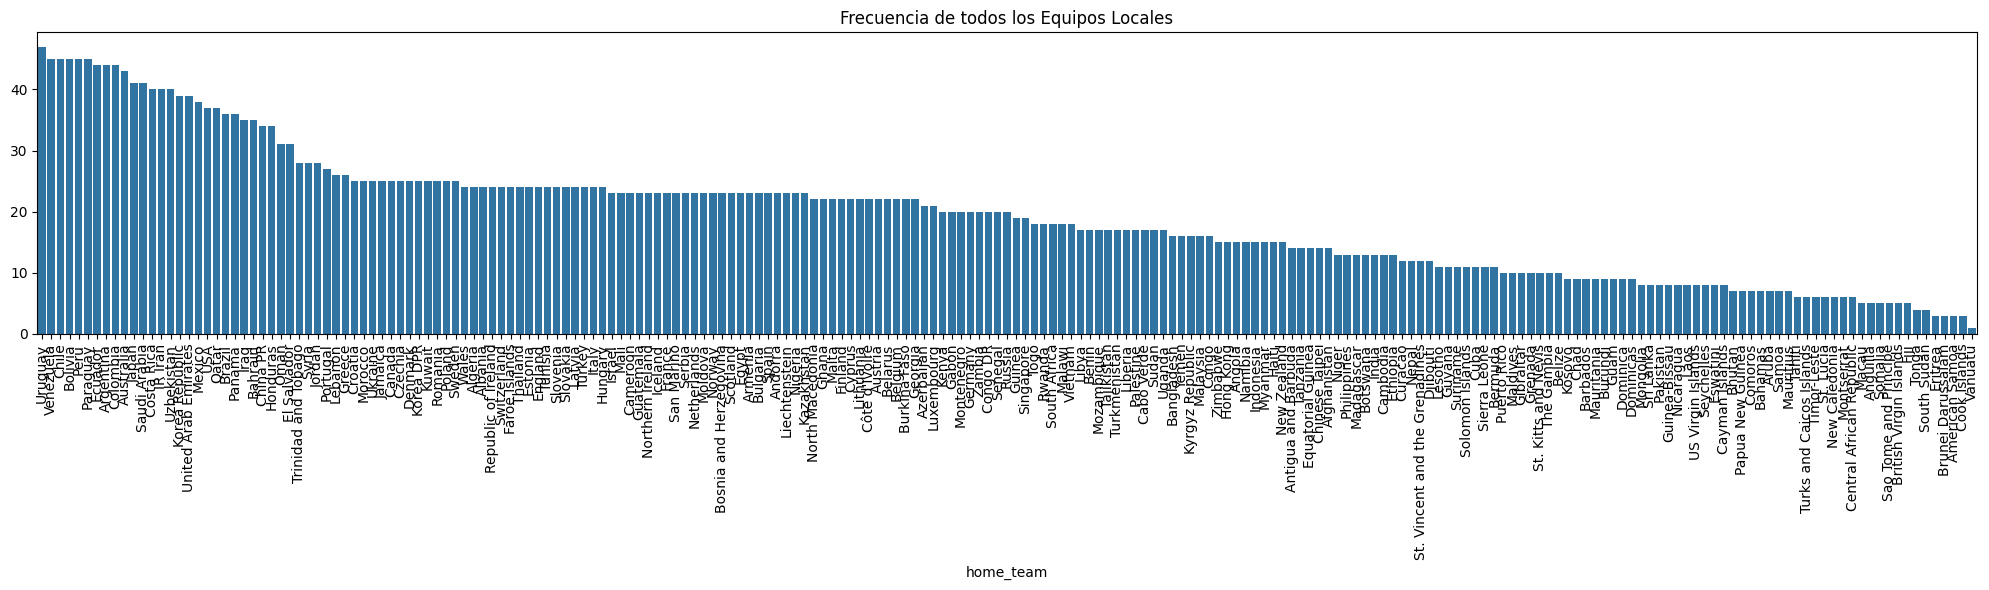

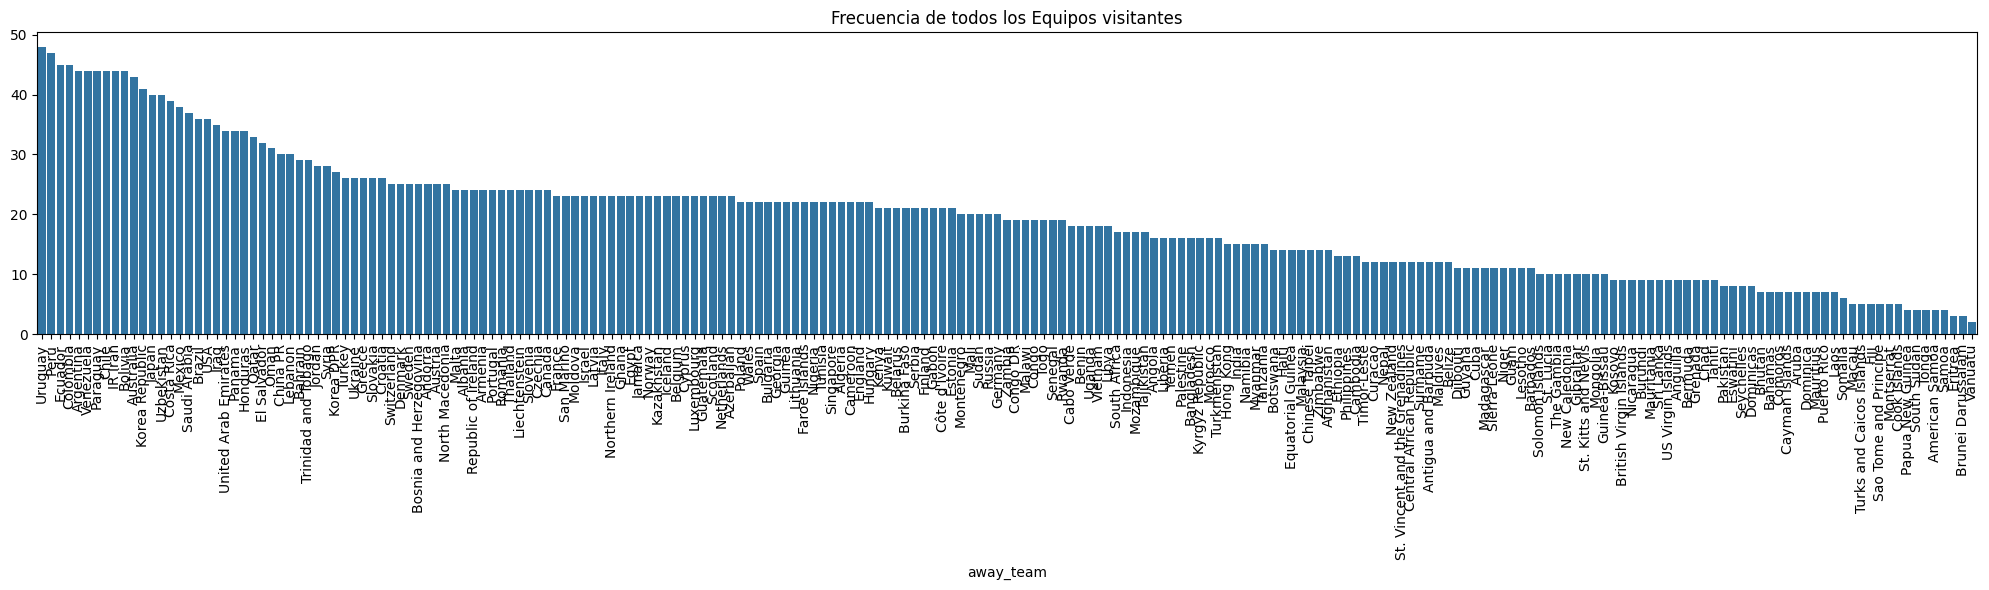

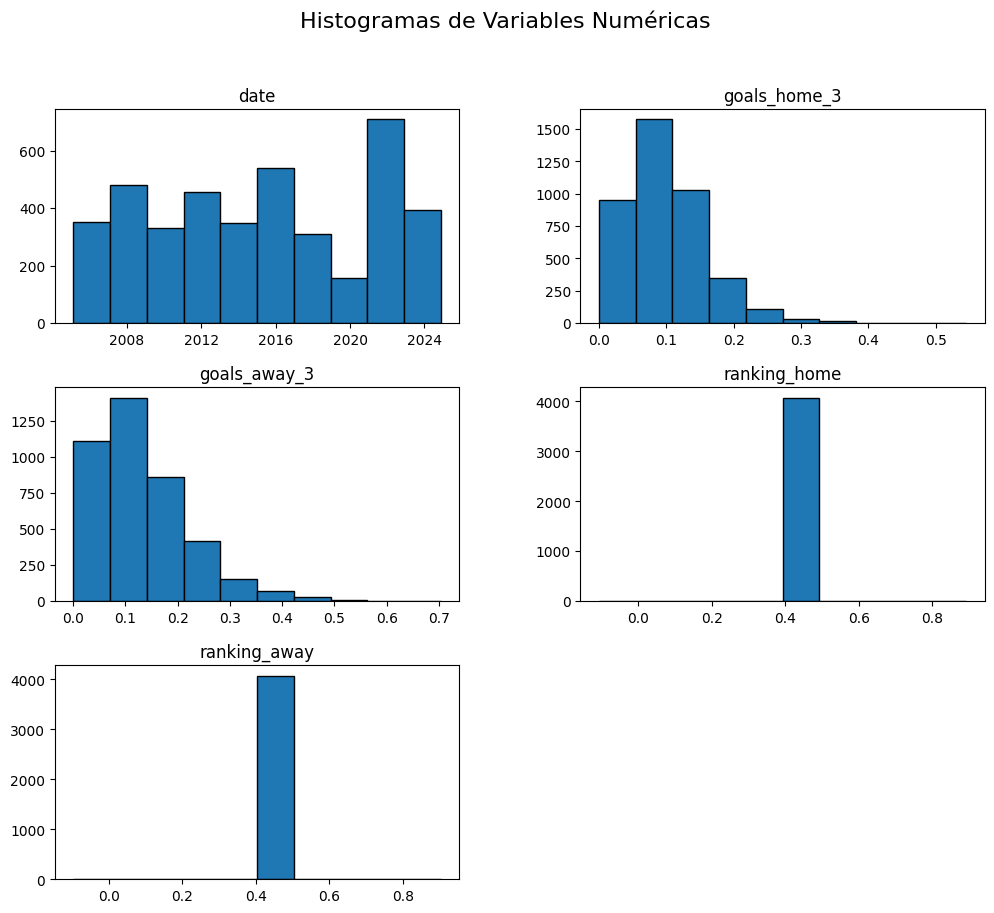

,date,neutral,target,goals_home_3,goals_away_3,ranking_home,ranking_away,home_team_Afghanistan,home_team_Albania,home_team_Algeria,...,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Zambia,away_team_Zimbabwe
28984,2005-02-09,0,Win,0.090909,0.037037,0.393159,0.403022,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28994,2005-02-09,0,Draw,0.181818,0.185185,0.393159,0.403022,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28992,2005-02-09,0,Lose,0.145455,0.148148,0.393159,0.403022,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28991,2005-02-09,0,Win,0.181818,0.000000,0.393159,0.403022,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28982,2005-02-09,0,Draw,0.090909,0.037037,0.393159,0.403022,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<ipython-input-3-adf42558e298>:224: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'Draw': 0, 'Lose': 1, 'Win': 2})


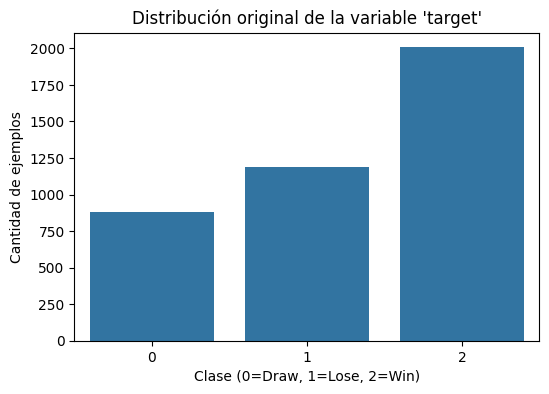

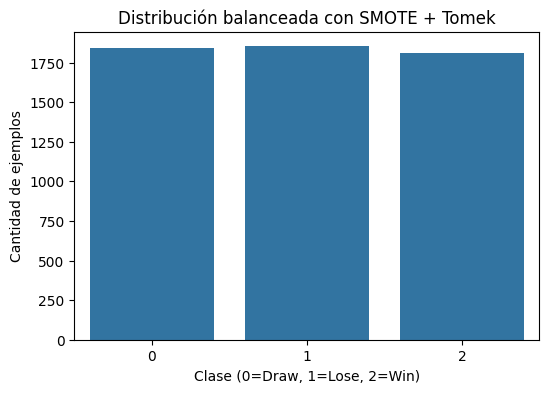

<ipython-input-3-adf42558e298>:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_balanced['target'] = y_resampled


Accuracy (Exactitud): 0.7426
Precision positiva (PPV): 0.7480
Sensibilidad (TPR / Recall): 0.7428
F1 Score: 0.7425
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


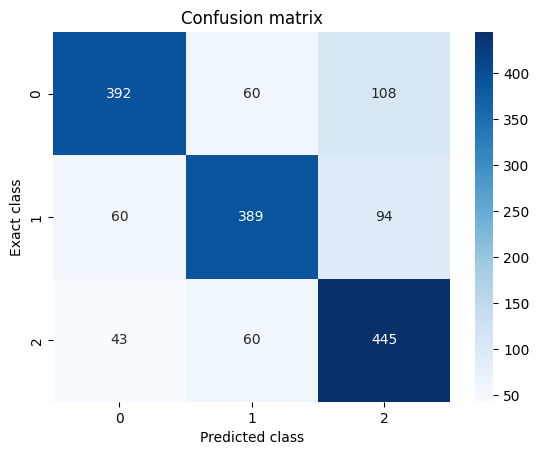

In [3]:
# -*- coding: utf-8 -*-
"""MATCHPREDICTOR.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1cQd2vRQ5SVYcFWLgsoF6ht7_tnY3XuD2

**MATCHPREDICTOR**

#Carga de bases de datos
"""

from google.colab import drive
drive.mount('/content/drive')

# 1. Cargar librerías necesarias
import pandas as pd

# 2. Cargar datasets

df = pd.read_csv('/content/drive/MyDrive/dataset/futbol_act/results.csv')
ranking =pd.read_csv('/content/drive/MyDrive/dataset/futbol_act/fifa_ranking-2024-06-20.csv')

"""#Manejo de datos

##Selección de variables relevantes
"""

# 3. Filtrar solo partidos de clasificación al Mundial FIFA
df = df[df['tournament'] == 'FIFA World Cup qualification']

# 4. Seleccionar columnas relevantes
df = df[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'neutral']]

# 5. Crear variable objetivo 'target'
df['target'] = df.apply(
    lambda row: 'Win' if row['home_score'] > row['away_score']
    else 'Lose' if row['home_score'] < row['away_score']
    else 'Draw',
    axis=1
)
display(df.head())

"""Se centra en depurar y estructurar los datos para que el análisis estadístico sea más preciso y relevante. En primer lugar, se filtran solo los partidos de clasificación al Mundial de la FIFA, porque es uno de los campeonatos más importantes a nivel mundial, reuniendo a equipos de distintas regiones y proporcionando un alto nivel de competitividad. Además, dentro de la base de datos, este torneo cuenta con una mayor cantidad de registros, lo que permite obtener análisis más precisos y representativos sobre el rendimiento de los equipos en competencias internacionales, eliminando partidos de otros torneos que podrían introducir variabilidad no deseada. Luego, se seleccionan las columnas esenciales fecha, equipos locales y visitantes, puntajes y si el partido se jugó en terreno neutral lo que simplifica la base de datos y se centra en la información que realmente afecta al rendimiento y resultado del partido.

Posteriormente, se crea la variable objetivo "target" que clasifica cada partido en "Win"(Gano), "Lose"(Perdio) o "Draw"(Empate), dependiendo de la comparación entre los goles del equipo local y visitante.

##Creación de nuevas variables
"""

# 6. Conversión de fechas y ordenamiento por fecha
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# 7. Calcular los goles en los últimos 3 partidos para el equipo local
df['goals_home_3'] = (
    df.groupby('home_team')['home_score']
    .transform(lambda x: x.shift(1).rolling(3).sum())
)

# 8. Calcular los goles en los últimos 3 partidos para el equipo visitante
df['goals_away_3'] = (
    df.groupby('away_team')['away_score']
    .transform(lambda x: x.shift(1).rolling(3).sum())
)

# 9. Reemplazar valores nulos con cero (para los primeros partidos)
df['goals_home_3'] = df['goals_home_3'].fillna(0)
df['goals_away_3'] = df['goals_away_3'].fillna(0)

# 10. Eliminar columnas ya usadas
df.drop(columns=['home_score', 'away_score'], inplace=True)
display(df.head())

"""Se asegurá de que las fechas esten en un formato adecuado ordenando los datos en orden cronológico para que el análisis respete la secuencia de los partidos. Luego, se calcula la suma de goles de los últimos tres encuentros para el equipo local y para el visitante, usando una técnica de "ventana móvil" que nos permite tener una idea del rendimiento reciente de cada equipo.

Después, se rellenan los valores faltantes con cero para aquellos partidos donde no haya suficientes datos previos, asegurando que la información sea coherente. Finalmente, se eliminan las columnas originales de goles, ya que la nueva información (goles en los últimos 3 partidos) es la que realmente interesa para un análisis más enfocado y preciso.

##Incorporación del ranking FIFA
"""

from sklearn.impute import KNNImputer

# 1. Convertir fechas a datetime
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

# 2. Renombrar países para que coincidan en ambos datasets
name_map = {
    'South Korea': 'Korea Republic', 'North Korea': 'Korea DPR',
    'Ivory Coast': "Côte d'Ivoire", 'DR Congo': 'Congo DR',
    'Czech Republic': 'Czechia', 'Kyrgyzstan': 'Kyrgyz Republic',
    'United States': 'USA', 'Iran': 'IR Iran', 'Taiwan': 'Chinese Taipei',
    'Brunei': 'Brunei Darussalam', 'Cape Verde': 'Cabo Verde',
    'Curaçao': 'Curacao', 'United States Virgin Islands': 'US Virgin Islands',
    'Saint Lucia': 'St. Lucia', 'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis', 'Gambia': 'The Gambia',
    'Dominican Republic': 'Dominicas', 'São Tomé and Príncipe': 'Sao Tome and Principe'
}

df.replace({'home_team': name_map, 'away_team': name_map}, inplace=True)

# 3. Obtener ranking más reciente antes del partido usando merge_asof
def merge_ranking(df_part, team_col):
    temp = df_part[['date', team_col]].rename(columns={team_col: 'country_full'}).sort_values('date')
    return pd.merge_asof(
        temp,
        ranking.sort_values('rank_date'),
        left_on='date',
        right_on='rank_date',
        by='country_full',
        direction='backward'
    )

df['ranking_home'] = merge_ranking(df, 'home_team')['rank']
df['ranking_away'] = merge_ranking(df, 'away_team')['rank']

# 4. Imputar valores nulos en rankings usando KNN
imputer = KNNImputer(n_neighbors=5)
df[['ranking_home', 'ranking_away']] = imputer.fit_transform(df[['ranking_home', 'ranking_away']])
display(df.head())
df.isnull().sum()

"""La limpieza y el filtrado de los datos es crucial en el análisis estadístico porque eliminan inconsistencias y errores que pueden distorsionar los resultados y llevar a conclusiones erróneas. Al depurar y seleccionar únicamente la información relevante, se reduce la variabilidad no explicada y se mejora la precisión de los modelos predictivos, permitiendo que las relaciones reales entre variables se destaquen de manera clara. Además, esta preparación facilita la interpretación de los resultados y fortalece la validez de las inferencias, lo que es esencial para tomar decisiones basadas en evidencia.

La base de datos original no contaba con suficiente información para clasificar a los equipos, por lo que se decidió complementar la información añadiendo las variables de ranking tanto para el equipo local como para el visitante. Permitiendo ubicar a cada equipo en una clasificación actualizada y comparativa. Sin embargo, al unir dos bases de datos se detectó que los nombres de algunos países tenían escrituras distintas. Para resolver esto, se creó un mapeo (name_map) que unifica la nomenclatura de los equipos, asegurando que la fusión se realice correctamente utilizando la fecha y el nombre del equipo.

Una vez unificados los nombres, se utilizó la función merge_asof para asignar a cada partido el ranking más reciente disponible antes de su fecha, lo que garantiza que la información refleje la realidad en el momento del encuentro. Posteriormente, se aplicó el KNNImputer para imputar los valores nulos en las variables de ranking, utilizando los vecinos más cercanos y asegurando la integridad de los datos ademas de mejorar la calidad, estableciendo una base sólida para análisis estadísticos y modelos predictivos futuros.

#Escalamiento de variables numéricas
"""

from sklearn.preprocessing import MinMaxScaler
numerical_features = ['goals_home_3', 'goals_away_3', 'ranking_home', 'ranking_away']
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

"""##Limpieza y filtrado

Dada la naturaleza de los datos se decide filtrar las fechas superiores al 2005 pues a pesar de que se tenian una base historica hasta el siglo pasado no eran datos relevantes, ademas de que estos valores podrian afectar a modelo pues al pasar del tiempo los gugadores que conforman un equipo cambian y asi mismo su rendimiento.

Los resultados de los tres ultimos goles estan basados en la cantidad de goles realizados asi mismo de los penalties, recordando la regla de los 5 tiros por equipo hace razonable que se selccionen valores menore a 15 por los tres partidos luego se escalan los valores numericos para que se puedan interpretar de manera mejor debido a que estan en escalas diferentes pues se de
"""

df=df[df['date'].dt.year >= 2005]
df = df[(df['goals_home_3'] <= 15) & (df['goals_away_3'] <= 15)]
df

"""#Análisis exploratorio de datos

El análisis exploratorio de datos es fundamental para comprender la estructura y características subyacentes de la información. Permite identificar patrones, detectar anomalías y valores atípicos, así como verificar supuestos y relaciones entre variables. Esta fase teórica y práctica es esencial para garantizar que cualquier modelo predictivo o inferencial se base en datos consistentes y representativos, facilitando la toma de decisiones y el desarrollo de hipótesis sólidas para análisis posteriores

##Diagrama de barras de las variables categóricas
"""

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame containing the football match data
# and it has columns 'home_team' and 'away_team'

# Calculate the frequency of home and away teams
home_team_counts = df['home_team'].value_counts()
away_team_counts = df['away_team'].value_counts()

# Create the bar plots
plt.figure(figsize=(20, 6))  # Increase width
sns.barplot(x=home_team_counts.index, y=home_team_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de todos los Equipos Locales")
plt.tight_layout()
plt.savefig("frecuencia_home_equipos.png", dpi=300)  # High resolution
plt.show()

plt.figure(figsize=(20, 6))  # Increase width
sns.barplot(x=away_team_counts.index, y=away_team_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de todos los Equipos visitantes")
plt.tight_layout()
plt.savefig("frecuencia_away_equipos.png", dpi=300)  # High resolution #Changed filename to avoid overwriting
plt.show()

"""Podemos notar que este torneo reúne a una gran variedad de países. Sin embargo, un aspecto clave a considerar es la desigualdad en la cantidad de datos disponibles para cada equipo. Esto se debe a que las eliminatorias reducen progresivamente el número de participantes, lo que implica que algunos equipos juegan más partidos que otros. Como resultado, no todas las variables cuentan con la misma cantidad de observaciones, lo que puede influir en el análisis y la precisión de las predicciones.

## Boxplot variables numericas

Al observar los box plots de ranking_home y ranking_away, se nota que la mayoría de los equipos se concentra entre las posiciones 50 y 100. Es importante recordar que, en el ranking, un número más bajo indica un mejor desempeño, por lo que estos valores muestran que la mayoría de los equipos tiene un nivel medio, con algunos casos muy fuertes o muy débiles que se salen de este rango.

En goals_home_3, la mayoría de los equipos anota entre 0 y 5 goles en sus últimos tres partidos como local, pero aparecen valores atípicos que superan los 20, lo que sugiere una capacidad ofensiva inusual o partidos con marcadores muy altos. Por su parte, goals_away_3 presenta una mediana aún más baja, pero también incluye outliers que alcanzan los 15 goles, demostrando que algunos equipos pueden anotar mucho incluso fuera de casa. Estas diferencias en la dispersión reflejan la variabilidad en el poder ofensivo y pueden influir de manera significativa al momento de predecir resultados futuros.

![image.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA7oAAAINCAIAAACf3pRDAAAgAElEQVR4Aey9+3scxZ3/KxL23zjP+Z6wJ3sWbM1d0mg0d0m+YmzCZpMsSxYsyYRNLE33mKsBg29Awp4lCVi2dTeYJzm57D55viGQh012n/y02QC2pZnpkW3i4FwB2zhY0tz6pPozU27UqtKU1NUeSZ95BtGu/vSnqt5Tn/68uqa6p0nHFyqACqACqAAqgAqgAqgAKoAKMBRoYpRjMSqACqACqAAqgAqgAqgAKoAK6IjLOAhQAVQAFUAFUAFUABVABVABpgKIy0xpcAcqgAqgAqgAKoAKoAKoACqAuIxjABVABVABVAAVQAVQAVQAFWAqgLjMlAZ3oAKoACqACqACqAAqgAqgAojLOAZQAVQAFUAFUAFUABVABVABpgKIy0xpcAcqgAqgAqgAKoAKoAKoACrAw+VCoQAClUqleRvlclnX9UqlAhvwF9VEBdasAjQQKpWKrus0IqyxQ8PqRmlFG2BtGzQb4/pGfTRY7wpSACK9UqlY4+iG9ALj+obIjpWuMgU4cc3E5WKxaFZhZmamVCpduHDh8uXLV65cgb+XLl368MMPP/roow8//PAyvlCBNawADYRLly7RALl8+fKFCxdKpdLMzIxues0LLtMe6Zvzqsa4vowvVEBcgffff/93v/sdvTAuFAqQZfUb9MK4Fv8M8QhUYL4C/Lhm4jJMHsMpAC5bL1y48OlPf7qpqelTxuvTn/70TTfd1NTUBBs34QsVWNsKQHTcdNNNn/70pyFGIDouXLig6zoEUcV46Tf0RduAcb22Byz2fukKfOpTn2pqanrvvffMifLGEjPG9dI/TjwSFTAU4Md1XbgMXzZ98MEHTU1NFy9e/PDDDy9dugRY/uGHH8Jc2nxKx3+jAmtMgStXrtCvWeCLl4sXLzY1NX3wwQe6rkMQ0ZSm37gXbQPG9Robodhd2xR47733mpqaLl26RBGZLsm4UZGNcW3bp4uO1qoC/Lhm4vLc3ByEPf2W58qVKzfffPOVK1foCQIurMEM/6ICqMC80KAhA8rQUKLB5bxitGraGNrIeY13vm1YIyqwUhT46KOPbrrpppmZGVjuD9EE2zekCxjXN0R2rHSVKcCPayYu06+PYWKsXC5fuXKlqanpypUrZoHK5bI5y5p34TYqsKYUoHfI0V7TkCmXy3Tyid6RQ80c3qANKJVKGNcOi4/VrQ4FPvzwQ/rFEe0RjXFa4uQGxrWTamNdq1IBflwzcdkMwbB95cqVm266ieIyFNIvgFaldtgpVKB+BWgs0NgxhwwtvLHfyVibYW4kbRvtS/3dR0tUYO0ocO3ataampqtXr+q6fsOnlmnYgv4Q4xjXa2c0Yk/tUoAf10xchurpN7a6rl+9erWpqeny5csQnPSLJ3MCtqvR6AcVWHEK0ECgX7lcvnyZ5lTojjmgbmAHzc3AuL6BHwRWvUIVgC+Orl69SldBNEJHMK4b4VPANqxcBfhxvQgum7sNjgCX6eUsRQSzJW6jAmtTAQgHGhSAy/QLmcbUBOO6MT8XbFUjK3D58uWbbrppXjZsqAZjXDfUx4GNWREK8OMacXlFfIjYyJWhAOLyyvicsJWowPIU4KfV5fm252jEZXt0RC9rSQF+XCMur6WxgH2VrADismSB0T0q0BAK8NNqIzQRcbkRPgVsw8pSgB/XiMsr69PE1ja0AojLDf3xYONQAZsU4KdVmypZlhvE5WXJhwevSQX4cY24vCYHBXZajgKIy3J0Ra+oQGMpwE+rjdBWxOVG+BSwDStLAX5cIy6vrE8TW9vQCiAuN/THg41DBWxSgJ9WbapkWW4Ql5clHx68JhXgxzXi8pocFNhpOQogLsvRFb2iAo2lAD+tNkJbEZcb4VPANqwsBfhxjbi8sj5NbG1DK4C43NAfDzYOFbBJAX5atamSZblBXF6WfHjwmlSAH9erFpcBXMyf+I39hVJzSxphm/7KDG1MqVSyikb34kY9CiAu16PScmysQ3TNxrW141ZxliM1HstRgJ9WOQc6tstJXK5UKpBQYEzaOw5xnDs2ZrAiflyvWlyGH1KhCFgoFOivleKYAAXgx+fomU7XdStDo1ZCCiAuC8m1NONKpYJxDb/fBqc1syBLkxSPElWAn1ZFvcmwdxiXaReKxaKNeQTHORUWNxxQgB/XqxaXacRCRnFA6JVVxbwUCz/lau+swMoSxJbWIi7bIiPHCca1VRx6iqPiWG2wxF4F+GnV3rqW5s0ZXKZjT9d18/bS2sw/ivrHcc4XCvcuWQF+XK9aXKZzpTS0rN/pLFnT1XQggPJq6tEN7AvisgPiQ0RjXNMT2jxBHPgIsAp+Wm0EfZzBZegpzAHrug5j0t6cguO8EYbTGmkDP65XMy7Ti9FisQgcQ1PsGvnsOd2cmZmB0xA90+HUMkeuOnchLtcp1HLMMK7pXEClUqHxS2VZjrZ4bJ0K8NNqnU6kmjmGy/BFpaS+QMrGcS5JXnQ7TwF+XK9aXL527ZpZCBp1FXwZCsDabipRuVymF/G0EDdEFUBcFlVM1B7jmp7AKDRTDeeJQ8txw3YF+GnV9uqW4NAZXKYzUMVicXZ2lk4w01G6/A0c50v49PGQpSnAj+tVi8u6rl+8eFHTtFOnTuXz+ampqXw+n81mc/gyFLhw4YKu63Nzc5SS4c6/pQ0yPAoUQFx2YCRgXOdyuWw2S09rp06d0jTt4sWLDoiPVYAC/LTaCCo5g8vmO8Uh52az2ampKbvSLI7zRhhLa6cN/Lhetbj829/+NtG9yR/ZEEhua+m8Y31kY0vnHb74Vm9siwNvd3yLL7apNdLZGukMRDd6Y5u8sS3uuBNVz+udOw71boI2wN5AdGOiexPk17Lxsl7Br50IsbGniMs2irmgK4jrQKSrJbm1pfMOV3iBuHbHbnfHbp8XCHX+E+JlnodaEJH4DUQ3Qlz7jKCu0+0yzcwNAFe++PXutyS3BiJdie4Nv/3tbxcUDQttV4CfVm2vbgkOncFl8/OmLl682Llxiy/S6U+QpEPf1sFff36Ecb4+stHfdUcgudUfxXG+hLGAh9SrAD+uVzwuV3S9UpWiXJOkrOvlXC7nj2yI3fNgqO+Z1p2H2vqeCfYdbt91qK33gNR3qO9QsO9wcNez4Z6nuv+x/9bYto57Hgr3HWjrPdTae7it91Cw51Bb76G2nsPk3Wtsy2xSa++h4P2H2nqfbu/bH+w7SEToPdjxJaUlviGXy+h6GeSrgIg1KWtK4v/FFEBcFtNL3FrLZQga3pOO9B5o23kw2Atx/QyEUrAHAu3Z1t5na/ElFu+tfQdaSagSD8GeQzWHh9r6Dgf7Dkfvfyb85Udvjd7ZdffuWO++YN9hqSeTmnNy6ph39mjfRToe7H2mbefBSO+BxD1qIJLUSETjywkF+GnViRYsVoczuFyplHS9DFk4l8v5Ip3Re9T2vv2tvYcCfYcDfYdaSe6DN0l2ISMR15sfew7DOG/re6al52Bo14HYl1V/NEky1/xUVW3DYqrgflSApwA/rlctLmua5otvDfUcaOkf8uw+7k0N+waGAgPHWpWhgDrUqozI+NuqDPn7j/r7j3v6R1q/9q3Onsf+pvtLBJR3Hwkoo351tFUZIVUro/QtqSXV3ikjfnUkkB5uSR1tU48HVNL3oDIc7jvgi28243L1ZDP/HMQbWLjPqgDislUTe0s0LeuPb4rs3Bfc/ZJv9zHfAIlrEtokrEZIdCsjfmXcp44bIWaEm0i8+9UhX3rEr5zwKyfaUlWHvvSINzXk7T/etvtYW8+zf9P15cR9jwW/9k1v/3FSr4h/8XgnPfKp477q2WMITh1Gr4d9A6O+3ceCuwcjO/f545s0LWuv2uiNpQA/rbKOcrLceVzWNM0b2xTueSrQf8SvjnrSoySUjKRDUo+R9fz9x+vPj62p0YAR3d7UsGf3sZaBl0I9+3wJY5wDoV+f5UFcdnJwrdq6+HG9GnHZCKRsNuuNbWnvPdiqjPiUkUB6DBKbPzXsU4b9qREZf/2p4eo7PREcOJLsfeJvNtwd3PVMm3LMp4x4lTF/asRowIgvNeYzGiapJbXekb4TYibXCcf8ynG/crwtNdTet9/A5RydXUZctuUEgLhsi4wcJ0Zck5Tcnhr0p4YD6TG/Ska4EU3DfuW4Txn2KmNuFeKLxGMtFuqKeq867FZHvMqEV5loGYBoHXarw/49oz5luC011Nb33Ge7v5zoeTyUejGQJoVC/sXjnfh3q6RH5NxCOghBTS6/A+qEPzXcnjoW7nnKG9+YzU5xpMNdNirAT6s2VrRkV87gMskgxuxyuaKT2eX45mjfwTblmFcZIXGkDvuMpENSD8l9JKDIu7786E+Ra2DyTo/5lOFW5Vh7X22cIy4veWTggWwF+HG9GnCZ9J1cZdYWY3wSl1tSw2RqWR31poY8A2Sa2ZMa9g6MyvjrhbqUEY96omXgpVjP3lu6vxToO9SSOupJjbqUUTDwpEaNt9ESme3xEOejXmXElyKsTGbIUkMtqePtvQd98a25nIHLxtBBXGZHkMAexGUBsZZkmsll3fFNHb1PtaaOGnE97kkNu1PHjaE+TGJcGXIpo82KEeBGPApFuksZalaHXalxT2ocpq49pGTIkx7xKOTrKX/Pc7d03RPd+Xgw9ZJPJbUI+Rc68xiniyFParjZ6BHEL9ToHiDlPnXcmxpuTR3t6H3KHd+UySEuL2lUiR/ET6vi/uw/wnlcrl7K9h1oJfmODFqXMuxRSNIh74FR8iaXr/XmR5KsScoegvTdkjpKcDm2iVwWWnC5SgH2C4ke15AC/Lhe8bhc/SQtuAyLMYJ9B/1GPvOpZB7ICLxxT3rcp56Q8denkuTtVUY8e14ODAxGe/f+X91f9Pcd9itHPelxd/oEfKnqSZM2wJscIq09pFJlgvhXho1JuFGf8YV1+65DngTisv1nAcRl+zU1eazoeiavuZOb2/v2G5egw2SEqyMkK6erX/560qPu9InmPRDgo6Lx5d4z2rxn1J1+xaO+4ldH/eqIJ01KXOkRlzLkV44Hdn3jr7u/HOt5omXgRTfZKzF+a6eL0eY9pEfkJJYm7fGkx13KqFsd86gnPCmy1Kq97yl3cnMmr+FyKtN4kbjJT6sSK67btfO4nMvlvbEtHb0H/f2Q78Zr6zGM73/IgiKx/AiUTL7AUUc9JPqOBnc95YtvJouOFsLlurVBQ1RgYQX4cb26cJmuZKro83DZQNJRn0qmeF2pcVlvZdSrjJEMauByuG/vZzZ8yXf/M34VZrxIknMp1bkiY1tmY1LjzQp5u9Qx98AQgXgyq02+C2vrPeBJbM1q12eXya1+8F54FGFpXQogLtcl01KNKC4H+/b7leOeFCFjA1hHm9XhZpVMZbmU4XXq+Dq1GmtCkd6sjK5Th8lbOdGsnDAmw8hk8zp1eH16pFkdJsuId33jrzfeF+t9sjX1EmFoeSeTFOmCJzVs6hHZrs6dG5juTp9wKcMtqePBvv2Iy0sdVks5jp9Wl+LR7mOcwWXjVr9q6tC0aX/i9nDfocDAMRcJpfHqBLMxYwX5TjQ/Xr9EXBSX8UrR7iG0Bv3x43rV4nIul3PHt7T1HvANDDWnyCSQl6weJhvu9Alp73FYZehOn/D3Hwn3PvGZ7rt99z/nU45DvZDa3dU2jNc25LXnhEt92Z0+4VXGyJW6MuZVxgLKaHDXM574tgVwmS5oWYOBYkeXEZftUJHpo6LrU1reBXGdOuYeGCGBbKzrJaG0pzr5CnOxbgKUox5VKLjGm8ns8nhz+lV3+hWY3IX55vXpsWbVWAm96xu3bLg3aswuu9JGA2SeT4zJ8nHoEZw9qmewaq9PNKfIEpG23qddiU1TWg6ZgTl6bN3BT6u2VrVEZ07hMhlxMNNCcbklRfJd854T1Rg0vvkxxq1YfjRn7ebUkC812Na3zx3fVH0yBp3fIU2oPuJpiWLhYaiAoQA/rlcpLut6Vst5ElthMQb54pJ8fUnmZtzqmEudcCsTMv6Sr0fT5EtSd/pEYGAw1vvkLRv+MbDruYA6VK2RJLkR2HaRloxJagnt3TqF4AJZNq2Qegk3KyNtfYdruFyNkursMp50lnfWQFxenn6LHA247E5sbe89SFKyMbsMs1YAzXCD0fr0xPr0RBWjxeJ9zJUeWZ8eW6+edCknjcvLEaNkpHkPWfVB7j3q+5dbNtxrzC4fce8ZNaJY4vmEnC7UMdojiGKXOgG9NhZjjNLZZcTlRQaQfbv5adW+epbuyRlchvZVjNv96GKMwMAxt0JikAxUSHlGGLpUsjKw/vxIkjVkbSN9k8UYffs9ic1ZzXhgIuLy0kcHHrmwAvy4Xo24bOiQy2vu+JbW3kN+WIBRDVqSe9wqmWSV8RfyK7mrT50AXP5M993+vmf9ynHAYjBwKyS/Sm1JtXfKxHr15eY913HZkyLLl9v6DrsTMLtcHTSIywtHj2Ap4rKgYGLmxmKMaVd8S7DnQKsyRHDZuAKkZGx8gzTmUl92qS8bT7cQjnSyvoIk6ZNu5SQ8vsa4wB5rJmuFySMg/b3P39L1T7GeJ1pTR4BlZZxJwCecLrwKucJ3qeRaF3D5eq+VCU9qtFUZCvY+TW71w7XLYgNq6db8tLp0v/Yd6TAuV3Rd06Zh7XJL6rhLnVi3B4jZmCGqXbWSxRgi+dEIMQjJYb861NpHxnkuX3tgInyZgrPL9g2bNe6JH9drCpdJ3BophyRRSW9y26+RxVtgdrn77kDvsy2p414DkSHhmbZlNQN6B/NSiMuOnQIQl2VLndOm3TVc9g5UcZle/cLjGiku+1LC8UVuHKzhsj9FnvxIcdmrjJAHwfY+/393ElwODhBclnQaoW5rParisvFPcrFdDXADl9tSVVzO5TXZ+qN/UICfVhtBpUbGZTd5SqPx7eti+RFxuRHG0tppAz+uVy8ua9Pu2O2fnF0GXCYrmOW9zbgc733ylsVOB/JaYnwxbaw8MS3GoLPLuBhDxikAcVmGqmafLFwGfDRokiw6ouuOROOrOmGsnPSmTgIuwwIPWM40D5dFnS/BHnD5kz0iz4RGXDaPCue3+WnV+fZYa3QKl8nzW+naZTq7vOBiDIhKOp1UT35EXLZ+slgiTwF+XK8uXDapSNLqJ3AZFj9IBGXIhWxcJuRqJLnr6Rz+uYQkWuch1YXa6RPw9GX4IsyfMq9drj6s+vpiDJOGuCmqAOKyqGKi9mZcposxgB3J88XJb5RU7w1YQnBBbiZLO1i4rIwEer9enV1OvVRnGC7HbCFcHvskLg/TxRg4uyw6nJZsz0+rS3Zr44EO4nL1qf3mxRjwxWb1/hxj/T295GPg8sL5kYHLtW9RzIsxbNQOXa1VBfhxveJxGeKFXN5+8qkOgMttvYcC8OQ4leAyfGlLVzrK2PAqI+QuHFi73Pe48TMlh8naZWPxlhmXZdRu9Unu+UtXn3ZJcTnYdxgfJCfjhIC4LENVs0/jnoRNwd6nzWuXYQKY4rJ5pa9gyJOfIjOWL7/sVl6urV0mJc0qAfFWZcTf93VYuxxMvVSdijZuh7CGnh0l5PLeWB8CizHI7/nRlSdkgyzGQFw2DxCHtvlp1aFGcKu5EbisXZ9dNu5PXRCXhfIjjHa4tzWgDrUZa/SvXxZ+EperMMCVBXeiAhwF+HG9GnCZBEkduAxTMnbkMHKbIOs9D5c/s+FLxs+UEFyu3a1v3G5Yu9WP5ceucrgZmfwAmDHx5jWeu2zFZfxVP04I1b8Lcbl+rZZgCc9ddiUAl4+Ru+av38Jb/dFdEoAqfTJG9dbeOqOJZPc0E5fdxnOXDVy+J0pu9XMAl417+8hy6iouG7/Rff3kY2BEFZddCbzVbwljaomH8NPqEp3aetgNwuVNHb37W1LVfGeEJxnDxjxRdYmUGZcXzY/Vy12FPAqmhstbEJdtHSno7LoC/LhebbhMry+ts8tVXDYeIQfpR8Jfsjy6WRldn57wpQYjux6H04FPOe4y4TJcc9f+kkQo801+NsX46VEyPVbD5YPzZpcRl69HzDK2EJeXId7ih1Jcbut9OqBWcbkKuGmCy2512K2O0MeuweyvSHDBg+RG1lefrTHiVYfhQXLriGfyMyXevq9/pruKy9XHaEiMX3I+qT7bLk22jQ6SB1Ber1oZBoxAXF58ANlnwU+r9tWzdE83FpfhcS7GZSosgIQVROQ73vrz4/UvhBm4XE33tckymv2XrhoeubYV4Mf1asFl8hlX7zmAjxvWOM5bjEGid23jMvyqX7CP4HIuB7/qR3QjuFydpAf98O9SFEBcXopqdR9jxeX16Ro7GrPCNbj8xOyyOC6PGbg8QS4vq7g8tk6FB8mNeHc9W8PlI/KveCkuT6yv4rLx4A7E5brHjCRDflqVVKmQWydxGVKHpmneWHV22cBl+BpkWbgM3wuREL4+u7xpwdll+hRmIZXQGBUwK8CP69WGy6TnxrUmPHfZwOXqYmK40oXwk/f3E4sxep80nrtcXbt8QxZjkNWNtdllAhMKWZXRtouBy59c/20eRrhdjwKIy/WotBwb09pluhiDZGWYcKXTyZ+INfbSqXnnATP+utUxnxEscNdBs0J+XiFA1i4/e0sXzC4fmXe4jH/Stcu0R9DIapcJRuDa5eUMqCUey0+rS3Rq62EO47L+yecuG4sPjd/hIg9bZCzGqDs/WnB5gecuIy7bOnzWqDN+XK9sXIYIqX0FU33IgzHNXNY08jMlbb0HAtV776pXujJSmtnnPFy+hfxMyfVb/Yxvl6pPxjAfJXG7hsuw6vGTuJwBrUw/IUo1XKPRssxuIy4vU8BFDwdcDvU83aocg987gNgBiDTgsvqjHtVYq5uVa36qK6MsuEx+bdu41e/ZW7rvjvbuDQ4cpT82JC9+5/Wodj1QXb5M7kyo3ernjZlm3RbVEQ2WpwA/rS7Ptz1HNwguu9KAy0bWM+62v7522XjQaj35cQFcNud+Y4Ksousle5RDL2tXAX5cIy5XE49dCQ9xee2Gmq4jLsv+9BGXYV6Zwj3isuwht6B/flpd8BCHCxGXHRYcq1sFCvDjGnEZcdlYu2wsYZn3ML5VMPod7gLismzBEZcRl2WPsXr889NqPR5k2yAuy1YY/a8+BfhxjbiMuIy4bFvUIy7bJiXDEeIy4jJjaDhazE+rjjaFURniMkMYLEYFmArw4xpxGXEZcZkZPKI7EJdFFRO1R1xGXBYdMzLs+WlVRo2iPhGXRRVDe1SAH9eIy4jLiMu2nSUQl22TkuEIcRlxmTE0HC3mp1VHm8KoDHGZIQwWowJMBfhxjbiMuIy4zAwe0R2Iy6KKidojLiMui44ZGfb8tCqjRlGfiMuiiqE9KsCPa8RlxGXEZdvOEojLtknJcIS4jLjMGBqOFvPTqqNNYVSGuMwQBotRAaYC/LhGXEZcRlxmBo/oDsRlUcVE7RGXEZdFx4wMe35alVGjqE/EZVHF0B4V4Mc14jLiMuKybWcJxGXbpGQ4QlxGXGYMDUeL+WnV0aYwKkNcZgiDxagAUwF+XCMuIy4jLjODR3QH4rKoYqL2iMuIy6JjRoY9P63KqFHUJ+KyqGJojwrw4xpxGXEZcdm2swTism1SMhwhLiMuM4aGo8X8tOpoUxiVIS4zhMFiVICpAD+uEZcRlxGXmcEjugNxWVQxUXvEZcRl0TEjw56fVmXUKOoTcVlUMbRHBfhxjbiMuIy4bNtZAnHZNikZjhCXEZcZQ8PRYn5adbQpjMoQlxnCYDEqwFSAH9eIy4jLiMvM4BHdgbgsqpioPeIy4rLomJFhz0+rMmoU9Ym4LKoY2qMC/LhGXEZcRly27SyBuGyblAxHiMuIy4yh4WgxP6062hRGZYjLDGGwGBVgKsCPa8RlxGXEZWbwiO5AXBZVTNQecRlxWXTMyLDnp1UZNYr6RFwWVQztUQF+XCMuIy4jLtt2lkBctk1KhiPEZcRlxtBwtJifVh1tCqMyxGWGMFiMCjAV4Mc14jLiMuIyM3hEdyAuiyomao+4jLgsOmZk2PPTqowaRX0iLosqhvaoAD+uEZcRlxGXbTtLIC7bJiXDEeIy4jJjaDhazE+rjjaFURniMkMYLEYFmArw4xpxGXEZcZkZPKI7EJdFFRO1R1xGXBYdMzLs+WlVRo2iPhGXRRVDe1SAH9eIy4jLiMu2nSUQl22TkuEIcRlxmTE0HC3mp1VHm8KoDHGZIQwWowJMBfhxjbiMuIy4zAwe0R2Iy6KKidojLiMui44ZGfb8tCqjRlGfiMuiiqE9KsCPaztxuVQqzc7Oapp27do1Z3Sv6Dq8jeoI9tU2ypqmueNb2noPBJQRlzLqUgGLR9zVDZspmbr1VqubCAwMxnqfvKX7bn/fYb9y3EhyE251zKuMuJUJ8pbckqp/ZcKTHvemhr3qMGmDMuxThtt2HfQktuZyGV0vG2+9TITUYRtExL98Ba5du6Zp2uzsbKlUoparGJcX7C/tuGMbiMuIy1IHW53jnJ9WpbawTud14nKd/WVXWs0guq5r2rQ3tqWj92BLiuS79ekxlzrmSo94FfKGlOdVxox0LJYfXeqESxkNqENtvU+745ty+Ww18UPWIn/LFV2/fiJmN3f5e8rlMpzndV2HjcuXL+dyuWKxCM5hg9osv0b04JgC/Li2DZcBGiYnJyORSD6fLxQKZAiXKcJK6S/i8uLMjbhs69CDIV0oFPL5fCQSmZyc1HWdEvPqw2V+f22Vti5niMuIy3UNFEEj0XHOT6uClUsx5+OyaH/ZTVxzuEylqFQqZeN1/vz5cDj8zjvvQC4A+KEwTe1xo/EV4Me1bbgM4ZfJZOLxeDabdWasIC4jLjsfgcDE2Ww2Ho9nMhnzZeHqw2UayAv213nxEZcRlyWNOk5cW2vkp1WrvfMlfFy2L67XFi4D55jP+eVyGbDn/PnzMIQAmukcivMfPda4ZAX4cW0bLkP4ZTKZcDg8NRN/UUcAACAASURBVDWl6/rc3NySG13ngYjLiMt1DhUbzWBgT01NhcPhTCZDT5E0A9GSy5cvNzU1XblyxcbabXe1aFrl9Nf2xizqEHEZcXnRQbI0A6Fxzk+rS2uAvUc5FddrC5fpud1Mw5qmhUKhTCZD12OAGf2nvZ8sepOnAD+ubcNlGB+5XC4UCp0/f15ef8yeEZcRl83jwcnt8+fPh0KhXC5HKZlu0FPq6sBlUHXB/jopONSFuIy4LHXU1TnO+WlVagvrdL4oLoOfOvvLrnRt4TLVga5gLpfJjVLxeDyfz8PemZkZBGUq1Mra4Me1bbgMrHD69Onu7u533nmHLt+RKhbiMuKy1AHGcl4oFN55553u7u7Tp09TOF7FuMzqL0sfeeWIy4jL8kZX/eOcn1bltbB+z/Xgcv39Zde7tnC5YryoGpVKpVgsapoWiUTOnDlDl2rouu4MAtGW4IYtCvDj2jZchsspTdPa29vPnTsHTZ+dnbWlDywniMuIy6yxIamcDulz5861t7drmqbrOp1LAHSmAL0KZpf5/ZUkMsct4jLiMmd4LHmX6Djnp9UlN8PGA/m4LNpfdsPWNC7DIuZ8Ph8Khc6ePWumZDM6s9XDPY2lAD+ubcNlmFrL5/MdHR2appVKJQoN8vRAXEZclje6WJ4rlUqpVNI0raOjI5/Pm8f56sNliGtWf1kSyStHXEZcljS6OHFtrZGfVq32zpfwcdm+uF5buEw/x1KpBEBcLpez2Ww4HIZcACnAvLKZHoIbja8AP67txGVd17PZbCQSyeVyZoaQpxHiMuKyvNHF8VypVHK5XCQSgYfAUMtVicuQWRfsL+24YxuIy4jL8gYbK66tNfLTqtXe+ZJFcdmmuF5buLwg2MC5Ee5jgQ96QTPnxwDWKKoAP64Rl23+vRL8mRLRAboS7VlpFXFZ9qeJuIy4LG+MseLaWiM/rVrtnS9BXJah+YIcjLgsQ+ob4pMf14jLiMv4I9jCgclKq4jLwlIKHoC4jLgsOGQEzFlxbXXBT6tWe+dLEJdlaI64LEPVxvHJj2vEZcRlxGXhaGWlVcRlYSkFD0BcRlwWHDIC5qy4trrgp1WrvfMliMsyNEdclqFq4/jkxzXiMuIy4rJwtLLSKuKysJSCByAuIy4LDhkBc1ZcW13w06rV3vkSxGUZmiMuy1C1cXzy4xpxGXEZcVk4WllpFXFZWErBAxCXEZcFh4yAOSuurS74adVq73wJ4rIMzRGXZajaOD75cY24jLiMuCwcray0irgsLKXgAYjLiMuCQ0bAnBXXVhf8tGq1d74EcVmG5ojLMlRtHJ/8uEZcRlxGXBaOVlZaRVwWllLwAMRlxGXBISNgzoprqwt+WrXaO1+CuCxDc8RlGao2jk9+XCMuIy4jLgtHKyutIi4LSyl4AOIy4rLgkBEwZ8W11QU/rVrtnS9BXJahOeKyDFUbxyc/rhGXEZcRl4WjlZVWEZeFpRQ8AHEZcVlwyAiYs+La6oKfVq32zpcgLsvQHHFZhqqN45Mf14jLiMuIy8LRykqriMvCUgoegLiMuCw4ZATMWXFtdcFPq1Z750sQl2VojrgsQ9XG8cmPa8RlxGXEZeFoZaVVxGVhKQUPQFxGXBYcMgLmrLi2uuCnVau98yWIyzI0R1yWoWrj+OTHNeIy4jLisnC0stIq4rKwlIIHIC4jLgsOGQFzVlxbXfDTqtXe+RLEZRmaIy7LULVxfPLjGnEZcRlxWThaWWkVcVlYSsEDEJcRlwWHjIA5K66tLvhp1WrvfAnisgzNEZdlqNo4PvlxjbiMuIy4LBytrLSKuCwspeABiMuIy4JDRsCcFddWF/y0arV3vgRxWYbmiMsyVG0cn/y4RlxGXEZcFo5WVlpFXBaWUvAAxGXEZcEhI2DOimurC35atdo7X4K4LENzxGUZqjaOT35cIy4jLiMuC0crK60iLgtLKXgA4jLisuCQETBnxbXVBT+tWu2dL0FclqE54rIMVRvHJz+uEZcRlxGXhaOVlVYRl4WlFDwAcRlxWXDICJiz4trqgp9WrfbOlyAuy9AccVmGqo3jkx/XiMuIy4jLwtHKSquIy8JSCh6AuIy4LDhkBMxZcW11wU+rVnvnSxCXZWiOuCxD1cbxyY9rxGXEZcRl4WhlpVXEZWEpBQ9AXEZcFhwyAuasuLa64KdVq73zJYjLMjRHXJahauP45Mc14jLiMuKycLSy0irisrCUggcgLiMuCw4ZAXNWXFtd8NOq1d75EsRlGZojLstQtXF88uMacRlxGXFZOFpZaRVxWVhKwQMQlxGXBYeMgDkrrq0u+GnVau98CeKyDM0Rl2Wo2jg++XGNuIy4jLgsHK2stIq4LCyl4AGIy4jLgkNGwJwV11YX/LRqtXe+BHFZhuaIyzJUbRyf/LhGXEZcRlwWjlZWWkVcFpZS8ADEZcRlwSEjYM6Ka6sLflq12jtfgrgsQ3PEZRmqNo5PflwjLiMuIy4LRysrrSIuC0speADiMuKy4JARMGfFtdUFP61a7Z0vQVyWoTkLl2OxWDabLRaLuq6XyySl6rpeqVRgG/5ajy2VSrSR5mPNR1Fv4BAOmZubowfSjVKpRBNQxXjRXXSDegM/5r/lctncwmKxSL1B1bqu00Lq0OEN2kJoOfyTdsraGFF7flwjLiMuIy5bo2yRElZaNZ9fdF2/fPlyU1PTlStXFnF3Q3c7lVbt6STiMuKyPSNpIS+suLba8tOq1d75EqfiuqzrVTrUtGlvbEtH78GW1HG3OrY+PeZSx1zpEa9C3m5lwq2OeZUxlzLqUicCA4Ox3idv6b7b33fYrxB7lwoGhqVh7Far2dmlTriU0YA61Nb7tDu+KZfP6hW9+iYoRxi1ouvX2VOa3BS/zDXkcrlQKJTNZikrm3F2dnbWDK+VSqVYLJaNF8VQAD6KgKVSyYyAgN20BDZmZ2ehDea6KpVKoVAAPxRtoUba8rm5uUqlAmxNCwuFAjSmWCxS7KbdAYe0RnqUWQTHtueMl67r5nZyahey58c14jLiMuIyJ9YW3sVKq3AeoWcTxOWF5VtGKeIy4vIyhs8ih7Li2noYP61a7Z0vQVyWoTk9t5ud53K5SCQyPT1tLoS5WCihR1HipJYwqWzmZmoMheZ/AiPSQyjOQjn9S53Pq71QKJjZGvwDfEMt5uaVy2VaEcV9wPF5/p38J71moLIAyrPaIGrPj2vEZcRlxGVWrDHLWWkVYphGMuIyU8Gl7kBcRlxe6thZ/DhWXFuP5KdVq73zJYjLMjSn53az81wu197ensvlzMAK87XlchkIlVJduVwulUow9WuGOZjxpQgLM8pQHTWjVE1JGnbRVsHcsNkM2mlmX2jJxx9/TOsCGzpZSylZ1/VCoQDOgaTn0bZZBMe2i8UiNIP22qyPtRlC9vy4RlxGXEZctobYIiWstAoBTMMYcXkRHcV3Iy4jLouPmnqPYMW19Xh+WrXaO1+CuCxDc3puNzvP5XLd3d2Tk5O6rs8jOTO5AiUDg9K/QNgU+ACyzc5pjZRiKRPPc24+CpgY0Byc0yqgEIyhEKqgBhT0wUnJeHHqMtcre5uKQAU0l1hrN++FfplLrPb8uEZcRlxGXLZGzSIlrLQK5x16gkNcXkRH8d2Iy4jL4qOm3iNYcW09np9WrfbOlyAuy9CcntvNznO5XCAQyOfz5kLYBjgDUINjgUGBqmdmZsyHgAE9BDbMd+CZSdd84DwghiroUg2K4OY5ZrqyGfzQ5RYUmqF22l/4p5nUzQ1wchu6Q68HaDdZbRCy58c14jLiMuIyK9CY5ay0CicXeopBXGYquNQdiMuIy0sdO4sfx4pr65H8tGq1d74EcVmG5vTcbnaey+WSyWQul6OsWSqV3n777XA4HI/HOzo6pqamqL2mabFYLBKJxGKxd999ly5xzmQy8Xg8GAx2dnaeOXOGzp7quv7+++//0z/909atW++9994//elPUEuhUDh37lw0Go0YL3AF3kql0vPPP3///fe/8MILV69ehaqh5TMzM3v27Ln33nsfeeSRjz/+mHaHthyMgeZnZ2cLhcJ3v/vd559//nvf+x7cI2hecEI75eQGgP5bb731xhtv/PKXv1wUl4Xs+XGNuIy4jLgsHOystApnH3oOQlwWVnaxAxCXEZcXGyNL38+Ka6tHflq12jtfgrgsQ3N6bjc7h1v9gIlhMhiAGFi2o/YqlUqJRCIUCoXDYborEonoup5IJNrb26PGKxaLBYNBKC8UClu3bg0br0gk0tHREYvF7rzzznK5HI/HY7EYHALEHIvF/oLLjz76aEdHB+A47FVVFRi3r68PLGntu3btoh2BCWY6zVypVF566aXu7m6/39/V1QU+BwcHF1SAOnFg4+c///nnP//5SCQCsnzxi1/8z//8T069Qvb8uObhMp3Dh6ZA7r98+TL8cx4ZwDpxTdPi8XgmkwEb+qUApzPL2WV+mAx9nI2xUc5ms57E1tD9h91fO+rdM0GeaKOMupRh+mwaSRteZWQJD8qR1BjiVpnwpMe9qWGvSvruUoZ9ynDbroO+zm2ZzGS5VNB1cudB2XgYT6XiwKN4lvOB3/hj6ZCGyQBN0+gtGnR1Fz2hNCYuC8U1vXbP5/ORSGRqamrePITDH0kml/UkNkd2HfR+7UV/egKeMGVEHHlqFXlelfFEqusPpao9i6rOECMOjbdbHfMZwQIOm5UTbnWsVRnx9z17S/fd0d69wYGj8GysOj0vzWxej9wqdBDOZuSBXP70mPdrRzruP+iLb87kyKOs8LUEBfhxbXXIT6tWewdKblBcl3Uja5TLuqZN++Jbo/c/4/3aEbseJGdkbTLOvXsm3LuPhO4/6ElszuSmbtSD5MxnPyr49PR0KBQ6e/YsfMqhUCgej4fD4VgsduDAAaA6INR4PB4Khbq6ukZGRrq6umKxGBAwzEOHw+FvfvOb0WgUeDoajW7bti0ej0ej0b6+vv/5n//5yle+EolEwH97e3ssFtu4ceOrr76aTCahxlAoFIvF4vH48ePHL1y4cPToUQD0xx9//L777otGo7FYbP/+/fl8/umnnwYuf+CBB+jgpJmrVCoNDg52dHTs2LHjBz/4waVLl77//e9v3749Eol8+9vfpvbyNmg80ibBhPfPfvazZDL56KOPvvPOOzMzM6dPn37kkUcikch//dd/mae9KZ2y7P/jP/6D5mvYgEP4cc3EZbpUBbyUy+UrV6586lOfYuEyCJfJZEKhUD6fN48qeZpycFnTtNs6usMPPOsbGGpOjXgfPOFSRn0Pji8tadV/1ErBZVdscz6fg0sLgkQ6eaA64nKdY7VcLufz+VAoRK8M4UAapfDPBsTlJcR1qVQqFAr5fL69vR0eluRMdC/4WeTy2m0dnbGvHA4MDLoHRrwPvmLE9QlyPbyWcNlnnNC8D77iHhgKDByLPHB4fagzl9cWFA0L61SAFdfWw/lp1Wovu+RGxXWlXKQTVdPT525tS8YfeM7ff9QuXKbjvDk14ksdCz9w+LaOzhv43GUzWsFnWiqVJicno9EoPBnjrbfeAqKdnJyEdKDrejabhbnhcDj83nvvUbC7ePFie3s7zPieO3euUqkAFJ47dy4UCrW2tnZ2dra2tv75z3+GaYtKpfLRRx/FYjFg5d/85jf0Przf/va3HR0dnZ2d4XAYVhjDQzkqlUpXVxfAejQaBVfQ8pmZGYBpgDoYQrAIZG5uLplMbt++HdoD9pVK5fbbb08kEteuXZM9nuk0DZ3zhobdddddjz76KG0qZKJHHnnkrrvugm34C8/xKBQKLPu7774bHm5NAwd6xI9rJi7DwYVCYWZm5tKlS1euXPn1r3/Nx+VSqaRpWjKZfOONN6ampjKZTFbyK5PLZrJaJkeqyWWnoDZjY+r111/3JLYG+w76BoZgdnld/9C6/mP1g+/SLFcKLnuTt7/22v/OZafIO5fLajlN07I1DSV/bivbfSaTmZqaeuONN5LJpKZp9DqYXq3Ss2QD4vIS4hoOyefz4XD4xz/+cS6XcyC0WUPkJ2+87kls7ujdHxgYhNllI66H1hou13pNZpcDA8fa+/b74pt/8sbrLN2wfFEFOHENIWD+y0+rZksnt4XyNTRsmXE9nc8ZCVebnMy8/vpPPdHNkV2HbfyZEjrOvXsmfKljwb79nsTmn7zxWi6TzWWy2cx0NquRjexUJpedNEhg0Q96OQYkVxqvXI5kzKkpQh0/+9nP4vH41NRUqVSCyd2Ojg6QF3CzUCgkk0lYIEFZGTZgVjgajdK5asgj4XC4q6srEoncf//9dIEEHAJVJJNJOrQgB4XDYViiQMvB/sUXXwyHw+3t7YcPHwbnFIL3798fDof37dtHDwHQ/OEPfxgKhf793/8dyoFBC4XCv/3bv4XD4e9+97vUXt4GZWLa/TNnziSTSVjYDU2CDp46dSocDv/3f/83NIZm5F/96lcs+/b29l/96ldgT5WvVCr8uObhcrFYfOqpp5qM16c+9am/+qu/ampq4swul8tlTdPC4XAgEKAXNHDlJOlvOBoJR2JhY7F7NELW60QiEWODbPs6t7X27PfsPhbc+53PPnCk9dFXvXtsXqlsReqVgsvN0U2JRKw92JpMkJVSwVD7xo0bQyGyZApffAWi0WhXV1cgEAiHw5qm0bhdKbgsFNf0Buq33nqrs7MzmUy2tbUlEgm+RPL2hqMRX+fW9p1P+Xa/FHrsO5994KgR18Zqq7U0u+zdM9H66KuffeBo6LFXfbsH23qeCiS3wplQnvir2zMnrq1MwE+rVnsHSm5IXMdjkQ6SNWKxWCIajXds/jvf3XtDD5I8a8uv+tFxHtz7HU//YGvPU77OreFoRzQciYYjkXAiEomRjUhHOBoJVW97kzhOYe1EPB4HMA2FQslkMhAItLS0wJMxoPyZZ56hv8wHAAprf0OhEIwEyoLBYDCZTMZiMfidP1jUWiwWv/3tb7e3tweDQaA68yRoOBwOhUKJRAK4kNLkXXfdFYlEkskkpCT62I133323o6Njw4YNmUyG1gtzOplMpqOj48tf/jJNXnCz4HPPPReJRAD2oP1g//7778disW984xuyxzP9/XBaUaFQeO2119ra2ujNi/RB0R9//HFXV9ePf/xj6AUsH5+ZmXnzzTdZ9tFo9Kc//Sl0FqqAbvLjmonLcP0xY7yuXLny0UcfXbhw4aabbuLgsq7rZ8+e/ctwefPNNzOZjKZp+Xw+J/OV1XLZXD6rkTq0XAaqMjYyr732miu2OfLPz7Wmx9b1DzUro+v6h2Dln5VxbSxZKbjs77rjpz99fTqfm5o8ffbs2VxeO3PmTNaYaZb5ia143/l8XtO0TCbz5ptvRiIRul4NQg7OKY08u7y0uC6Xy+fPn//L94Ovvfba9PR0JlONNec/zh//5DVXbGP8gWeC6aHm3UPNyrgR18bP7a4lXHarcFobb959LJgeif7zM57oxh//5DXnP5HVUSM/rmnOphv8tErNHNu4UXGd17LT+dz09Lmpqezrr//01rZkZNdhGxdj0HG+rn+odc9I5J+fccU2/vgn/1vL5rRsLpc9m8vlyUYuk9VyUwYJSB2QmUwGhko2m52entY0UuWbb77Z2dkJP4IdDAaj0SidXaa5AKZ+4W48wFz4yJLJZCgUam9vp8sPYMzA0udYLLZr1y5wQukwFou1traCK8Bf4GN4CgcQOZ1h1XX9hRde6OzsjEQi+/fvp1gMPHrgwIFkMvnII48AONLWfu9734tGoz/84Q8BIqFJhULhRz/6UUdHx/e//33HBjad+tV1/Z133onH4/l8nhZCg8+cORONRn/1q1/RyR0o/+Uvf8myDwaDb7/9Nl3pAfblcpkf10xcBjnM1yJ//OMfb775Zj4unz59OhaLwWy5A7+XyF+7HOjeHrjvKc/uY2R140Mv+x48gbPL9FY/V2zzmTOn6NrlUqVsjBjylAx8cRSgv3J05syZv9ykfPr0abMxRB381XW9YRdjCMV1uVwuFApTU1P0CUe0g+a+O7Ody2uB7m1t9z7p2/2SJzXqe+ikEddrcXbZ9+AJ30MnPalh3+7BlvuebO3ahmuXlzwI+XFtdctPq1Z7Z0puQFxXSnCrn67ruVw+uOFOe3GZrMEwxrlLGfX0DwbuezLQve3Grl0G4qQ8WiwWM5lMMBicnp6m65g7OjqAngFkJycnYXY5EonA2mX4pH7/+9/DQuRwOHz+/HkYJHNzc+fPn4eHysE0NvwCH+z98MMPw+FwZ2dne3v7b37zG2jM3Nzcn/70J7hB0Ly2uFAozM7ObtiwAW43TCaTpVKJrjyenZ2F7wkB6uiE7szMTKFQiMfjd9xxh67r8Dg5oHm42w9A35khDQLC39nZ2TvvvHPPnj3mp+wVi8U9e/bcdddd0B74XAqFAizgZtn/wz/8g/lKgE4z8+N6EVw2t+Dq1auc2WXg/Xw+DzgP3yzIFpSDy9PT07d1dAf7DgYfJI+GuI0sXB5aP3DcxonkBV2tlNllT2LruXPTul4uzJEnpVeMj2rO2Jb9qa10/zC26VA3h+5KwWX4CODMwo9r+mFls9lQKAS3s9CLe7rXsY382enbOjo7eveHHhzxqeO39Y8YcT281tYurx8YXtc/dFv/iE8dDT041t63f32oM3922rEPYvVVxIlra2f5adVq72SJs3FdLhXnikUyz5LL5W8LdoZ6DgTT5PkttizGoOPckx4PPjQW7Nt/W0dn/qx2o56MQT9HugSiUqnk8/lkMklv+25vb4envIVCoX379nV0dCSTScDlcDgcDAY3btw4Pj4eDocTiUQgEIjH411dXcFgMB6Pf/3rX+/q6oIHXESj0TvvvDMSibS3t/f09PziF7/o6+v7y71h7carq6sLPIyMjGzZsuUvqwtCoRAsQ+ns7BwcHPz1r3997NgxeBbHY489du+990ajUVjBfObMmX379kEje3p6aAqjxFwqlY4ePRqNRrdv3/6DH/zggw8++NGPfrR169ZIJDI8POzMdAkgMghOL05+8YtfRCKRhx566PTp01evXj116tTjjz+eSCR+9rOfwTrmeZP0HHt6bUlXrcAMl5Vy6YfOw2XaRLB+//33rY7mCTc5ORmPx83XVbQmGRscXM5ms97k7e27Dnl2k9v7XOpY4OFXcDEGnV32d92haVl4kBx5FFoF5pVxdnnxcQphnM1m4/E4/PApPWZF4LJoXEN/M5lMZ2dnJpOZdzjtuzMbmVzWm9wS7jvg2/2SVxlzqRNGXK/FxRiBh18hD9hSRny7B0O7DvgTW/BBcssZhJy4trptQFyeF5iL5mub4rr6IDnj+Q9aW/cOe2eX3UbihudCevoH23cd8Ca33MAHyVEmMw8JTdPgIZuU1aLRaDAYTCQSQKuw1LhcLseMVzAY7OjogMe6hcNhXddhCQfMAcMhsJxjbm7uzjvvhNsBE4lER0dHOBzesWOHrusAx/DIC0BqWJ7x8MMPkzu4jKfRAT0/9thj0Npdu3YlEolgMEifo7xz507aZjrDClmsXC6/+OKL8ORmaG0ymXzxxRcpZZoVkLFN2ZLWCCU///nPv/jFL0KT4vH45z73uZ///OfQABjStEfwT479vB8pXO5iDLMK9Tz2HB6YksvlaFfNHmzf5uCypmnu+Ja23gOB6oOQ4SY/ctUr9b2CZpdzuQxdjAHPXaaPBLL9k1plDlk/ZwDDng7+hl2MYf446olrVn/NfpzZxp8pgYt/OIm51AlParhVGQr2Pu2NbcLFGMschPWP8wbE5Xl9dyquyzRraNq0N7alo/egjU/GoOPcpYwG1KG23qfd8U03cDEGPbeb1Tb/TImu67BW4e233wa6jUaj9MfnSqXS+fPn/zIbCqwMD4+DBRXwNDpYaHHmzBlAPfj7/vvv33PPPZs3b77nnns++OADqLpSqZw9exYmmzs7O+ldNLAA4xvf+IaiKP/6r/9Kb4yDrwSvXbv20EMP3XPPPY899tjVq1ehO/MutMxdm5ub+853vvP8889/97vfnZ2dpTxqtnF+u1AovP3226+//vqpU6c4jacNq9+eH9e82WVaGWzUE36Iy4jL84bNqvwnK60iLsv+uBGXEZfljTFWXFtr5KdVq73zJfXk6/r7y24/4rKey+Xi8fjZs2fpCng6IUp1o1RXLpPfBdN13bwimZpVKhXzsfTeNTAAWqUGsHyILo0z/2AWIDhY0kW6sIAECkulEmwsSsDQWjCGuha8ZqBdkLpB+wjPqIa2UQWsVYva8+MacdnmyWbEZeuQXX0lrDSDuCz7s0ZcRlyWN8ZYcW2tkZ9WrfbOlyAuy9B8QVLM5XLBYBAeJAeVwk87AbOWSqWZmRl4uhld8GBuW6FQoDAN/s2AC3hdqVSgkKIhtYESerdYsVikBExbS/daF5PQhpmbRLetrqweqLEzG1SrOqsTsufHNeIy4jJZr4yLMeqMPTBjpVXEZSEZl2CMuIy4vIRhU+chrLi2Hs5Pq1Z750sQl2VoTgHU7DyXyyUSCbiPhU5nggG9I9BsXzBe4Ap4FP7Omys1g6/5cIqwtBCWf8DhZrfmuWo6qw0GMFtMn5JBXc3bMPcXPAjR5zxvy/8nbQ9cALAkohWJ2vPjGnEZcRlxmQZXvRustArBSUMU1y7XK2jddojLiMt1DxZhQ1ZcWx3x06rV3vkSxGUZmtNzu9n5Xx69HA6H4alBNAXQ5y1ACeDpvEew0Z8yKZfL1B5omM4iw+FmSJ2ZmYHCa9eugRn8E+Z94QG+5hI6D01Rfh5wz/unuWtApXTlBuzi2JuPlbEtWrWoPT+uEZcRlxGXheOalVbhJEVPVYjLwsoudgDiMuLyYmNk6ftZcW31yE+rVnvnSxCXZWhOz+1m57lcrqOjAxZjUCCmoGb9AQpAZ+qKgjJ9jlu5XAYb2KBpZcHJVJhCBntY/gFtoz9rrvwnQAAAIABJREFUQg+nbQb4Bm+0GXTvghv05wYX3OtwoXlJN9WZ04b67flxjbiMuIy4zAm0hXex0uq8ExPi8sLyLaMUcRlxeRnDZ5FDWXFtPYyfVq32zpcgLsvQfEG4hFv9pqamoEbgV8A488wu7KV4RyduoRyQzuyfTgabgZsawLwynYTWdR2wm1IyRWdzjWaqpq44QpVKpdnZWXoU7SDnEMd2wUIX87w7v+p67PlxjbiMuIy4zI+yBfay0iqcgOhpCHF5Ae2WV4S4jLi8vBHEO5oV19Zj+GnVau98CeKyDM3pud3sHBZjwOwyZVMzrUIhvV2PLmiG8nnAR6d+oQpzjTB1bS6hdxOajal/Ol1NN+CZxIC/4McM3OZOzds2e5jXgHmWDvxznm6Ltqd+e35cIy4jLiMuCwc4K61C3NLoRVwWVnaxAxCXEZcXGyNL38+Ka6tHflq12jtfgrgsQ3N6bjc7h+cuw9plKF/QzHwIbjemAvy4RlxGXEZcFo5cVlpFXBaWUvAAxGXEZcEhI2DOimurC35atdo7X4K4LEPzBTkYcVmG1DfEJz+uEZcRlxGXhQOTlVYRl4WlFDwAcRlxWXDICJiz4trqgp9WrfbOlyAuy9AccVmGqo3jkx/XiMuIy4jLwtHKSquIy8JSCh6AuIy4LDhkBMxZcW11wU+rVnvnSxCXZWiOuCxD1cbxyY9rxGXEZcRl4WhlpVXEZWEpBQ9AXEZcFhwyAuasuLa64KdVq73zJYjLMjRHXJahauP45Mc14jLiMuKycLSy0irisrCUggcgLiMuCw4ZAXNWXFtd8NOq1d75EsRlGZojLstQtXF88uMacRlxGXFZOFpZaRVxWVhKwQMQlxGXBYeMgDkrrq0u+GnVau98CeKyDM0Rl2Wo2jg++XGNuIy4jLgsHK2stIq4LCyl4AGIy4jLgkNGwJwV11YX/LRqtXe+BHFZhuaIyzJUbRyf/LhGXEZcRlwWjlZWWkVcFpZS8ADEZcRlwSEjYM6Ka6sLflq12jtfgrgsQ3PEZRmqNo5PflwjLiMuIy4LRysrrSIuC0speADiMuKy4JARMGfFtdUFP61a7Z0vQVyWoTnisgxVG8cnP64RlxGXEZeFo5WVVhGXhaUUPABxGXFZcMgImLPi2uqCn1at9s6XIC7L0BxxWYaqjeOTH9eIy4jLiMvC0cpKq4jLwlIKHoC4jLgsOGQEzFlxbXXBT6tWe+dLEJdlaI64LEPVxvHJj2vEZcRlxGXhaGWlVcRlYSkFD0BcRlwWHDIC5qy4trrgp1WrvfMliMsyNEdclqFq4/jkxzXiMuIy4rJwtLLSKuKysJSCByAuIy4LDhkBc1ZcW13w06rV3vkSxGUZmiMuy1C1cXzy4xpxGXEZcVk4WllpFXFZWErBAxCXEZcFh4yAOSuurS74adVq73wJ4rIMzRGXZajaOD75cY24jLiMuCwcray0irgsLKXgAYjLiMuCQ0bAnBXXVhf8tGq1d74EcVmG5ojLMlRtHJ/8uEZcRlxGXBaOVlZaRVwWllLwAMRlxGXBISNgzoprqwt+WrXaO1+CuCxDc8RlGao2jk9+XCMuIy4jLgtHKyutIi4LSyl4AOIy4rLgkBEwZ8W11QU/rVrtnS9BXJahOeKyDFUbxyc/rhGXEZcRl4WjlZVWEZeFpRQ8AHEZcVlwyAiYs+La6oKfVq32zpcgLsvQHHFZhqqN45Mf14jLiMuIy8LRykqriMvCUgoegLiMuCw4ZATMWXFtdcFPq1Z750sQl2VojrgsQ9XG8cmPa8RlxGXEZeFoZaVVxGVhKQUPQFxGXBYcMgLmrLi2uuCnVau98yWIyzI0R1yWoWrj+OTHNeIy4jLisnC0stIq4rKwlIIHIC4jLgsOGQFzVlxbXfDTqtXe+RLEZRmaIy7LULVxfPLjGnEZcRlxWThaWWkVcVlYSsEDEJcRlwWHjIA5K66tLvhp1WrvfAnisgzNEZdlqNo4PvlxjbiMuIy4LBytrLSKuCwspeABiMuIy4JDRsCcFddWF/y0arV3vgRxWYbmiMsyVG0cn/y4thmXc7lcS0uLpmm6ri84sOzVpaLr8DbcEuyrbZQ1TXPHt7T1HggoIy5l1KUCFo+4qxs2UzJ1661WNxEYGIz1PnlL993+vsN+5biR5Cbc6phXGXErE+QtuSVV/8qEJz3uTQ171WHSBmXYpwy37TroSWzN5TK6XjbeepkIqcM2iIh/WQrAwNY0raWlJZfLmc1WJS5z+mvuuzPbiMuIy5JGmtA456dVSS0UcrsoLgv1l111NYPouq5p097Ylo7egy0pku/Wp8dc6pgrPeJVyBtSnlcZM9KxWH50qRMuZTSgDrX1Pu2Ob8rls9XED1mL/C1XdL3EbqVde8plghkV40V9Tk1NhcPhc+fOlYwXhR8wpma40fgK8OPaNlyuVCrlcnlycnLLli2nTp0i49d4SRUIcXlx5kZctnUI0lF96tSpLVu2TE5OlstlSDz0LEn/efny5aampitXrtjaBJud8dMqv782N6UOd4jLiMt1DBNhE9Fxzk+rwtVLOMCpuF5buAwfFOVg2MjlctFodGpqip75i8ZLwqeKLuUqwI9r23AZOpHNZsPhcD6fh2FUKBSkdg5xGXFZ6gCzOochXS6X8/l8OBzOZrNmGzhd0pPmKsBlfn/NfXdmG3EZcVnGSBMd5/y0KqOFoj75uCzaX3btaw6X6dQyTBEa0+paJBKBbxrL5fLs7CxbLtzT0Arw49o2XC6VyDchU1NT0Wh0enq6WCxCQErVBnEZcVnqAFvQeaFQKBaL09PTMKOg6zoM/lU5u6zrOqe/C+ojtRBxGXFZ0gATGuf8tCqphUJu+bhsX1yvOVymU8vAzZVKJZvNBoNBOnUCBtRM6FND4xurAD+ubcNl+Eo6l8uFQiE6bubm5qR2HnEZcVnqALM6p0M6m82GQqFcLkfnGFYlLvP7a9VHdgniMuKyjDEmOs75aVVGC0V98nFZtL/s2tcuLoMm5XI5k8lEo9GzZ8+aF+bRdMCWDvc0nAL8uLYNl+EL6EwmE4lE8vl8sVikASlPEsRlxGV5o4vleW5urlgs5vP5SCSSyWTMp8XVtxhD13VOf1kSyStHXEZcljS6hMY5P61KaqGQWz4u2xfXaw6X553ky+Xyu+++G4lEzpw5Ax9QqVQqFotCHxYaN4gC/Li2DZd1XZ+dnS0UCrlcDkCZruCUJwTiMuKyvNHF8gwDe25uLpfLFQoF80q1eWfSVbB2mV4MLNhflkTyyhGXEZcljS5OXFtr5KdVq73zJYvislB/2e1fo7hsXmvx0UcfTU1NFYvFcrlMF+bRDbZ0uKfhFODHtZ24DF03DyPZ11iIy4jLDgeceUibhzo0Y/XhMr+/Douv6zriMuKyjFEnOs75aVVGC0V98nFZtL/s2tciLtMFeOYUAHxcKpUgC5h3sdXDPY2lAD+u7cdlJ3uPuIy47OR4W7Su1YfLi3bZYQPEZcRlh4fcgtXx0+qChzhcyMdl+xqz5nDZPunQU8MpwI9rxGWbf68Ef6ak4SLAwQYhLssWG3EZcVn2GKvHPz+t1uNBtg3ismyF0f/qU4Af14jLiMv4I9i2RT3ism1SMhwhLiMuM4aGo8X8tOpoUxiVIS4zhMFiVICpAD+uEZcRlxGXmcEjugNxWVQxUXvEZcRl0TEjw56fVmXUKOoTcVlUMbRHBfhxjbiMuIy4bNtZAnHZNikZjhCXEZcZQ8PRYn5adbQpjMoQlxnCYDEqwFSAH9eIy4jLiMvM4BHdgbgsqpioPeIy4rLomJFhz0+rMmoU9Ym4LKoY2qMC/LhGXEZcRly27SyBuGyblAxHiMuIy4yh4WgxP6062hRGZYjLDGGwGBVgKsCPa8RlxGXEZWbwiO5AXBZVTNQecRlxWXTMyLDnp1UZNYr6RFwWVQztUQF+XCMuIy4jLtt2lkBctk1KhiPEZcRlxtBwtJifVh1tCqMyxGWGMFiMCjAV4Mc14jLiMuIyM3hEdyAuiyomao+4jLgsOmZk2PPTqowaRX0iLosqhvaoAD+uEZcRlxGXbTtLIC7bJiXDEeIy4jJjaDhazE+rjjaFURniMkMYLEYFmArw4xpxGXEZcZkZPKI7EJdFFRO1R1xGXBYdMzLs+WlVRo2iPhGXRRVDe1SAH9eIy4jLiMu2nSUQl22TkuEIcRlxmTE0HC3mp1VHm8KoDHGZIQwWowJMBfhxjbiMuIy4zAwe0R2Iy6KKidojLiMui44ZGfb8tCqjRlGfiMuiiqE9KsCPa8RlxGXEZdvOEojLtknJcIS4jLjMGBqOFvPTqqNNYVSGuMwQBotRAaYC/LhGXEZcRlxmBo/oDsRlUcVE7RGXEZdFx4wMe35alVGjqE/EZVHF0B4V4Mc14jLiMuKybWcJxGXbpGQ4QlxGXGYMDUeL+WnV0aYwKkNcZgiDxagAUwF+XCMuIy4jLjODR3QH4rKoYqL2iMuIy6JjRoY9P63KqFHUJ+KyqGJojwrw4xpxGXEZcdm2swTism1SMhwhLiMuM4aGo8X8tOpoUxiVIS4zhMFiVICpAD+uEZcRlxGXmcEjugNxWVQxUXvEZcRl0TEjw56fVmXUKOoTcVlUMbRHBfhxjbiMuIy4bNtZAnHZNikZjhCXEZcZQ8PRYn5adbQpjMoQlxnCYDEqwFSAH9eIy4jLiMvM4BHdgbgsqpioPeIy4rLomJFhz0+rMmoU9Ym4LKoY2qMC/LhGXEZcRly27SyBuGyblAxHiMuIy4yh4WgxP6062hRGZYjLDGGwGBVgKsCPa8RlxGXEZWbwiO5AXBZVTNQecRlxWXTMyLDnp1UZNYr6RFwWVQztUQF+XCMuIy4jLtt2lkBctk1KhiPEZcRlxtBwtJifVh1tCqMyxGWGMFiMCjAV4Mc14jLiMuIyM3hEdyAuiyomao+4jLgsOmZk2PPTqowaRX0iLosqhvaoAD+uEZcRlxGXbTtLIC7bJiXDEeIy4jJjaDhazE+rjjaFURniMkMYLEYFmArw4xpxGXEZcZkZPKI7EJdFFRO1R1xGXBYdMzLs+WlVRo2iPhGXRRVDe1SAH9eIy4jLiMu2nSUQl22TkuEIcRlxmTE0HC3mp1VHm8KoDHGZIQwWowJMBfhxjbiMuIy4zAwe0R2Iy6KKidojLiMui44ZGfb8tCqjRlGfiMuiiqE9KsCPa8RlxGXEZdvOEojLtknJcIS4jLjMGBqOFvPTqqNNYVSGuMwQBotRAaYC/Lhe2bis63rF9Cb/0Mvw1rSsN7Yp2HMgoIx4UqNu1WYsZjn0KiMuZXS9+rIvdSzW++Qt3Xd7dz3rV457lRF6iEt92aVO0H/K3vCpo97UkE8Z9qrDntSwTxlu6zvsi2/WcpM1ufQy0Q6kY44k3LGoAojLi0q0TAMS1/GNwd6nA+qQKzW+Xn0Zwseljs2LKa8y5lUEo16ZcKnVt1sd8yojELYudWKdcsKtTASUEX/f4Vu6vxTr2duaOkJqVOQGsrULRgur/SJnEmU0oA4Fe5/2xjdqWnaZ8uLhdSrAT6t1OpFq5hQuX++Epmne2Jb23oMtqeNudcQIyTG3OuJTSNKBkbzE/KhMeFKjAfVYsHefN7bJGOdGtjLS/ycY4HpzcAsVEFaAH9crHpf1CgG9WV2fq7JzEQg6nznTltwU6nm6deB4QBn1pUju9KTGSXqT91bH/GmSyW5VXvarI7G+x/964z3uvuf86ohfOe5TjruViXXpl29Lv7oufdJl5GOS7KW2Z8+oz6jalxr0pQYD6pA3RXA5EOs+lzut6+VKpWSQcqmsk7fw+MIDTAogLpvEkLFZzuZOBzo3tfXt8ynD6/eQODLietilTqxXXyb0rEz4FJKhSXoWjCzDyUlAcJLXDXQGYr5NfcW152QgPervO/w33V9I9D7SMvDSOnW8SsyCFQk1zKuM+clV7ohbqfbRpU54UsNudWxd+uT6Pa8YF8D7Ap2bskZEy9Adfc5TgJ9W5xnfkH86g8uAqmSaqlzOahlvckuw50CbOuxVj7vSJILc6liLcqRFOeJVyYgVzY+e1KhXmfClXg4o462pI6HeJ9oS2/KZrK4XyNtg5jkDAMhcGfkPX6jA0hXgx/UKx2USrGQtwazxJtuVAkiV16bakpvaep4KDBwjuKyOe9QTsnMbmdBKDfvTE+vSJ/3qSLR372e67/Z85V98ynBr6khL6iiZpkqf/Ns9r9625ySZvjLOIEK5U8xYHfOkR13KkEcZIhPMqWPGXPt4W99zLfEN54zZ5bJeqehl+l76QMMjdR1xWfIoKOe1yUDnptaepzwpgsvr97zqU8d9BtoauHzSrUz4U8PG9zlLwWUCoOrLMK8M3wJ51WGvMkLqUk96U0OBXc98tuvvO3sfDqReak6/IvuU4lYmCC4rx/2p4Roun3SpxiWBOrpOhQuGkdaepwKdm7TcGeM7IskfArrXdX5abQSFnMFlyBzAqZnclCuxqbVnvy91DHDZmBV62a8c9StHjEVE5DJPND961BO+gZP+FMHutp7H2xLbtGy+mvPLBJFndX0GFCcA0AjaYxtWqgL8uF7huEwWEczqemEOZpfJFedsRS8XdX1Sm/J2bW3tPeRVRjzqiXXKiVuVl/+mfxSudyWtfyATWv3HyelAecXbfzzau/d/dX7J98//6u4/BrgME0LG7DJJyfQrKkntcakTt6ZP3Jp+5TZDAVeKXDM0p14J9P2LN7Ylr2UrOplSJhcdlRIuxlh+iCMuL19DrodyNjsV6CQzWD5lpDn96jrlhGdgyPXVQbc6tj5NJl9d6hh8nQLpWSiyYIq6CqMKwVNjrprgcnP6ldtSE67dR1u/8txfJ/8+3vNwoP/FKi7LXOgF5yvokavWR9Kprx31DBxfp7zSnH7Vr46SVWedW7IEl/HlhAL8tOpECxarwxlcJlO6MMNcrpzOnnEnN7fveiagjLrSI+v2TPxt+v+7Lf0dsiojPXJb+lWy3W/gcn350asO/z+pkb9VX16nnCTQnD7W2rfP23nnZG66qBcIJxt8fD37k8kyMn2GL1RgaQrw43ql43JRr1zTK7NFXS8SeQgulwx0PpWdcnfeHug75EuPeNLjrgdfdj30quuhV93pcY+0t08d9SnDLXvG16cmvANHE7ue+l/d/9jy1W/6BobalMFW5ZgnPd6cfmX9nleb06/41VG/OuJTR+W1x50+cduek3+75+S6B0mNZKYq/bLLwGVPfJumaZWqbgSX4b20QYZHgQKIy7JHwuRU1pu4I9hzKKCMetRXvOmTwfRYME3iyJ0+YbzH/eqQLz3kTo837zkhGu/u9AlPejygjASUEZ96wqOeICup1FFjpvllf2q4/avP35L8QrJvb2vqKBjLjN9qF/zqkF8lPYI++tTRYHokmB7zqK941FcCymiw55A3ccfkFK5dlj0Aq/75adWhRnCrcQyXy8YUr16uTGpTvu7bO3Yd9vcf96RHmvecWLfnu+v2fNcYt+O3Pki2vcpY/fnRlx5xP3TC9dCrzelXPelx357BwK597uSdpzL5Ob1YIrhc1I3ZsSLJ/9cIDCAuc0cF7uQrwI/rVYHL+rWSBZdPT+e93Xe09T4dGBj0DpCZGK867E+PuZRheW/yTVNq2K+Oru8fDwwcC/c++X8k7vbser4lNdzW/1LLwKAnNdyskKnuZmWcrI4YGPKkJLbHpYw2K+PNClmxTRaB9Q/5BoY9u4dbe5/1xrYALptWK+OtfvxQWnwv4vLiGi3DokK+NXrX2/X5tp7Dgf5h98CYp3+sdeB4UD3uTQ0Zo33UpQx7lGMe5VizMrpOHW9WSEnd71HyDUxqNDBAVi55UqOe1KhvgCxkah4Y86gnCEbveu7/THwh2vNEy8AgWdws5r/+lhBL6MI6dRR6BCUuhdy5G1SPtw4cd+8edfWPBvqHg73PeLs+P6m9i99FL2N8CRzKT6sCjqSZOoPLZCUf4HJFz+Q1b3JL6L4nW7/6bV9q0KMMuVInXKkT3pQRQQr5YtOXGhPIj6ljgfQoWbLYf9zTPxhIfSu460lv112n8+fm9HKJzI4BLpdLiMvSBtKacsyP65WOy8ZijEqBLCognyqZZQZ0PqNpvs6t0Z4nogMvRPu/Fe7/ZsfuF9q++kK7cqRN2rtdORLq/3Y4NRhUhmPKkfi9D3+260stOw9EUy/F+1+IDrwQSh1pU461KkNtyrGOgRc7Bl6U2p425UhIHWxXjnQogx0DL4b7vx0ZeDG8+6V4335feIOWzZGb/DDB2nc+QFy2T8sFPFV0/UzurLfzzujO/ZH+I6GBY+39R6JfeyH8z8/XQmmwTTnSrnyrXXkxoA4G1ME2hZTU/25PDYYGBiMD34oMfKs9NdieIoHTMfBiy8BgSDkeGXixfedTt274YufOh8n5RD0u6r/+lrQpR1rVIwH1WICE8IvtyreMY41wHngx8tV/CX/thfbdL4UGjkUHBqM79/uSd57OTmM0LzBuJBTx06qECoVdOoPLhJWNe+zKxVImR55ak7jvsW712xGS7L4VGjj2yWg6Fup/qf78GBn4Vuhr/9qx+4WO3SQeY6n/N9r7qC+5/XR2ukhwmbCyXiGpv0Q2CnoZF2MIjxM8wKwAP65XOC4T3CMBU8VlYxEVrKTStOnWSHf0C19N3Pt4187Hu3ue2NizN3nvI7GevdFeWe9Yz97IPz0Su+/xyM4nOnse6/z8fW2bPtfxha/F7324cyd5x3qeCPc+Ge55KtrzZHzn3njPo1LbE+3dG+vZG9v5SLzn0cR9j8TvfTi5c29s55PJu5WOaOd5LaPD3ICx/gx0Mw8d3BZVAHFZVDFR+3xOa410xv/+q7H7Ho/37Ev07dvY82jXvQ8mdxqh1POEMeYfjfY+2tH3RPuuJ8K9pKT+d6znifjOvcmdjxoOn4B/xnfuDd/3eMe9exP3PRb94gPtG3ds+mJf9MsPdvQ+Jeq//pZEe/eG+/Z29D3Z0fdEtPfRWM+j5NieJ2I9pHld9z7Y1fNIsndfvGdf7L7Ho1/4amukU8vmRPVE+6UpwE+rS/Np71EO4TJcn1X0UqE4fS7fFu+Of+GBzp7HYbjGdj4Z3/mEkfseiu/cG+t5IiaSH5M7H+6696ENOx/r7tnXufPJxH2PRL/4QGt4Uy571shWZbLyoorLxmMxDBiwV0b0tqYU4Mf1ysdlQOQKveHACJuK/sEf/hiNdbV1/Z0r/nfrI9u90TsC8Tu8sdtdie3rkxLf3s47XYkdt8V2eDu3ByPxYCTui292xW/3JLZ64tvWJ3esS34O3q7Edndim+z2uJLb3ImtnuQd7sQ2d+x20rzOv3dHtmzo6v7d+WnzfcSIy8s/LyAuL19Drofyh3+4GIvF2rrvWJ/ccWt0e3N8uz9xuze2qRZKO9Ynt7uS29Ynt9/auePWzh3rOsWC3ZXY7kps98S3uRMkWtcnd0BJc/Ku22I7fF2f88c3tbSHO+Jd62Pbbuv6/DpiI1ZF/fbrOqu9MA4hnSK9M84bvvhmX3zr+tgdt0a3r0/uCG7YHovFPvj9e7h2kzt+bNvJT6u2VbMMR47icplMWf3hD7+LJLv9nTvWxe9cRzLdjvWJz7njOzyJzb74ZiOmtgvlR098mz+21R/b5onsWB/Z7krsCG64Kxrd8P7v/lQVBh6+bBAzyWWwLGQZouGha1wBflyvcFyGRy0arFy9Pxegr6LrhcIff/+nydx7b2cvnslfzGi/zubO5bTzk9q7p+W/T+UvTGrnprOT07kzU1r+dP7cpHb2dP7cqfy770xfgLdReE5uY4x6J/P5Se3spHZ2KnduUnv3VP69Se3dS3/8nX7tSnVuvvYNLtEQX8tQAHF5GeLVc2hRL378/h/em9TOvqW9e+rsb05P/3pKy2fy0xBfp8nwfvd0noQVRBn5p2C8T2okWic1Eq2n8hfg8FP5C2Q7fy6by0/nzmi5yVP5d9+afo8aiNZSjz09XRBjo1Nw1KR2NpOfJieW6V+fOvubt7R3J7Wz7//hPb10FXG5nmG0fBt+Wl2+/+V7cAaXrz8Zo6IXC7O//eOfps5efFt7763pC29Nk5CZ1N6d0vJZLTelQRoi8Vh3fjyb085lc+cy2m/O5C++nbswmbvwx99/oBeM5zgBHxtPQiVLMXG+Z/mDZs174Mf1ysflWpgQ0iP/wXPRjOcxV/RCmaxvgiUberFA1jtJJkKI2er9c5VZ4zl31eXBsGIEHuJRgsY6MTrhBj64DCf1VasuzJCVXvDtVe3ZO0B7TjRqldaBuCz5gy0bz1stFCrkYZFFXS9UyqVSgT5t3ZwxzdtLa5WxJrKahU0BWyRBXSEZG84tS3Ne51HmXpi3SQNKn9ABnguEuFynsMs046fVZTq35XDHcLlcLBmPIyUphqwgNnLuHI0OknBJpBp/SSqs3WikG3E0S2+fWSg/lo0lyiXI20a8G8dDoq/levApObHb8pmgk0ZXgB/XKx6XaagY0QI5lMRtsThXquVUkvYq5OfrjB+xM57VWJb1t1wh5wZyDwJpWUkvFyqVCv0VEHragJsUyIVxRVZLyCMpq/PuFXiRn/AzGmPMxJfJU3jIlYTxEyVUx0Yfzw3dPsRl2R9PoTRX0ItF42GRkD6N62OSOWmU1Ya9Mf6FIp3ES/UFgQxJHsKZfOFMXJOg1islEuYQOkJViBrXvjr75I8JAS+Qe5yvS6EXCyXy26b4ckABflp1oAGLVuEQLlfTXImkMbhv3LiVyAgc43RIkg48pZT8Uyg/1lJ2CX5vFhIrSevkBFCGNFvNtJSiF9UFDVABtgL8uF4FuFzNkrVL2GqCq5DL0upVbaE6pWrMsNJvbSgg2rhRC9ralW6tRuPjgXpgmsowMPbaWLvV1fz2mIaJAcqV6o+UgF2tPSYr3BRSAHFZSC5RY5h/gknfonFsNgsQAAAgAElEQVSZWQu0T3qyBoJQifHoVloXHFqrACKa/L1eLuR8yca1FtD/g6ei8exZ0MQ0BU6tcEOKAvy0KqVKQadO4TKsizBFRFkvlcjUFF0gAaE0b+AbvYFoqnYMDOblR/i52ZIxOw2pvTbIAZcBoeG6lZCAoEhojgp8QgF+XK8SXDaBMYkp44f9yC/8wLt6VWrMMRurNURneITsa+hJ5m5NbxLJtTeUQ+vIJLC8NzlnFekCDNPAoCcvUgb/INcXMFVnssNNEQUQl0XUWoqt8YWMMcVbKdD4Mr5Gqq3CMiaaya4yvIWCCwLW8Hw99RphS2IWVn3AXpjfEnIublwuV3tBaq910JhZrn5zRn6mwXh+FpnAA4ulqIrHiCrAT6ui3mTYO4TLkNSML14g0UA2qeKy0TH6BUj14pakG/huc9H8WCxVqk+GhS9mawmdzFNbkz7isoyBtKZ88uN6ZeMyvWw1Iqd6oWlslwu158vQeZfrV6US8ZR+M2ycCKqnEtM2BDkkuSouQyIUT6V19QKeSVnlYWPcGxUZc2OgDDl3wZIMIw2vqdiwvbOIy7ZLOs9h7TmvBrySRRE1tKXXfzCMKd1WQbPO+IJQLZB0TkIVXpDaoS7I17Xr3iqa1+l8CWY1Rjd+vawaxtBTUvU8EcjSUXw5owA/rTrTBn4tTuFydbalXKkuTya5pVSsDlIDkOfjcnXo0gtOTn4kfswZHLYL1fCkCA2rpYhllcj50uBeVIChAD+uVwMuV++rM6eu2lelsFqqUiqT2xGqd9x9IumYk6yN2/BZQGzDdvX0Uf2Q6BdJJL/ZWK/VVW1U1GbI9CphwJmGzAeUa8J8som1A/H/AgogLguItSRTkg6rC+4LemnOuH+3+lAcc1qtpemiUHyRFpEj50el0dLafJixyosmZmvE2Vhi1EtmAeZBQzVSyTpQQwRyzy5ZMYqssKQxtZSD+Gl1KR7tPsYZXDZW+pOmV2pfY5ItuLrTDQ4m9xRcB9nq0DU6W1d+NIK9XCyRdYPGvTdVD+R/9PqTuANvGAJ2j6O15Y8f16sIlyGMqlFEPmNym24JMBFSLAk5uNVA6l+4Jch8T4P5bj/4Npne/eBAS8jNSXB/EkmrBb08pxu/g0gXadBTDLmowNcyFEBcXoZ4dR1KUi/EdTVZku9GSsbN+OZvl4yvbMgNRkLxBZEL0QoTVvD3+k1+xpoHqMhYKUlYwGxp77ZRL7nNCebfzB0kIlTPeAQaKqUy3IZQl4hotGwF+Gl12e5tcOAQLhupldwBW/uG13j8VJEkOFgmRG52N0YrrBeCu2ONO85pHLHzY5WSq9/2kEVY5dr3S1BxbYWS8S96EWuDfOhiTSrAj+uVjct06uj6Jwsp5Pq/jS3gwRoVmv8lY5tWvmBb6F66IaMNtb7SSmDOzPQlMpxtzPtxe9kKIC4vW8K6HXwyuqroWBvV5vFff3yZ6zYfZS63nnPMlvZu03qZvaM7qCluOKIAP6060oRFKnEGl82NqEYkiQFYFUTTjdnq+nbV/noBe8scV2C10MgHK7YX3IMKLKIAP65XPC4v0nvcjQo4qADisoNiY1WowA1TgJ9Wb1izTBU7j8umynETFViRCvDjGnF5RX6o2OjGVABxuTE/F2wVKmCvAvy0am9dS/OGuLw03fCotawAP64Rl9fy2MC+26wA4rLNgqI7VKAhFeCn1UZoMuJyI3wK2IaVpQA/rhGXV9ania1taAUQlxv648HGoQI2KcBPqzZVsiw3iMvLkg8PXpMK8OMacXlNDgrstBwFEJfl6IpeUYHGUoCfVhuhrYjLjfApYBtWlgL8uEZcXlmfJra2oRVAXG7ojwcbhwrYpAA/rdpUybLcIC4vSz48eE0qwI9rxOU1OSiw03IUQFyWoyt6RQUaSwF+Wm2EtiIuN8KngG1YWQrw45qHy6US+dGK2mPBdQi/K1euQP9hL3kKKXlcfvVFjedxQ21/Q/y/XCa/DkS7Zm5/Q7RvsUbMazzVfLHjHN0/bwA0ZiOpIsZvU10fxlBeLJLfhJubm4N/lkol/lChe2lozAsZEIHupbU7vIFx7bDgdVaHcV2nUPWb2RLXC1b35z//uamp6erVq+T35IxEuaCZk4VLiGsYcg3SfqlaVSoV2k04pcPp3VzpgqPFbLBqtmk6hgFAM9eq6eC8jtQ/zvlxzcRlKujMzAzUfenSpZtvvvny5ctQNzWg/6TDETbgLwzBxvlr1rFSqUDkAEA3TiM5LQHZ5+bm5g1xziE3ZBfNIuZR0YA6w3ggPytlXESZN3RdLxQKYADnVo6S5utG+Iwqlcrly5dvvvnmS5cugRMaSjR2zKPRmW1aNW0MxjXnY3VsF8a1vVJDNJnDmQa4UFyzWvX+++9DNqSnCHqicyaQ59UiGte6rsM5jTYbOsLq7yoop12mAwA6RQcGbNCRswq6bO1CuVymnzhswF+r5eoooR867TV/nPPjmonLdEjB6CkWix9//HFTU9NHH30EoDYP16jZ/8/ed8BHVWz/301PSAIB6YoICn8bhh7SGyBIqPJUHgRQOoiQBAXhAQIWUOw+FR+E8hAb9ffkoSg+nihF6SWdKjVl08vuLX92v3CctymEsEl2k3M/+Wxm50455zvnzHxn7txZ4kllJrBw8lr5qpgvwrFWZLjzStHZkS53XqDVS4ABwExLT+WtXp11C8RAizIxFBmNxkqaNJKpqpqbmytJUkFBgag+ja/WFbjypYkCsF9XHreaScl+Xa0434lfi4LBtbG6TPE0JFNMTQZuy6/RR6FnU1UVeWtX/mrFSlVV8ixUJJLjaq3aBgsHFGjuSg5qNqhFZUS6XTuv2K8rosuaphUWFqI+g8GQl5fn6Oh48eLFrKys7OxsfGZnZ+vNV15eXq75ysrKysnJyc/Px9dsG7v0en1xcTGEz8/PLyoqyszMzMnJsTExyxUnJycnMzOzqKgoPz8frVBcXKzX68vNUEs30Pr5+fk5OTlZWVn4mpeXV0vi3KLaHPOVnZ2dk5OTm5uLz8zMzOzs7Nzc3MLCQph0BaXAC5CAHOTixYuOjo55eXkYjVRVLSws1GzgYr+uoClr5Rb7dXXAfud+XZ5U586dc3JyysrK0swXPavB19r6rLxfY/hAX4duGSN4dt29MBgVFhbm5uZmZ2dnZmZSVw8CQNZSdzHItheeZq0muF07r9ivy6XL4kRTUUw/AX/27FnJfOl0OkdHR51wOTg4SJLk4ODg6OgoSRI+JUkSkthKECqQhCS2rch3KzkcHR2BtoUit8pXC/dFCUnsWpDjVlXCBixs2MHBQafTiVBLkuTi4lJeYUhPd+EgQODs2bO0UV4zX6JzIabGPsWq2a+pvWo9QA4ieo3td6Ekdq0DWFoAq/h16WIpRpKkP/74o/QurBrzZbGi2/VrnU4HS3NycrLxIZsAv5OAi4sL9MWn2L2TDTuYL9t0ujvRXcxLhKc+NDoUv107r8Cvy6XLNMBjdRmfFy9exAoc5mFY1ETYYDCkpaU5ODhcuHBBr9fnm69s27uwWJiRkVFUVJSXl3fx4kVJks6ePWt7kpYtESYtFy9ezMvLKyoqysjIoOly2RlqLxY2oNfrL1y44ODgkJaWZjAYak+csmvOycnR6/WwYawK6/X6y5cvS5J08eLF/Px8IFxYWJiVlVXBKj5KwMMWhLFicfHiRRpQ4UQgqVrtXRAAwuCT/bps46jBWPZr64JtLb8uT6rc3Nzz58+LHo2wVnvXbfk19MrLyzt37pwkSZcuXcKz1vL0tfd4vV6flZVVaL4yMjLy8/Mx9F++fFlvfjaLp+JkNvaub3ny2wtPK0/+qsVX3s4r9uuK6DJtcEEAW79p7EeA+gij0ZidnY2dmpRSs8mLJuKyLGOrSn5+vk1KWoZQeHMzNzdX1KKMdLYRBUvArvfs7GwYkm2I9qcUZMMYbxRFyc3N1el0GRkZSEQ7KG7JdEXLR7EUYzQa0WS1DgL79Z9tbzMh9murN4UV/bo82YqLi/GSD9VVXsoaiL8tv4Y82B6GV5LEl8BqQNoaroK6burMMzIydDpdbm4udfuESQ3LVpPV2RFPsyIst2vn5fl1RXSZXoajvgABsjxRH0VRCgsLHRwccA6AhQmKKW0kjDMxMErR6Xg2IlsFYuBsMvB7OuOsgvS1dUs0AL1e7+DgUFhYWKbl1JaEVC9NPGDeONFCp9Pl5OSQwOQClOuWAeSljAjUOleG2BDDQjZSVlSN/VpEo/rC7NdWx7aa/NpCTvIa8iaLBDX5tfJ+DWllWc7Ly8PpPbYgf3VjRToqipKTk6PT6eikL7pFZlPdwtRK+XbXn98hSlW28zL9+hZ0+bZkxeoy2V/tmh1gIp1JGAogQWZmJl7GwoEe5DNQnLLfFg5VSGwhFb0ZRkXRob85OTnOzs6ZmZn0HjQxMLGQGpOczrMkMbCNBwIgsqioSJKk/Px8RJKcpdUkfa0eEAEhARCgl6ZRqdFozMvLkyQJkyhadBFLoDVjZLEwG6sLX7sFsl9XAX+YhGgYsB8xBvaPeL1er9Pp8vLyxIxwHzroCp4lllAFwSqZhf1afI5aSdDsKBlZEfq69PR0OxK+AlGpl0ZA9B0abtDtQ/Hc3FyUBl+jUbWCKuzlFg1SNN5hARSK5+XlEakoTyMxY3lpbCTeot3FA3DgyHq9HnsfkJISUEdXGUWsSZevs6KFCxfSO8IkUGXkqI40dD4OdXxAymAwELjXH5HPmzevoKCALEOW5Zr0GYu6SAyLRqWtL8XFxfPnz4dv4xNPA6kc6gerA9KKyzSaL8IWIhmNxpKSkiVLlog7XiyEtPhacS1VvkvdRwVTI6PRWFxcbDAY5s+fX1RURLpQpWIhhH/pZJS+DgTYr6vQiGQS4mSszEgUbjAYFi9eXFRURL6AAGWhl0mqIMwdZmG/vkMAbTA7+jFZlgsLC1955RUaPmxQ1NsVSTZft8x1/RDABQsWFBQUlE5Jo3DpW/YSY9GNoPfA4+jCwsK5c+eCp2GLIHgzTMJ+z9cT2x3qEwg45G3BggUWJz9SArT4LdvdanQZ/kadOwIkTc0bmUhlxBGLJIHAFhJCbCwoUgmUpfoCGJDAicleFUWBDBaSoFFLSkoQL6pA7U2/wFJ9MqNkkkHscGVZJkuAeNcJKKZP+EpLtjU2pyopKRFtkkA2GAwW8NLkiqAjMAnqmseZhKnhAPt1lQEvvXhD1m5hiqiCdlXCzMjGxGEAnkV2WGXZbpmR/dqWt7rdsvkqmQCGhLamLrGSeW02GfXn4ILEArGuhKGHhidoQb6GccpmVbstwaiTKS4uJn2J9ojrPhbFVnDLIqXtfCUFLX6JQuR+1G2SYdCPhIjspQKlrEaXxZ81oVGhgopr4BbNmWg1EZiKn+BGSEn9I0FPjld90lJdFlWIVYvObPFAFsnEHkFchSL7sCi8Or5aoIoqRCuEFqJtIAtpVx1SWZQpyiMij3j8VqKFIiKJkWW5tJGUptcWldr7VwJNbLtaVMou/NoCH1BeMi2y/PKMX/RcJEaMGG9RRTV9JZnF8skkaLwRbYO0E7NUa1iUB7WjOvbr8mAnxGBRpX8mtryMNh4vUr1bOktp2gTtbpnRxkEgLcTuhWbd9PwfyWghyUIp+wKB7JlUtjBpDNw0fJOylN6CZ1MCMWBNukxdJ1Ugcj6KrOEABlfqQ2EEZZoC0sDfAGKZyawuP6FEi7LUhPS2JS3HUu2US+wgiLrVjOSg5iSJGADsNBuhGQtiADXePyWNqjWAzoJgoZV78h8SXpx7UHpxYw+1DiFPMdWqQi0WbqEgYVW7IokUDS1F7SUKVlt+DVMnA4NIJCEGLTIhTdMwbgHbMpf6YITUlYk6Wj1MDkJdEALs11aHutYLpH7YwlZrXbAqCEDOTm5iNBoRJv6kKIqoKXUdGGTFXqUKAthIFvTY4sZcEErqycVlV8hs74pbaIRmpe4UOsISxM4NnSp1yxU3n9XoMo2gBvNFDVBx9dV3l7ylNNGkW7SJ2Wg0WsxORHpUfUKiZNGCxbogp2jx4lhFy/loafi/KDapKZZZfWEIIP5SdAUCkMpIQ+BXn3g0kYCE1EUSjKiaYBT9h2ybNBIbgnSpVuFrq3DSnf36tpqAcEMuRVEsjBxdNnk3LflQRtECLZ4Ri7duS6oqJGa/rgJotp9FnHrRsVm2L3YlJaT+WXQcdNSlfcfibSXq5CtZl80mg6bwXwhJfYu4smkxfokTeJtVrUzBqOGKi4uhKXW5BAJiyAZoooh4KqHM8jVNsxpdLt0AFs1QngTVFC9qDklocgnsSDyCkpgTWRXBWk1CisVSpZAHVeMTbUkCE9QiOUZRSE9Db43JL6JNSlnM9khBOKS4yYGyVGuAhCQvohgRW4oUYacsIqQWhlStwtdi4QQOAvS1VkSi1iEvsHG/VlWVOmVYPhyB1o9FjeAUiIGlkdfAAktP/qu1FUTZqCL2a4LC3gPkyzA2sXOzU9VE36ElEiLN8C9RWVIZaWRZJo+zUwREsUX/teh2CBzEi1oTJhQQy7TNMEQtc0MFqUYBqEDdMu1ftUhQWlOr0WVVVT/++OPWrVs7Ozv36NHjwIEDtoA1vUJ33W4WLFiA3zR2dnaWJOmBBx4ATEVFRZMnT27cuLGbm9vw4cMvXboEyUUaXRo4a8Wgw6Kxc/fu3UOGDGnWrJkkSf/3f/8ndmdz585t1aqVu7t7ZGTkqVOnSAC9Xj9ixAhvb28PD4/x48cXFBSQ6VCaag3s2rWrf//+bdq0kSRp06ZNeGirquqoUaPwC6v4Fcp+/frRzDUzMzM6OtrLy6tBgwYTJkyweF+1OqSljkNRlDfeeKNnz55ubm7NmzcfMGBAamoq9R0FBQVTp05t1KiRu7v78OHDr169Sr507ty5fv36eXh4+Pj4zJo1SyQu1EzVIXntlsl+XWX8LTrfnTt3RkVF3XPPPZIkbd68GcXCVefNm9e8eXNHR8fHH388MTERtmo0GvV6/TPPPONtvsaPH5+Xl0cdRZWlqnxG9us67NfY/PP3v/+9bdu2Dg4OvXr12rt3b+Vtw2ZTku/QJiJFUf773/8+8cQTrVq10ul0GzduhPBoXIyqzs7Offv2TUxMrOGhs1phlGX5jTfe6NGjh6ura/PmzaOiopKSklAjfrZj+vTpPj4+7u7uw4YNS09PJ/oIEGhMrFYhrVU4ZEablpSU/P3vf3/ooYc8zVdAQMC//vUv3MrPz586dWrjxo0bNGgwbNiwK1eukI8TQ6hApCrSZbEOCPrFF184OjquWrXq5MmTEyZM8Pb2Tk9Pr4wEFQh3J7dEu8dzz8WLFz/88MNXrly5evXqxYsXwYRkWZ4wYcK99967c+fOI0eO9OjRw9/fH3nxeScyVDKvSLz+9a9/zZ8/f9OmTZIkwbGB4euvv96wYcOtW7ceO3ZswIABbdu2JTb/+OOP+/r6Hjhw4Oeff+7QocPTTz+NemtMfsj8zTffSJK0detW0nrMmDG9e/e+du3axYsXr1y5kpmZSbf69u3bqVOnvXv37tmzp127dn/961/hnCQzBSjLnQfoXYcnnnjis88+O3ny5LFjx6Kiolq2bImeQpblqVOn3n333bt27fr9998DAgJ69uyJVUyj0fjoo4/27t370KFD27dvb9as2Zw5cyBSdYh658pWrQT266rhVmYuPBGm8fv777+fM2fOli1bMBOm/XNvvPFGw4YNt23bdujQoYEDB95///004+3Xr1/nzp337dv3888/t2/f/plnnqlJY2O/LrNZ60zkF1984eDgsGrVqoSEhHHjxjVq1OjKlSv2rh16MHzC9UpKSr7//vv58+d//vnnTk5OW7ZsIVqyZMkSb2/vrVu3HjlyJCoq6t577zUYDMQa7R0KTdP69OkTHx+fkJBw8ODBgQMHtm7dmg7OmzJlyt133/3DDz8cPHiwR48efn5+tJgFxQkle8FBXFreuHHj999/n5iYePr06RdffNHFxeXEiROapk2ZMqVFixb/+c9/fv/9dz8/vx49etByWGWmB7dNly36a8K0R48e06ZNoyekrVu3fuWVV2oXaIhKj9FfeuklX19fIgSQTa/XN2zYcMOGDQDr5MmTkiTt27evMthZRTvCkx4YQWCMqbirKEqLFi2WLl2KnY5FRUXOzs5ffPGFpmlHjx6VJOm3334De/73v//t5OR08eJFKtYqQt6yECx6OTk5ffnll0hsMBjGjBkzbNgwqIOVNmwWP378OGQGyD/++KMkSRcuXBBrAdWwaCwxwe2GyVDFyYmqqlevXnV2dv7xxx/xO0+Ojo5ff/01GYOzszOMYceOHZIkYYqladonn3zi5eVV3jvFtyubLaS3MBiCi/36DlvH4jQVg8Hg4OBAS1zXF++bN2++fPlymLper3d1df3qq69UVRX7Ik3Ttm/f7ujoSM++7lCqSmZnv64kUHaXTFXVHj16xMTEgC4oitKyZcs33njD7hQpU2B0X9SJUUdNzz/xLsE999zz1ltvIVlubq6rq+vnn39OezLLLNleIsWhE+Hs7GwHB4effvpJ07SCggIXFxcoq2naqVOnnJ2d9+zZA+3osRgBaPtaQ0fxU9zz6e3tHR8fn5GR4ebmhvGdtP75558x3BNRrEDZO6LLhCZ+/hpjAMbdZ555ZujQoRVUXN23IIZoNIsWLcJTibZt2w4fPvzs2bOyLO/evVuSJPxwNxK3a9du2bJlEI8UrFZpqZ2IMauq6uDgsGXLFpyVkZaWJknSkSNHIIaqqgEBAc8//7yqqqtXr27cuDHJaTQaxUe91So2CUNMy8nJiZ4ya5o2atQoAP7AAw9MmjSJVpdXrlx511130Z4NsP+tW7dibKbSrC48jp+EFxFiiYmJOp3u+PHjmqbt2rVLp9OJT0VatWoFY1iwYMEjjzxCIqWkpEiSdPjwYfSt1Scz1VjdAVEFAof9+k5gp1HHohDMhEtKSmRZTktL0+l0Bw8eRJcty3JwcPDMmTNVVV25cqWPjw/y4pB1JyenjRs31sx+DHGpif3aogXrwFdZliVJoiFG07SxY8cOHDjQ3lXDIE69GTkL4sXBEX34oUOH0N0pihIUFPTCCy+InMGu0RD7H0VRsEqFRdbvv/9ekqTCwkJ64tqmTZt33nlHzEIY2gsI4FE0eEEXVVW/+OILNze3Y8eO/fzzz5IkZWVlkUatWrV67733xAVmulVm4LbpMkoBlPhUFOXSpUuSJP36669Ux+zZs7t27Upfaz4gdvdYqtyxY8dXX311+PDhnTt3+vv7t2vXrrCwcM2aNW5ubiSeLMvdu3d/6aWXxDVIulsDATxQUFVV3GV14MABLG0CcFmWnzJfqqouWbKkY8eOJJiiKK1atfrwww9r2NZxNI8kSdu2bcMSsqqqX3/99fbt20+cOLFx48aOHTv6+fnBgl999dV27dqRzLIsN2vW7MMPP0QMdV4gEJTszgOECfwKPz7Sv3//wMBAVLp+/XonJyexoh49esyePVtV1WeffbZPnz4k4fWfwtLpdN9++61F7yzmtccwIMIn+/UdtiB13GQ213+SU1VVcczeu3evJElXrlwh43zqqaeGDRumadqiRYs6dOhA472iKM2aNfvoo4/uUKrbys5+fVtw2VFiDNm//PILZFZVNTY2Fs+m7UiL0qJSD0bMj07JMJ1scPPtGlVV9+7d6+TkhP0n6Mafeuqp4cOHly7TTmPQdVAHEhUVFRwcjK/r1q1zd3fHCAum1K1bt5deeomII3VH9qU7xMaT9mPHjnl5eTk6OjZs2PDf//63LMtr1qzx9PQUp0M0vpPZVKxvnaXLUBtnRxAWZAQZGRkNGjRYsWLFhg0bnJ2dCaOap8ugbvjtZZIZdPmbb77B7otff/1VkqRr165hALYpumzRGdHqMg5xpMlramqqo6Pjd999p2naq6++2r59exHzmqHLQA+Aw6MmTZrUrl278+fPQ5h169Z5eHiIMyVyJ6bLgKjWp8HkI+KjGBv0azJvjEAkIcZsPBA0Go2gy1evXqUEFnSZpv01TJfZr60+XRdNotbDFy9etFjhqht0mYCldwMoBq63bds2bBnds2cPZqq0g7SO0WWMdFD/ueeeu/fee8+dO4eHuhs2bGjQoIE4o6gDdNlgMIhUWJbl5OTk3377bfbs2Y0bN05MTFy/fr2bm5u4ikHjO7pf6oRFmxHDt02XxRKp4sLCQkdHR5vajCEeAIwn5gQldjIFBATMnj37P//5jyRJ2CeABDW/GUNsDxod8cQWt7AZ4+jRo/iqqmpgYKC4GYMapeY3Y6CvgQCSJH3zzTdwSLINyIzBfsWKFZqmrVy5smnTptRJ1dhmDBFnTdMmTZrUtm3blJQUEJqSkpJdu3ZJkpSRkUEpK96McejQIZiWhbKU3Y4CZEK0wKBpGvt1lVsQ00VCFewTdiJJ0vbt29HbYDMGDAlz4zI3Y2AkqMnNGOzXdCp/lW3AljPSZgx6QapubMagAzHEpVN4H1TevHkzeOS5c+ccHBwOHToEJ1VVNTg4uM5sxqAXFmVZnjZtWqtWrc6cOUMG+d1330mSlJOTQ6TI3jdjEPUn0kyqaZoWGRk5ceLEnTt3Qmvqlqt9MwbVBOiJKNArQYhp3br1okWLqHlqKwDHINMhMpqfn+/l5fX2228XFBTQeQ4Wr9dYaFpNKlCnTAuxNKZu2rSJjKBly5ZLly4FlSkuLnZxcRFf9Tt48GBtvepH2BqNRicnJyybQQWAjx9V+uOPP8ASVFU9ceKEJEm///47erSaedUPzkPn2k6bNq1ly5Y4WIesIjs7W5Kkyrzq9+mnn3p5eWEzdDUZRg0Xa2Ht7Nd3iL+IJz2vACF2cHDAgyPYf7Nmzd58803YZ+lX/fbv3w9Jtm/f7uTkVGOv+rFf36EB2Hh28VU/2GGdedWPfgCodBOIi1DYBDDmRegAACAASURBVLh8+XK4al5enpubG95+o2G3dAn2FaOq6pQpU1q2bIlVIXqLUa/Xe3h44L18WZaTkpLs/VU/cXqPNkKzossNDw+Pjo5OT093cXHZtGkTbuEFx+p91Q+iEHOnnTFffvmlk5NTfHz8qVOnJk6c2LBhw4yMDBp0a8XIxOeJBoPhpZde2rVrV1pa2t69e8PDw5s1a5aeni7L8vTp01u1alWLB8lRu2qalpOTc+jQoSNHjkiS9M477xw9evTMmTOqqi5btqxRo0bbtm07fvx4VFSUeJAcTpuqxYPk8vPzf//9d5zR8c477xw5cuT8+fP5+fmxsbF79+79448/vvvuu86dOz/44IN0is3jjz/+2GOP7du375dffmnfvn3NHCRHneCECRMaNWq0c+fO9PT0ixcvXrp0SVEUMGkcJPfjjz+Wd5Dc4cOHt2/f3rx5czpIrnaN3LqexX5tLTzJqck84NrHjh2TJOntt98+fPgw3jZetmxZBQfJdenSZf/+/Xv27Ln//vvpIDkUbi1RyyuH/bo8ZOpGPM5+Xb16dWJiIrrEOnOQHD0iw27MgoKC66c0Hjp0SKfTLV++/Pfffz979qymaUuXLoXrHT16FKOqwWDAwpO9NzG6iAkTJjRu3Hj37t04y/XSpUvFxcXo5CdMmHD33Xfv3r173759AQEBdeAgOVr2MhqNc+fO3bVr17lz544fPz5nzhydTrdr1y4cJNe6deuffvqphg6SK8+MjEbjihUrWrZs6erq6ufn9+uvv9ZMn16ePPSsH4T++kaWESNGtG7d2snJqXXr1sOHD09LS6PF2smTJ/v4+Li6utb8z5RgZg8tjEYjNofgdz3wOXr0aNj3nDlzWrVq5erqGh4ejmVRjMQZGRkjRozw8vJyc3MbN24cHdpK1KcCiKxy68cff9TpdJAWPwQzZsyYgoKC/v37+/j4uLi4tGnTZvz48enp6WQSmZmZo0aN8vT0dHd3HzduXE5OjlUkqaAQYi3YwSZKK0nS2rVrsRaen58/ffp0b29vNze3IUOGXLx4kXrec+fO9e3b193dvVGjRhY/UyIWXoEM9niL/bpqrQZTxwwN5rFz5064CXzEwcHh2WefRYJ58+a1aNHCxcWld+/ecG04r16vf/rppz09Pb28vMaPH5+fn181YaqWi/26Dvs1Fho//PDD9u3b63S6Hj160HOMqlmLjeRCk8F96BPnXzk6OtLAOm7cOHK95s2bOzk59e3bNyEhAVrQwoqNKFUFMYAD6Uvj3erVq7GMaDAYQKa9vLwGDx5s7z9TAojIYceOHdumTRsXFxcfH59+/frt2LEDCfAzZPiZkiFDhly+fJloEuWtAO3b3rtcQVlEhmh+RoEKclXTLShPG7OwpQny0CyE3hYi96D9A9UkVeliIQwJQI9LSqcUiTVNBghzpIfWNfkj2KixzA1Dov1Z/Lioqqo1KSSBWSZcBB1mVqLYhDNthcddlANzIn+jWupYgEAjd6ZAzWsK/G3fr0lOQAQjEU0LPyVN2OIW+h9xgxb1DNR3iYVUH/4kD3EOqksUgP2aYLHTAAwMbUrGZqe60BAJt6KB3mLXHBmtaMno4fHs3n7VFyWn1rToZESOYTQa4eCUmDAUA2KxthmGFjh6iPRFJF4j0TSNNpihm6Wv4ihfsXbWpMtAHLKKhlixBNV018LuKxjgISoQJOAwmFWTbGUWC3cFhgijsSEShCT/xy1EIjHkx+nrKJ+yl1mdtSJxHBstwaL1cVw0RYquaCEbqWAtecorh3bmoEZ8is1NGUkFmgOQ/GIuJLMwMyqkLgXYr6vcmuKuZXRB5KfUI8GQADJZKWoke6OJPeKRpcpSVSYj+3XN9J+VaYtqSkMWiPLrkr7kRzTzJI5IvkPqi4MmjQjVhHmtFIs+B+0LtgDuSFCIUhHHECPtIkzDtMjlxN5V0zRapINGZAPULVesqdXosoWzgW6SAhULUU13gQV2L8ENCDtCDQOSCBbS0EBVTbJRsVQRAShOesTTcJCgtIlbxJD8FvFUY3UERNZI8ouHA0ARKEscglqhOkQqXSbts7fA3MJnLGbV9AomFUgtRdNWiqE0dSZgoRr7deVbluzKohskxwSYZI2id1hkQaXoyih95SWpckr26ypDZ+MZRb8GhaJu2cYlr1g8OJdot3jXnNZuwBShvggCxVD6iiuy8bsY7IgCQVpRXxrmKJKGMxtXrTzxwOLwWZr0k5qloYD9U7dcXvmmbZwV3KvCLUzmarJDL09IjDeAoEx5CD7Cl4Y3Aq7MQau8Gu8kHhWBmVFLkxj06JliaO2HptHoICrQ907EqzivCC/CIssHvIQ2aUf9F92quJY7vCvWInamJJ4FdKQUMtIKBBkJJaB+5w4ltOXs7Ne32zowJ3JYGAm+0k/ywvbo6CuaZ5K/o1JYYOkCb1ek200vWjj79e2iZxfp8X6zXYhaBSFFA4b7kMfRLRoXamysr4IiVctCOtIIhRga8mjFvczyxb6rzAQ2FUktS+2IJ3I0+SHiUVJSIqpGBkCraRXoZTW6LEqAAYDkrqD66r5F0JB4hA7xHlFO2BOGKzG+uuWEVGTfIMH0lVoaYpAKFKBej2QmPl3dksPlLMCEGCQegY+tRfBe3BWZa7WKCgwBKaFENRLUkE1MIMsyuSJpRIGaxJmkrckAtR0qvf7SsQhOTUoi1mX7fk3cFxuTLAyMUBVXdCxSUhbx+QZtcxLRqKaweEoAGh2fovGjavbramqC6iuWGhHLFvQMtvpqrLGSSTVszIWvkceRGESkRNYoRlJKewzAVQsLC8VupLQiwIqGbySw4Bulc9lsDDW9RXNTPElOHSlu0RBPCcoMWI0ug2dQ25T+Wmb11RopQkboiDXSIqjFgFRJ7MSiqhymhiRpRTpCEtJaLCqySCM6PJVDgSrLVpmMRAvK3PVF2pEikEq0E5hKZeqyShrsAKEewWg0UmdBARKJkhH+iIEW1Ao1A7VV1K9CISKlY7+uPIDiRAu5ynzeDYuiPgcBsijyILLAygtwJynZr6kTuBMYbTYvraXV2IJFjUEhjuZipTTolLZtcjekJ2cUs9tdWOw6MDpTDKAQtaZxjQzDvvSlxsWgDNWoHSkA26CBm3IBGcKnPN2tRpepYnq2WF6VNRMPeaA/bW9HpMiBRGEoGUWKSlGk1QNlvqhbZi2i5FANZmHR2DXcAxLIoswEHQXoLsWQ1dKtag2IPoOqITkqpb6DQKb0ZNKl01SrwLZQODUWgVC7UkEeMjm0CCKp4SwkrC2/hmwkFRkPTd0phgKEdmnLRBrKa6FjdXwlkMXCSUIK0F2KYb8mTGw8QE0m2puNy1yxeKQR/AXeR/5FaiKGqCE5qdjnV1yRjd+FgtT1iXoRRJgQEialNargVunEtR5jsawDlallLe6Kqw+VV9NqdLnWwao+AUTzKr3kQFiTf6IlqJ3IUpGSXFd8+1DkItiJgcT0RryYF6ORKBXCFiVDVIrE0imVA+uhu4QeehBUgbtiRRitES9+olhanS1dLJXPAUbAlhEQrVoMk8wwddFhaaux6CniwxZKQGSXCkGxlIC6F5FximKIKZGXuhexdiofeXGL8iKSqqCeCgVSXnFEoVoIBw4wAraJAHFEC/HIsEWnsEhDTkEjIHkHcpFfi/QL/mVRPtLDcXCLCqdKKQsF0AOIvkzSigIgAW0dofQUEB84U73iXVSEeqlkEowDZSLAdLlMWP6MFI3VwtrEIQRMkcyOAmCf5HJUwsiRI6Oiov6sxhy6nnj+/PldunQRByqydVg2+RXKpAJRlPi0l8RTFEWSpG3btiENFYivtA1ULMpifZoGWmQRXRGaUnoiBJSSA4yAfSEgOgKchay69ITQYkKLQSg6OvqJJ54grak3WLBgga+vL+JxLAY9OEalSEkCoHY4Mm1nIu+DMEiMbsFgMBBXQAytn5WWHAO/WK8oMLJbcAJShFJygBGwTQRgujRywc7hUEVFReRoGEbpAS/8Vxw6afGLAuHh4VOmTEEJ4l4+4EDeSsQarterV6+ZM2fCeZGXXBJSiQtV5LylsaXOQdxSommaxQvEqALaUZ9AIol5xXDp6jhGRIDpsohGuWEYH3wJbkNWS0wRmclb6ABwxIvvUhQXF48bN2748OEoFlngIdnZ2ZcvX0ZMUVERlYaUVCkcDD0CpaG7iIG0iJQkadOmTXTuIHkjpSTXxYhLQCAlfaXhEwLgE46K4R/gWOSi7BxgBGwcAdGdyTsgM1k44pESjknLPEg5ZsyYp556qqioSJy+Go3G4uLi9PR0pBF9ROwHCB9E4tMikoY9FCIWhZSihOJCOMkpvqKKLkIshHoSuDO5OYnBAUbANhEgfxFtWBSVEojjI43stLBFLkadALxAluXw8PDJkyeLZcJ3aOGpqKhI9CaMrWFhYdOmTbPIBWFo8MVXUUKUQztuIQPJRt0LKUt5KYAakQCMfO/evX5+fk2bNnVxcWnXrt2HH34oSsXhChBgulwBODdu4RQtmoSRISJA8XQ8BbkNGbc4vUOhTz31VFRUFK390IpRabuHbxBPpbOK6Qg5UQE4HiXGaKdpmoODw7Zt28hnyN/EQsSeArNVKEhpLBSHJ6M3od6BVBal4jAjYF8I0AEgRUVFcF7xvT0aQeERNNrRRHr06NH9+/eHykhj4Vw0qyQXg+OgM6FOQCwZYlA55IzkepgMi7LhFpVGAfQh9JV8FnkRL+pLvZN9NSJLWw8RgPWKAytAgG3Te97iiEymTq5UUlJi4RQYUuF0QUFBL7zwApyCCGt5UFOZwcHByIXxlFwbFaEcWlPDoyTyUHJ2qgXqIJ6Ge6IimBVjyZzSIK8syydPnlyzZs2xY8dSUlI2bNjg6urKjJmArTjAdLlifDQyWXEyGhAQMHXq1MmTJ/v4+PTp02f58uUPPPBAo0aNWrduPWHChPz8fAyHn3/+ubu7+48//tihQwdPT8/+/fufP38e7jF69Ognn3wSyQ4cOHDXXXctXbr0+jrQ3Llzu3XrBmcYPXr0oEGDli5des899zRv3nzixInIW1hYmJ6ePmTIECcnp3bt2q1fv/6ee+5Zvnw5jY7kXSS8JEkff/zxU0895ebmdt99923ZsgVqG43G//znP126dHFxcWnZsuWcOXPQoVyPDw0NnT59+syZM728vO6+++6VK1fm5eWNGDHCw8PjwQcfpBI0TTtx4kSfPn3c3d2bNm3617/+NSsri/qaW4DLtxkBG0OgpKQkLCzs+eefnz59epMmTUJDQ5cuXdqlSxd3d/c2bdpMnDgxNzcXIn/66ac+Pj7bt29/+OGHXV1dIyMj09PT4XGjRo0aPHgwlp8PHDjg4+Pz+uuvX+9AsNUK4yV6gDfffLNZs2Z33XXX1KlT4fWapl24cCEyMtLT07Ndu3arV69u37798uXLRZwwLtKI+9Zbbz300ENeXl5t2rSZMmVKQUEBOpZmzZpt2bIFiX19fZs2bQrH/O9//6vT6bD4/frrr/v6+np7e7do0WLq1KmFhYWqqubn53t7e2/atIn2imzZssXb2zsrK0sUg8OMgK0hgLGPBj5iq8XFxU8//bS3t3fz5s2XLVsWHh4+ffp0VVWzs7NHjBjRpEkTV1fXqKiokydPQqPMzMzhw4e3atXK29v7wQcf/PzzzxEvy3JISAi2VWia9sEHH3To0EGn0zVv3nzo0KHiLy1T1XC6oKCgqVOnxsbGNmnSpEWLFq+88goJeeHChaioKDc3tyZNmgwfPhwPoGRZXrJkyYMPPhgfH9+2bdsGDRpMmTLFYDAsWbLkrrvuat269SuvvEKz7oKCgjFjxjRt2tTT0zMsLOzEiROQFrNr+kQkrevh6+DBg6OjoxHmz4oRYLpcMT6muzB3Wt3RNC0kJMTLy2vWrFkpKSknTpx4//33d+/effr06e+///7BBx+cMGECntuuWbPG1dU1KCjosPlq37792LFjUd+oUaMGDhyoqupPP/103Yc//vhjrPguWbKkW7duGKWio6N9fHymTZt28ODBb7/91s3N7bPPPoM8kZGRjz766J49ew4dOhQQENCgQYN3331XXAQixgxX0el0bdu2Xb169enTp2NjY729vfV6vaIoly5d8vDwmDp1akJCwtatWxs1arRw4UJoGhYW1qhRo1deeSU1NXXhwoWSJPXv3/+zzz5LS0t77rnnGjdujFE5Pz/f09Nz7ty5ycnJhw8fDgkJCQ8PvzWmnIIRsFUEQkJC3NzcXnzxxcTExFOnTr3//vu7du06c+bMjh07Hnnkkeeeew6Cr1mzxtnZ+fHHH//tt98OHDjw0EMPjRw5EluZx44dO2TIEE3Tdu3a1bhx408//RRZ5s2b98gjj2DiHR0d7eHhMWHChNTU1E2bNrm5uf3jH//Ar+H06dOna9eue/fuPXToUFhYmLu7+zvvvAOPpgUkAk9V1eXLl+/atev06dO7du3q0KHDlClTZFkuKSn5y1/+MnHiRE3T9Hq9s7Ozp6dnYmKioiivvfZajx49MNZ+8MEH33///enTp3/44YeOHTtOmDABw/z48eN79+5NtURFRf31r3+lrxxgBGwTAeKgMG+ago4fP75ly5a7du06derUgAEDGjVqFBcXpyjKoEGDOnTo8Msvvxw5ciQ0NPSRRx6BC1+5cuWNN944dOhQYmLiRx995OLism/fPhQeERExffp0o9H422+/OTs7x8fHX7ly5dChQ++8846IibgArChK7969PT09Fy1alJSUFB8fr9PpfvzxRwz0nTp1CggIuO7su3fv7t69e1BQEMjAggULmjZtOmDAgISEhG+//dbBwaFv374zZ85MS0tbsWKFJEn79+9HtxAeHj5gwIBDhw6dOnVq5syZjRs3vnz5sigMPU8GLPiqKMpvv/3WvHnzFStWWCTmr2UiwHS5TFj+J5KmiWRqQUFBvr6+tIYK4og8X3zxRePGjTEixsfHS5KUmpqKWx988MHdd9+NRyRjx44dPHjwxo0bGzZsuHbtWiSQZXnhwoUdO3bE19GjR7dq1QpFybL85JNPjhgxwmAwnD9/XpKkw4cP41ZaWpokSaKvFhcXw7HxqaqqJEmzZ89Gsenp6ZIkbd++/fo25blz53bo0AHlaJr20UcfeXh44GtISIifnx+yFBUVeXh4jBkzBrPnrKwsZ2fnX3/9VdO0JUuWREZGIpmmaZcuXdLpdDRHp3gOMAJ2gYCiKKGhoV27doXXYzTCyGc0Gjdu3Ni8eXMs68K7U1JS4GXvv//+XXfdBR1Hjhw5cODAjRs3NmjQgNalrhe1YMGCzp07I/u4ceNat26NvJqmPfPMM3/5y19kWYY779+/H2549uxZSZIwGUaHQy8X0kxeHAu//vrr5s2bo9iPPvro0Ucf1TRt48aNvXr1GjJkyN///ndN067z4AULFojdGtT8+uuvW7ZsiWL37t3r6ur6xx9/YFLt7u6+e/duktYumpKFrIcIwERhz/jUNC0zM9PZ2Xnbtm1YxiosLPT09Hz++ecTEhIkSdq3bx9cMj09vUGDBhs2bKCBHgCC7M6dOxcu6e/vP2vWLEVRtm3b5uHhkZ+fL74JgEohBu3pMhgMvXr1Cg4OppKvP0N++eWXNU379ttvXV1dT58+jbpOnjwpSdLevXuv1zV//nxHR0ewC1VV+/bt2759ezz/0TTtgQceeP3111VV/fXXX728vPBMG4Xcd999q1atwqZQAkHEpLi4uE2bNq6uro6OjlilroemUgWVmS7fAjTR+mlYCgoKwrINYn788cfIyMgWLVq4my9JknJycjRNi4+Pd3Nzg4eoqrpt2zZJugF4dHQ09trjDTwSAgMqtl6NGjVqwIABtDNp5syZ8LfNmzc7OjoSWVcUxcfH5+233yZXLN1lSJK0ceNG2rDl6ekZHx+vadrAgQNBgjFGHjlyRKfTpaWlqaoaERGB939RUdu2bZcsWQI5i4uL6aiNoUOHurq6NmjQwN3dvYH5kiTpu+++I404wAjYEQKqqoaFhT377LMYGlVV3bVrV3h4eMuWLT09PV1dXa/PPPEjdqtXr8bcEu62adMmR0dHEOtRo0a1aNHCxcWFvBtp5s+f36lTJ3QpzzzzzKBBg+Dpqqo+//zzoaGhmqZ98803zs7OqB0e3bhxY3EyTGCC75aUlPzwww99+vSBhG5ubpIk4e3bw4cPS5J09erV2NjY2bNnL1u2bOTIkSUlJe7u7uSh3333XZ8+fVq1auXh4eHl5SVJEr0d8dBDDy1btkzTtGXLlj3wwANQgWrnACNgswiIU0FZlo8ePSpJ0pkzZ2iI7Ny58/PPP/+vf/3L2dmZVqAVRencuTNtcli0aNFjjz3WsGFDLy8vFxeXYcOGwXNDQ0Off/55RVFyc3M7derUpEmT6Ojo9evXY5sWhkvaPI0smqbRC4Lwo0GDBo0cOVLTtPfee+/ee+8FkrjVqFGjtWvXKoqyaNEiPIxCaSNHjhw0aBARkuDg4Li4OE3T3n33XQcHh0aNGjVo0MDFxcXDw8PJyenFF19EmfTqEb6SPKmpqceOHVuxYkXjxo3Xr19vs01pU4JVRJcJWbIAQpxu1fk+lKwTusMPg4KCYmJiMK6cPn3a2dk5Njb2119/xXMWSZKys7M1TVuzZk3Dhg2RRVXVLVu2gC7Lsjx27NigoKCHHnooKiqK9iBqmrZw4UIsCKmqOnr06IEDBxLmM2bMAF3euHGjm5sbBMNeCxpQEYlHPKDySODo6Egjt6Zp3t7ea9euVVV10KBBzz33HJ22c+jQIQcHB3QrQUFBzz//PBlr27Ztly9fTu0uSdLWrVsx5X3yySdTU1NTzBcC4kyXSqgPAXIHwA6VEUnTG8KwPgBijzoGBgbOmDEDkqelpbm6us6YMeOXX35JSUnBM9CCggJZlletWuXt7U0Kbtq0iSbDo0ePDggIeOSRR2g/AzqBBQsWPPbYYxizx48fj5d9UcKMGTPwEHbr1q1OTk7oW2A53t7e77//PlVEZ3egzLNnz7q4uMyYMePAgQMnT5787LPPqP+5Phj7+Phs3Lixc+fOO3bsOHjwYIsWLfbv3+/k5JSfn68oyrlz51xdXWfOnLlnzx7SLjs7Gyb67rvvPvTQQ7IsP/roo6+++ioxeJKEA4yAbSIA14BsRJfxqASRnTp1iomJ2bx5s7OzM/XMRqOxS5cuCxcu1DRt6dKlXl5eGzZsOH78+IkTJwYNGkRjcVhYGL20ZzAYfvjhh7i4uPvvv/++++7T6/W0pibujTQajXhBkIbaIUOGjBo1StO0d955p23btugT4NpNmzaNj4+//kx44cKFXbp0Ib47evTowYMHU/khISHopt58880WLVokJSWdPn06NTU1ISEhNTX1ypUr1DQ0KlEMfBnnY7722mv333+/eIvD5SFQEV2mtz5LT5WoOJEWUGQdC4jWhoEkODh4ypQpUHPz5s0ODg40vC1atMjBwSErK0uW5fj4eE9PT0Ljyy+/pAF11KhR/fv3z8zM7NSp07Bhw/DA5bqTY3UZDjxmzBi8MIQSsP4ky3JSUtL1ncQHDhyAYMnJybQZg7oJWrVCXkmS8HIesvj4+KxatQrVwVfhrh9++KGXlxdcuk+fPlOnTiXh77nnng8++IC+Ojk5gX/PmzevY8eOtG4tYkWJ60mgTF+AwdAjAjrBt55gYndqYjPGCy+8AB/EmjG0UBRl6dKlkiRhKFq/fr23tzc52rfffitJEhwwOjp60KBBV69e7dKlS79+/bB8df3484ULFz722GMwiREjRmDww/g3ffr08PBwRVGOHz/u7Ox88OBBPEuFs7/33nviucuQB3V9+eWXTk5O8F9N01577TWdTgcJVVUdMmTIM8884+7uXlhYWFxc3KRJkxEjRvTs2RMlfPPNN46OjpT3lVdeoSdjiqLo9Xpsm5Yk6Y8//rC7pmSB6yECGICo1wUCmZmZ7u7uX3zxBR6i5ubment7T548OTk52cHB4ddff4Ur6fV6Nze3L7/8UlXVqKio8ePHU3fdrl27AQMGgAFHRESIIyPqKigocHFx2bhxIwSgFWsKBAYGzpo1C/IoijJgwIDRo0drmvbDDz84OzvTjk3sDzl48KCiKIsXL8bqMnJFR0eDsqPGwMDAF154QZblnTt3Ojg4nD17FtpBFyLr4ohMm0OQBqPS4sWL77nnnnpoKlVQuVy6TFMuQr+80sES6uonmR2Ok4PxBQcHx8TEGI1Gg8Fw6tQpJyent956Kzk5ee3ata1atZIkCetPa9eubdiwIUpQFAUDKiZ248aNGzJkiKqqly5dateu3VNPPYXSFi9e3LlzZwxgI0eOHDx4MPBXFGXy5MkRERFol4iICF9f399++w0vKGBUQwPBl2gOip2OOp1u48aNqFpVVW9v73Xr1hkMhsuXL3t6ek6bNu3YsWP/93//17Rp07/97W/IGxgYGBMTQ8Lfe++9eCIMZozdHXiLv2XLlsOGDdu/f//p06d37twZHR1dV43hlnqV5yOIJ1ci56o4Pd+tFQTw7AjOcvToUQcHh/fffz8xMfHLL79s1qyZJEl5eXlGo3HlypXwbnjrxo0baTIcHR2NHyG6cOFCp06dhg8fXlxcfN1x5s+fTz9TMnbs2KioKFoqnjZtGt4BwBMbX1/fvXv3njhxIjQ0lJ4dERrYa4GHSNjsuGzZstOnT69evfqee+7BhgpMej/44AMHBwc/Pz90CwMHDmzQoAGG7euc4ODBg5Ikvfnmm+fOnVu5ciX6LjwZw1GSY8aM0el0GKTFcZck4QAjYFMIiFaKF2chXnR09IMPPvjDDz+cPHly2LBh3t7eON1i0KBBHTt2/OWXX44ePRoSEvLII49gmvrCCy+0b99+z549SUlJzz77rJeX15AhQ1B4z5494+LiZFnevHnze++9d/Dg44ruLwAAIABJREFUwbNnz3700UeSJJ06dQqOQ+MmOgdFUQICAqZPn45eRdO0wYMH491ZRVG6du0aGBh4+PDhX375pUePHoGBgZB5/vz5Dz/8MBWIXgVjEM4biImJgV/7+/t36tRp+/bt58+f/+2331566SXsfkY5eHxNxP3DDz/cvHnzqVOnkpOTP/vss7vuumvOnDk21Yg2K0y5dBmNBPsQ18agCXEym1XMWoJZuB8Yj7+/P44cV1W1qKjo/fffb9GihYeHR79+/f75z39KkoQTl+Lj4318fGCs1/dFbd26FQOqoihPP/30sGHDQJsuXbrUsWPHp5566vrscO7cubQZ47nnnhNnkzExMb169YIfXr58eeDAgS4uLnffffdXX311/WyaTz75BKLShFhsIycnp82bNyNBSUnJXXfdRS/D7ty508/Pz8XFpXXr1i+++CI5VWBgIDZjINf1s2zefPNNhBVFcXNz27x5M+o6d+7c4MGDfXx8PDw8OnbsOGPGDCSzVhPYYzkEPs12EKMoirj3xh5Vq/Myh4SETJ8+HTasqupbb711/ZxHd3f3yMjIDRs2SJKk1+tlWabJMBp08+bNOp0O7xLROhBefm3fvj28e9GiRZ06dcIi0KhRo2g3pKZpWF0Ge/7jjz8ef/xxDw+P1q1br1+//voJlTgSB0MvmRaGXlmW33333RYtWjRp0iQ8PBzndaD/wVq1TqebOXMm1HnzzTclSfr+++/pxKu33367TZs2zs7O/fv3//rrryVJysjIoJ9Y2r17tyRJX331FU2/63zrs4J2jQB1s9CCViiKioqGDx/u4uLSqlWrd999t2vXrtj4m52dPXLkSB8fH3d39379+iUkJKCErKysJ554wsPDA0tI48ePx+904ohVjIz79+8PDQ1t2LChp6fnww8/jAUpGiJFGFVVDQ8PJzdUVXXo0KGjR49Gd3Hu3Ln+/ft7e3v7+Pg8+eST6enpcMAlS5bQwyhN0+jwWTh+QEAAhlpZlgsLC6dPn37fffdJktSmTZsRI0bQkbW0NEMj+3vvvdepU6frp2k1atSoW7du7733ntiliGJz2AKBiugyunV6zi7mpGU2MbKuhiv+mRJRa5pXiJGAEV5Ev6plkQBLQRZECq5Opkx2j6LoKPWzZ8/qdDrxvXVKidFXlAplUgISQ0wjtjg25NBuHJociwdawV3B48srnyqq84HyXAM9I3XfdR4HO1WQXANeINozLVbRkIw2JSoJx4TilAZfxd8mIBtAXfSVAsiC0q5evUrvztIuRovCMRDScCi+ES/6KfUk5MUkOXoeg8FAMqBD+PTTT1u0aIEHX2IuO21cFrvOIwCvEQcsqAzjx2dBQUHjxo1Xr16NrxiU0W8ju+g1mFjCL8Th22C+xFxYPBK9DFXDMUkkVEHeKtKD4uJi0QHx+Ih6JIveBv6I6vAMmVJSIRSDAO0cI0xItjpvGFZRsFy6jGZA02qaVlhYKMvyhQsXcnJycs1XTk5Odv24CgoKsrOzCwoK8vLy9Hp9dna2+Elf8/LycnJyrs/zsrKycnNzr1y5UlhYmJOTc+3atYKCAoBWUFCQnp6el5eXm5ubnp6ek5OTn5+fmZmZn59fWFiYl5eXkZGBWnJychDIzc3NzMzMzc0tKCjIyMjQ6/V5eXlfffXVtm3bjh49+sMPP/j5+bVp0+bixYu5ubmQE3mpRrRUbm6uXq+nMASDqJA8Pz9fr9dfu3atsLAQ1V27di3ffOWYr+zs7KysLCiFKjIzM7OzszMzM2VZzsnJKSgo0Ov1SFM/TKNsLUUfuXDhAk0nsDrItEOz7Ys6PQRwqj+NQGg+GoeoTRGvKArGWqSnn+miZNSvIgAkUBGVuWPHjn//+9/JyckHDhzo2bNnmzZtxMQoGYnFXxyg7BboQgbcpdERXytQqqSk5PqB0J06dXr55ZdRe3nlW1THXxmBWkSAPIW8GMIcP3583bp1Z86c2b9/f79+/by8vDBsWaQXc+EWPsV4OskRXBnliwmIGSMveZlFPOao4l0RN4pHx0Jy0vCBtTB6d5ASoFh4KyQkrychKUCliVVzuDwEyqXLmPSgDdAA58+f1+l0kiTpdDpHR0cHBwedcEl193J0dBSVAwiIwS1nZ2d8xS0ggzOnJEmigCRJDuYLuSieslOgzOquH5Go0+kcHBwkSSKRHBwckIvyIoEopCRJLi4uJDBuoQUpnspEyaSIk5MTtThJRTJQMqhGhVDK+hMQXMHURmgsQHf+/Hnaf0YrBOU5JMfXLgIYSKiZLAYtWt+FkOKoIy4X4S7lpQ3KFIMAVnApksr86aef/t//+3+enp6NGjW6/tD2zJkzqqquX78e51R6eXl5mC8vLy9fX18qipaKqbrSbwdSFWJA5Nwo7XrGuXPnOjs7R0ZG5uXlWYz6yMufjIAtIwDnIjZ58ODBTp06eXt7N2nS5PHHHz927BicF594IAOKSScckB9BTTpviuaN4EV4rArvO3/+vKenp5eXl7e3d4MGDTw8PBo0aODl5YU3+SASmBWVSUODuJZMfULpFWvabEngU2LEkHgPPPCAl5dXo0aNcLpcgwYNPD09cWYc9Tx4ck5FcaBiBMqly2gDahu8KC1J0uXLlzMyMrB+hkXHuv2Zm5uLJdjs7Ozc3NycnBys0WKZllaC8/PzkQxrtNk3r6KiopycnKysrDzzpdfrscqLQpA9Pz//ZnLTf6z1AlUkpnqxYIzESJaXl3ft2rWioqLs7Gxa1MzOziZ5kBfCY/kZYUgC2XJycgwGA5a9oWBWVlZ+fr6FsohBRXl5eQjo9XqsvqN26FK3TeKW2gHzjIyMy5cvY6srdc3kVhpfNo8AsWEaKSEyBiQaXEkPWm2ilR5w6DIb3YJeIwsRUyqB1pZyc3NTzRed2IivWLem7JQRAaiAMMRAvRbJMD1AJA23FiviRMdJXw4wAjaIgLiZkMQTXUD0azJypCSvJAcR118pIzxdLBPeoaoqznFLSkpKSUlJS0tLTk5OTU21mGajLvgjlUmiUo0WfF1MQGkQiUKoFoh39uzZlJSUpKSkM2fOoNNITk7GUXcWlVp8taiIvxIC5dJlSkGBnJwc8URP2IpoVZSSA4xA/UTAwimys7PpZK76CQhrzQgwAowAI8AI1AEEmC7XgUZkFWwFAabLttISLAcjwAgwAowAI2A9BJguWw9LLqneI8B0ud6bAAPACDACjAAjUAcRYLpcBxuVVaotBJgu1xbyXC8jwAgwAowAI1B9CDBdrj5sueR6hwDT5XrX5KwwI8AIMAKMQD1AgOlyPWhkVrGmEGC6XFNIcz2MACPACDACjEDNIcB0ueaw5prqPAJMl+t8E7OCjAAjwAgwAvUQgVqhy4qmlflXNfwVTdVU7cafuQgUbgoivtxy1T/vUAlC3J93OcQIVAYBpsuVQYnTMAKMACPACDAC9oVADdDlP8nrTZZs1DSDpho0tdj8h7Dx5t3bAlDRVKOmKrKmlWiabMqKGCM4tGyOVG+wc5RslgfsWDETavOHrGlGUyGKUVNuMOZbcO3bkpMT1wsEmC7Xi2ZmJRkBRoARYATqGQI1TJfNdNZEXs2M+QZpBlG+1Upw2Q2jmPitqhg1rfgGXTZqisFMek0FGs1/6o3/IMcV0GXlJl1WTLXRgnPZVXMsI2CJANNlS0T4OyPACDACjAAjYP8I1ChdJv5JAaz+lpjJbrF5hdi8sosF6Up8qn/S5Zury/9Dl83lK6bFbM203mz6M12m/Rv/82daUVZUzYg/M8dWNPVmMvtvZtagZhBgulwzOHMtjAAjwAgwAoxATSJQA3T5T3WIo4Il4xMLwCVmrmwkQgtee8tPVdMUE6k176MQNmOYI1XzerN5h4a5khtc+U95hBCoOda5aVuImS4LiTjICFSMANPlivHhu4wAI8AIMAKMgD0iUBN0mVgyBW4iRfuMjeYtyObPm4z5llT5RiHm9/ywPn2DbZurIa58Y0OzaQeIqWgxHnz9Bos2/QM/vsGSIe1NUfk/I3BrBJgu3xojTsEIMAKMACPACNgbAtVOl4kiU+AmRNhDbDS/82d+7U8pNodv3q/0f+xRLrmxTflGNlQn3yDfqMt0qyK6jCVmc05KVtGSdKUl5IT1BAGmy/WkoVlNRoARYAQYgXqFQLXT5dJoEm9GwJzA/PKf6YwL03t7/7Or2CJ1mV9vkuA/14n/h+QSL79ZsrlKc0mmLcs3TuRQFE1WTPs5zMdlCK8JltaAYxiBshFgulw2LhzLCDACjAAjwAjYMwK1QJdLL/HeJLfgtXjHrnKfN7ZPlGoBYtVgwzeIuMDFzfH/82KfiS7fYM7Ys2EUD5UrVQNHMAKlEWC6XBoTjmEEGAFGgBFgBOwdgWqny6ZdDbKZRZgorImQmo99M60gG1QTQTUdeCyDMN9c6CWyW6mAmeSiZNm8QdlUo3nHMq0c/0maaYHZtJ598ygM0HSzKIpmLDEJYxJPk2U6g9ne25nlrxEEmC7XCMxcCSPACDACjAAjUKMI1AhdVjQzjVA0ueTGK31mGlos36DL2GGsKEbVxHpv9wLZxUYOEzHHtmMzAb/Jg28UefOr6R4dG6eAExtlzfRjJ2aCXlJiOhxDMfH5G2dC365MnL5+IsB0uX62O2vNCDACjAAjULcRqF66DOZqBISKrMl4mc+glBReunQpKe30qeS0k8lpp1JOJ6SkJiQlpqSZPhMSkyv7l5SYmJyQlHzydNLJtMQTZ1KSExOTjyemnEhKPZmUmJCUaL6SExJTExKTzeFTiDLVknQqIenUyeRTJ5KTTySlppz940RS2uFjCSmpZ5OSkq5cPKtphZox1/wCYd22AdbOaggwXbYalFwQI8AIMAKMACNgMwhUO13GscomfU0biM2/dy2XXL16NSSyb6/I/t3Cn+gcNrBzxCDTX/iA7n0Gd40c2CVyYNeIwZX57Bo5sFtEf7+IfkHhfbr7BQX2HtgjcpBv5KBHI8yFRA7oHjGwe8TgrhFDu0QO7Ro5sGvkAPPnwJvhAV16D+jce/BjvYc+GBLV5fHhvhFDekRG+Uc83q//gD/Oppl/3+TGBg+baTIWxHYRYLpsu23DkjECjAAjwAgwAlVFoHrpMjYBK+bND6bfpjb/up5BNp5IO9+975CQZ6ZEPPdy6PiFAROX+E98rdeEV3tNeNV/4mv+E18LmPBGZT4DJi4JnvRK6Lh5YaNiH+49Mmjk7ODxi/wnLe0x8XX/iUuCJiwKHr8kaPwbAROW+k9YGjDhNVRkKnniEvrrNem1npPe6DFpqf/UN025np0XNvKFR0OiUv7ILJFNuzP4YgQqiQDT5UoCxckYAUaAEWAEGAE7QqAG6bKxGHS5RNUOp/7xaOSTYeNe7h3zXnDMx71iP+sRG+83a02P2PjuMat6VvrPL2aFf8xHwS+8Ezzx1bZ9J/lNWBY489Oecau7xqzsGbPCL+aTgBkr/Ges6jlzTfeYNT1j/tE9dkX3mFXmKv7hZ0qwomfMiu6x/+gat6rri6u7xH4W8NJn4bEfhI3/26ORfzmUfKXkxi+W2FGDsqi1iQDT5dpEn+tmBBgBRoARYASqB4Hqpcvi3mVFNtFlVTMYNe3w6YsP934ydMLfQme+13P6R51nfNZp5qrOs/75WOzarrFrusbGV/KvW+yqnjP/HjDj3eDJS9v0mew/5d3A2H90jY3vFLuyW6yJHPvNNHHlrjEbOseuN5UZt6pz3JrOcWu6mXh5fE8zde4aG+87K/7RuFWdYld0i/0w6IVlkePmdOs9/PipM7y2XD1WV2dLZbpcZ5uWFWMEGAFGgBGoxwhUO102mjmyCWFV1lSjLJvo8pG0Cw9FDgsdvyAo5sPusf/oPmuNb9w63xc3PBr7T9+4dWC0lfnsGhvf48V/+M/4MGTSa3dHPOs35Z3uM1Y8FhPf5cV1neNWdYtd1S02vlvMms6xG0x/JqIcb6oobl3X2DXdYkx/XWNN7Bl0udu8f3aN/dh/xlv9Js/3DY1KSjpnOoCOd2PUY/e4XdWZLt8uYpyeEWAEGAFGgBGwfQRqgi6bCSd+dsQEiKppR1PPPho5NGT8vIDYv3eJXWkisrHrOs+6Pa58k0/H+8V8EjZu4f19xnafuKxH3MqusWsei10LctzZtJwcbyo8dr3pM26Nr3l1GavX5vh1XWPjTTR6lumvc9wq/5iPwsb/rXPk0JPJp5kr274F25SETJdtqjlYGEaAEWAEGAFGwCoIVDtdVlQz5zT9tPWNjcCqph1LPd0pckjI+Hm9Yj/xjb2xQaJL3D/BaG/yYNO6b8V/vib6u84v5pPwcQs69BnVfeKy7ia6vM43xsS8TXdnrfKdtcq8wWMdyLGZLt/Y7OEbt9437s9NGubS1vjFfBI6wUSXj6ectgrEXEj9QYDpcv1pa9aUEWAEGAFGoP4gwHSZ6XL9sfZq15TpcrVDzBUwAowAI8AIMAI1jgDTZabLNW50dbdCpst1t21ZM0aAEWAEGIH6iwDTZabL9df6ra4502WrQ8oFMgKMACPACDACtY4A02Wmy7VuhHVHAKbLdactWRNGgBFgBBgBRuAmAkyXmS7ftAX+f8cIMF2+Ywi5AEaAEWAEGAFGwOYQYLrMdNnmjNJ+BWK6bL9tx5IzAowAI8AIMALlIcB0melyebbB8beNANPl24aMMzACjAAjwAgwAjaPANNlpss2b6T2IyDTZftpK5aUEWAEGAFGgBGoLAJMl5kuV9ZWON0tEWC6fEuIOAEjwAgwAowAI2B3CDBdZrpsd0ZruwIzXbbdtmHJGAFGgBFgBBiBqiLAdJnpclVth/OVQoDpcilIOIIRYAQYAUaAEbB7BJguM122eyO2HQWYLttOW7AkjAAjwAgwAoyAtRBgusx02Vq2xOVoTJfZCBgBRoARYAQYgbqHANNlpst1z6prTSOmy7UGPVfMCDACjAAjwAhUGwJMl5kuV5tx1b+CmS7XvzZnjRkBRoARYATqPgJMl5ku130rrzENmS7XGNRcESPACDACjAAjUGMIMF1mulxjxlb3K2K6XPfbmDVkBBgBRoARqH8IMF1mulz/rL7aNGa6XG3QcsGMACPACDACjECtIcB0melyrRlf3auY6XLda1PWiBFgBBgBRoARYLrMdJm9wGoIMF22GpRcECPACDACjAAjYDMIMF1mumwzxmj/gjBdtv82ZA0YAUaAEWAEGAFLBJguM122tAn+XmUEmC5XGTrOyAgwAowAI8AI2CwCTJeZLtuscdqfYEyX7a/NWGJGgBFgBBgBRuBWCDBdZrp8Kxvh+5VGgOlypaHihIwAI8AIMAKMgN0gwHSZ6bLdGKvtC8p02fbbiCVkBBgBRoARYARuFwGmy0yXb9dmOH25CDBdLhcavsEIMAKMACPACNgtAkyXmS7brfHanuBMl22vTVgiRoARYAQYAUbgThFgusx0+U5tiPMTAkyXCQoOMAKMACPACDACdQYBpstMl+uMMde+IkyXa78NWAJGgBFgBBgBRsDaCDBdZrpsbZuqx+UxXa7Hjc+qMwKMACPACNRZBKxGl0EURJxkWVY1TVE1VdM0VTH/me6rmnYs9XSnyCEh4+f1iv3EN3ZV57g1nePWdIn7Z+fYdQhX8tM3bo1v3Dq/mE/Cxy3o0GdU94nLuset7Bq7zjfmn75x60x3Z63ynbWqa+yarrHrTIXHmiI7x8V3jTX9+cat942rp3S5zPYSm4/DVUCA6XIVQOMsjAAjwAgwAoyAjSNgNbpMeiqKIssyvjJdJlhsNiC2l80KaS+CMV22l5ZiORkBRoARYAQYgcojYDW6rCiKuGCpqqophleXK98UNZuyzPaqWRHqYG1Ml+tgo7JKjAAjwAgwAvUeAavRZdMuC9W07cJgMFDYtAODN2PYqpGVbi9xwmOrUtu0XEyXbbp5WDhGgBFgBBgBRqBKCFiTLhsMhpKSktTU1Pz8fCxe8upylRqlhjKVbq8aqrjuVsN0ue62LWvGCDACjAAjUH8RsBpdxn7lxMREf3//s2fPAtGCokJeXbZN4yqzvQoLC21TWnuRiumyvbQUy8kIMAKMACPACFQeAavRZU3TjEbjyZMn+/Xrd/z48Ru8gfcuV74pajxl6faqcRHqWoVMl+tai7I+jAAjwAgwAoyAplmTLmualpqa2qtXr7S0NLBn3oxh4zZm0V42Lq3ti8d02fbbiCVkBBgBRoARYARuFwEr0+XExMSQkJCkpCReXb7dlqiV9BbtVSsy1KVKmS7XpdZkXRgBRoARYAQYASDAdLme/kwJmp/psnU7AqbL1sWTS2MEGAFGgBFgBGwBAabLTJf/fBpgCxZp1zIwXbbr5mPhGQFGgBFgBBiBMhFgusx0melyma5RlUimy1VBjfMwAowAI8AIMAK2jQDTZabLTJet5qNMl60GJRfECDACjAAjwAjYDAJMl5kuM122mjsyXbYalFwQI8AIMAKMACNgMwgwXWa6zHTZau7IdNlqUHJBjAAjwAgwAoyAzSDAdJnpMtNlq7kj02WrQckFMQKMACPACDACNoMA02Wmy0yXreaOTJetBiUXxAgwAowAI8AI2AwCTJeZLjNdtpo7Ml22GpRcECPACDACjAAjYDMIMF1musx02WruyHTZalByQYwAI8AIMAKMgM0gwHSZ6TLTZau5I9Nlq0HJBTECjAAjwAgwAjaDANNlpstMl63mjkyXrQYlF8QIMAKMACPACNgMAkyXmS4zXbaaOzJdthqUXBAjwAgwAowAI2AzCDBdZrrMdNlq7sh02WpQckGMACPACDACjIDNIMB0meky02WruSPTZatByQUxAowAI8AIMAI2gwDTZabLTJet5o5Ml60GJRfECDACjAAjwAjYDAJMl5kuM122mjsyXbYalFwQI8AIMAKMACNgMwgwXWa6zHTZau7IdNlqUHJBjAAjwAgwAoyAzSDAdJnpMtNlq7kj02WrQckFMQKMACPACDACNoMA02Wmy0yXreaOTJetBiUXxAgwAowAI8AI2AwCTJeZLjNdtpo7Ml22GpRcECPACDACjAAjYDMIMF1musx02WruyHTZalByQYwAI8AIMAKMgM0gwHSZ6TLTZau5I9Nlq0HJBTECjAAjwAgwAjaDANNlpstMl63mjkyXrQYlF8QIMAKMACPACNgMAkyXmS4zXbaaOzJdthqUXBAjwAgwAowAI2AzCDBdZrrMdNlq7sh02WpQckGMACPACDACjIDNIMB0meky02WruSPTZatByQUxAowAI8AIMAI2gwDTZabLTJet5o5Ml60GJRfECDACjAAjwAjYDAJMl5kuM122mjsyXbYalFwQI8AIMAKMACNgMwgwXWa6zHTZau7IdNlqUHJBjAAjwAgwAoyAzSDAdJnpMtNlq7kj02WrQckFMQKMACPACDACNoNARXQZY78sy4qiaJqWn5/v4OCQnZ0N4S2YAdIkJyeHhYWdOnXqRhpNU1RN1TRNVTRFNn3RNEVTj6ed6RQ5JGT8vF6xn/jGruoct6Zz3Joucf/sHLsO4Up++sat8Y1b5xfzSfi4BR36jOo+cVn3uJVdY9f5xvzTN26d6e6sVb6zVnWNXdM1dp2p8FhTZOe4+K6xpj/fuPW+cTfoctcX1z00/bMuL67rFftpyPh5nSOHHjqVBB1tprGsKQjaKyUlJTg4ODk5WdM0g8FAFajmy9RY5qZHvJhAMV+mhlXV0mnIcsQSZFmmryKwRqMRX6kcCiBe/CwpKaFCEKC8KJ9UgGykiBhfmTDpBWFUVSX1qSKj0Uh3KaBpmmy+NE3LycmRJCknJ6cyNXIaRoARYAQYAUaAEbBNBMqly2AhRBEURUlPT5ckqTy6DPUSEhL8/PzS0tJUVTVxBtVEkGVwZVUxE2fTx7HU07ZGl7vMWtvlxXWPxa7u+vwHkVNeeSx88KnT52yzzawlldFoPHHiRFBQUGpqKjW0wWAgOlhSUkLMFQFTkwr82Gg0QhiaU1EyuiVSahgV8WNN0ygZCYACLWguMlJdYkYxEnUVFRVZpBe/In3lP4kHq6pK0lpkRzxwo7pkWdbr9UyXLbDir4wAI8AIMAKMgN0hUC5dhiYY+7GkV1hY6OzsXB5dBlfAamVaWhoIhKqZyLHRtK4smxaYTYvLptXlI8mptkaXO81c1ePlDZ1nre3+wkcRkxc+EhJ16FRSefTI7pq5PIFTUlLCw8OpvaAvLZoi1549e8LCwoKDg8PDw/fv34/IgoIC2AZBlJ6e/vTTTz/xxBODBg26du2apmklJSU3zEA1P1UwL1QbDIbc3NznnnuuT58+Y8aMycrKErmvoigoVpbl7OzsWbNmjRkz5sUXX8zJyREJtEhJi4qKZs+e/eyzzy5cuBClQUJZli0oeHkgVBAPeWjOgPVsFLthw4Z33333888/z8/Pp7X5YvOlaVpxcbGmabm5uUyXK4CXbzECjAAjwAgwAnaBQEV0GbQA68SapmVlZVW8uqyqalJSUnh4eFJSEpQvMRpUMz82c2VFMcqKYqLLNri6/FhMfOdZax+LXd0r9tPQCX/r2f/pY8lpdtGEVRMSFDApKSk4OPjPzTPCyrGiKCUlJREREcHBwYGBgUFBQaGhoQEBAcHBwbSEjKplWY6KigoJCQkMDAwNDQ0LC4uMjOzbty/uWpDvwYMHo8CIiIjAwMCQkJBhw4ZhAwPtsjAajdOnTw8JCQkzX8HBwZGRkZMmTaJlbwQMBsPkyZNDQ0ODg4MDAgJCQkJCQ0MnTZqkqiqti4tr4bcFFNVFOhqNRnjExx9/TLKFhIQEBwd/8sknJLwY4NXl28KcEzMCjAAjwAgwAraJQEV0GYvK9DA9JyengtVlsITExMSgoCCiy4pm2o1hWlU2LS0r2Ltsm5sxur64rlNM/KMzVwXM+ix43FzfiCFHElNo6dQ2G+8OpVJVNS0tLSTxSUaOAAAgAElEQVQkJCUlRVzipbVScMFQ8zV79uwg8+Xv7x8eHk4kWFXV/v37Y+05Ojp69+7dzz77rL+/f69evfr3708mBCQHDx4cERHh7+8/derUgwcPTps2Dbxz4MCB0AXLxpMnTw4KCgoODn7ttddOnjz5xhtvhJivyZMnY9EaiSdOnNinT5/AwMAlS5acOXPm1VdfBWWfNGkSEoDdWqURiXZ/9NFHwcHBQ4YM2bZt27Vr13bs2DF06NCAgICPP/64pKQEJJs2WOfl5fHq8h1aKWdnBBgBRoARYARqHYFy6TJt2aQn0XhvqbzNGCA6KSkpAQEBycnJ4A2mpWW86qfImmzEZgyjIh9OSrG1zRimlwtvri6HjJ/3UNATCWfOi6+LYTNAnfnE9CYlJcXf35+mN6Svpmk///xzZGRkQEDAoUOH0LiKoiQmJmL9eN++fYDiypUrvXv3DgsLS09PJ2vOzc3t06dPaGhoRkYGypRlOS8vD/wbuxdALvPy8rAmnZGRAUsrKCgAORYZeWFhYVhYmL+/f25uLkwrKysrPDzc39+/qKgIXB+rvxEREb169cLbdbR/w2KpmOSsOIDsItvOz8+PjIwcNGgQiDi4u6IomAaItSBBdnY20+WKQea7jAAjwAgwAoyA7SNQLl0GFSgpKSkuLr527VpeXt7Zs2cdHR3Lo8t4np6UlNS7d+8dO3Ykmq+EpMSk5NTk1JSUhFPJp06mpaQmJiafTDi14797bJMu+8at6Tnz47CJ8/2eeGbrdz8kJiYm1dHr9OnTiYmJ//rXvyIjIxMSEsT9FXgVj7ZMgAXKsgziGBQUFGi+0OLDhw8PCQmJjo6mTQhI//TTT0dERAwdOpTWrceOHRsYGPjcc8/R6jWyTJkyJSgoaOzYsVjBnTNnTmBg4NKlS1EdeGdRUdGSJUt69+49d+5c5Jo7d25AQMA777xDGzkQv3jx4oiIiHnz5tF8r2pOSLuokR07oTdt2hQQEPDtt98iErMIWZa3bt0aFha2YcMGcHeaYfJmjKqBz7kYAUaAEWAEGAGbQqBcugwqMH/+fMl8OTg4IFAeXQbXSUtLwy7S8PBw027X8LCg4NDQ8LCwoMCwoMDw0LCAgKCwiPDuIWE2SJcfmbGy86y1AbM+C3ru5cfCB/cMCcdqaHBdvLBvGAqmpKQoiiIujmqahn3DM2bMIB4Mw502bVp4eHhYWBjS9+vXLzg4+OeffxYJt6qqe/bsCQoK6tevHy3x9u/fPyQk5PfffycHgM3s27cvNDT0iSeewDr0mDFjIiMjseCNMvGZmJgYGBg4evRoZB8zZkx4ePjJkydhqESaU1JSQkJCRo0aBbHFEqjeygeINKOWt956Kyws7OrVqzQHQHxmZmZQUNB7771HYkAXPkiu8lBzSkaAEWAEGAFGwGYRKJcug20UFxfn5ubq9frs7OzLly9X8KofeElqaqqfn99PP/2E1eWklOSk5NSklOSUhFOpiQnJprXalJS01M3f7bQ1utzFvBOjU0y8f9yKsInzHwzs/93uPXV4dTkhISEpKemnn37q1atXWprppUYwP3xqmoY350JCQmAJRKbBs0NDQxHzl7/8JSgoCCyW9i2oqjpmzJjQ0NDhw4eDQcqyHB0dHRISMm3aNCQjGj1u3LiwsLCxY8diy++cOXNCQ0MXL15sQT0XL14cHBz88ssvw9JefvnlsLCwJUuWQDwS+9VXXw0KCsIi9J14HYSEjvg0Go3ffPNNaGjoli1bxJJVVd26dWtQUNCmTZsgDN1lukxQcIARYAQYAUaAEbBfBCqiy6QVVgFzcnIq2IyBdbiUlJSwsLCEhAQc0Itzl82niP15kJyqaSdOn7U1utzZ9Isnpu3L/nErwict6NJ72LFk0+nRBELdC6iqmpCQEBoampqaSuSV1Ny/f39AQECvXr0SExMRWVJScvDgQbzV9/PPPyMyPT09LCwsICCgoKBA07SioiJFUfR6Pd4IvHTpEq3vZv7/9s4EOooq3ePVnQQSEgnKouLI4CDMwIgkhDX7ilEhSKKjgCICkeEoS5LGBRXkODOccRnhOSiMT5DHoCDbgOMGLjiHQXQgGMISOoQkgCAQSDqRTrq7qu6bri+5lB2yUklXdf59+rTVVbduffd3q/DXN1/duniRso1pkjViW1FRQbcS8jngqqqqIiMjk5KSHA4HnXiMsaqqqtTU1MjISJrAThRFm81Gs3bwKe1kWa6pqYmPj4+Ojqa/gfAMY4qBN635C1QDD6O6ujouLm7ChAm0nmbKk2U5PT09MTGxvLycN5YOgdzl5qNGSRAAARAAARDQLYEGdZl8Vx03/b+/oWQMGp6kW8FopgX3GuVWP/fMGKKLnuonKZMv63AiObrVj57qFzvjuTsTxtNEcuSRvvdJPUsTyXEhJoXl6kx39VF2TU5ODk3ZlpCQ8N/kYBpwpRSOsWPHxsXFRUZGTp48effu3dOmTaP5Lu677z4+AzHVPH78+NjY2JSUlOnTp+/evXv27Nn/TeRISkoaN24cFaDb+5544omoqKiYmJglS5ZYrdbFixcnJSXFxcXVnxkjKioqOTn5D3/4w+HDh//0pz9FR0dHRUU9+eST/LxttShzRaaqJEkiRV65cmV8fHxaWtr27dttNtsnn3xCzX/77bf5QaktjDHoMmeCBRAAARAAARAwLoEGdZn0l5sT/39/k7ocFxdHo8vuP6YrT/Vzj9DSRHLKWK0+J5ILt6wZkvMuzbucMHMhjS63Wrb0f0JQsgHpMj0EW53VQMJXU1OTmJhImdsxMTE06BsZGemBRRTFtLQ0GmOmSS2io6PHjBnDsylIPcmwqSRZ8siRI5OTkylr2WMkePbs2fHx8TExMYmJibRA9wJSYFQVYywzMzMuLo6GmePj4/87xDt37ly73c750zIvz9c3ucCV1+l00jJ/ZMnKlSuTkpISExOjoqIiIyPvvvvuv/71r07lpW4yHlPSJGQUAAEQAAEQAAFDEGhMl6kB3BtsNpvJZGpElxljVqs1ISGBT0xGT/VTJ2PIyrxyeYVFekvGGP7MuvD5/3dn9uqRWW/FP/5CxJj7DxeVGKILryVIq9UaHx9vtVp5L1Nt3C9dLteePXsSEhJIW/fs2UNWze2Wz+NWVlaWkZExZsyY3/3ud2VlZVwx+XxwXCUvXLgwZcqU9PT0zMxMev6fRw4DTUNRWVn59NNPT548+bnnnqusrORnIy9Mxl9eXr5gwYIZM2ZYLJaffvqJAiNBpwKt5sOZqH8eEBmn07l58+alS5du2rSJCNBRPI6I3OVWw8eOIAACIAACIKAfAg3qMo0rS8qLRpqbTMZgjBUUFMTGxhYUFJBqOEUXGTN/CLasPLVEh7o8dP7/hSvvUdkrYqYvuDNhfN6x4/rpJ80jIaE8cuRIXFzcsWPHuBFyUa6urhZFkdar/8jARVl9W5uHWdb2vtNJYfM6uTFTlrMsy9wvaYHSmtXFqAaKlg/0UmF+UFmWubPSSt4cPiTcCoC8fkmS1OFR5TxUKqZuIz8WJpLjKLAAAiAAAiAAAsYl0Jgue7Sq8ceUkDwdPXo0Li7uyh/3mfteufrJGPlFxXobXR487507ledgR81/m5IxDh0v9iDge1/prwE0kRz9NOI/kNSNrW+EZJBcKMkmyaTpk2ySP9WPTg8u31xnaUY2ck2qTV1GvYbHw81YrHvxTWq/J+dWB8CLNX+BfidwFebtpR+QVA/3ZgqMzz3HGIMuNx81SoIACIAACICAbgk0qMseEcuy3PjoMpkET8aolR7FlesnY+hQlyOeWktP9RuZ9VZc5vNhSRNoZgwSJp/8ZIzxW/08RJAPJ6vlj4ssnRtcImk9fao9kpf3UHBeUj3ZMw+AL/BipNo0wEyH5stUmPeOOjAeHq/Q45Ru8qs6AD4Qrq6Nw+ElOTf1H2ToEYNNHg4FQAAEQAAEQAAE9EmgubrMGGtydJmSMeiP+7Uewx+CbYRb/cKUueRGZa+If/yF8OT0/MIT+uwzDaMqKChQ95eGNXfMqri+U/MxM0bHPA3QahAAARAAAR8jAF1eF5GzOsKyiuZdDrOsgS772Cnens2BLrcnbRwLBEAABEAABNqHAHQZuuy+1U+dY9A+Z55PHgW67JPdikaBAAiAAAh0cALQZegydFmzfwSgy5qhREUgAAIgAAIgoBsC0GXoMnRZs8sRuqwZSlQEAiAAAiAAArohAF2GLkOXNbscocuaoURFIAACIAACIKAbAtBl6DJ0WbPLEbqsGUpUBAIgAAIgAAK6IQBdhi5DlzW7HKHLmqFERSAAAiAAAiCgGwLQZegydFmzyxG6rBlKVAQCIAACIAACuiEAXYYuQ5c1uxyhy5qhREUgAAIgAAIgoBsC0GXoMnRZs8sRuqwZSlQEAiAAAiAAArohAF2GLkOXNbscocuaoURFIAACIAACIKAbAtBl6DJ0WbPLEbqsGUpUBAIgAAIgAAK6IQBdhi5DlzW7HKHLmqFERSAAAiAAAiCgGwLQZegydFmzyxG6rBlKVAQCIAACIAACuiEAXYYuQ5c1uxyhy5qhREUgAAIgAAIgoBsC0GXoMnRZs8sRuqwZSlQEAiAAAiAAArohAF2GLkOXNbscocuaoURFIAACIAACIKAbAtBl6DJ0WbPLEbqsGUpUBAIgAAIgAAK6IQBdhi5DlzW7HKHLmqFERSAAAiAAAiCgGwLQZegydFmzyxG6rBlKVAQCIAACIAACuiEAXYYuQ5c1uxyhy5qhREUgAAIgAAIgoBsC0GXoMnRZs8sRuqwZSlQEAiAAAiAAArohAF2GLkOXNbscocuaoURFIAACIAACIKAbAtBl6DJ0WbPLEbqsGUpUBAIgAAIgAAK6IQBdhi5DlzW7HKHLmqFERSAAAiAAAiCgGwLQZegydFmzyxG6rBlKVAQCIAACIAACuiEAXYYuQ5c1uxyhy5qhREUgAAIgAAIgoBsC0GXoMnRZs8sRuqwZSlQEAiAAAiAAArohAF2GLkOXNbscocuaoURFIAACIAACIKAbAtBl6DJ0WbPLEbqsGUpUBAIgAAIgAAK6IQBdhi5DlzW7HKHLmqFERSAAAiAAAiCgGwLa63JsbGxBQQE1UGZMkpnMGJMl5e1eLTN28PiJO5MnxGU+PzpnRVjOqnDLmnDLmqGWv4fnrKXlZn6GWdaEWdaOyl6ROGPRgDGPDJ/58nDLOxE5a8Oy/x5mWeveOn9V2PxVETlrInLWuivPca8Mt6yOyHG/wyzrwiwdXZfV/aWb09KogUCXjdpziBsEQAAEQAAEGiagvS7Hx8dbrVaHwyFJEnS5YfK62FJQUKDuL13EZOQgoMtG7j3EDgIgAAIgAAJXJ6ClLldXV4uiaLVaq6urGWOiKEKXr05dH2vr95c+4jJwFNBlA3ceQgcBEAABEACBBghoqcsul4ss2el0MsYwutwAc72srt9feonMsHFAlw3bdQgcBEAABEAABBokoJkuS5JEB7Hb7fxoLklE7jKnoauFq/aXKIq6CtJwwUCXDddlCBgEQAAEQAAEmiSgmS4zxlwuF0mYS3nRXX3Q5Sb7wFsF6veXtyLxmeNCl32mK9EQEAABEAABEOAEtNRlqlQ9QumeDgMzY3DYulxQ9xfZni7DNEZQ0GVj9BOiBAEQAAEQAIGWENBMlykRlnKX+Sdu9WtJX7Rr2av2V7tG4IsHgy77Yq+iTSAAAiAAAh2dgGa6fFWQ0OWrYsFKXyUAXfbVnkW7QAAEQAAEOjIB6HKHfkxJRz7126Lt0OW2oIo6QQAEQAAEQMC7BKDL0GXvnoE+dXTosk91JxoDAiAAAiAAAgoB6DJ0GZeCZgSgy5qhREUgAAIgAAIgoBsC0GXosm5ORuMHAl02fh+iBSAAAiAAAiDgSQC6DF32PCfwvdUEoMutRocdQQAEQAAEQEC3BKDL0GXdnpzGCwy6bLw+Q8QgAAIgAAIg0BQB6DJ0ualzBNubTQC63GxUKAgCIAACIAAChiEAXYYuG+Zk1X+g0GX99xEiBAEQAAEQAIGWEoAuQ5dbes6gfIMEoMsNosEGEAABEAABEDAsAegydNmwJ6/+Aocu669PEBEIgAAIgAAIXCsB6DJ0+VrPIezPCUCXOQosgAAIgAAIgIDPEIAuQ5d95mT2fkOgy97vA0QAAiAAAiAAAloTgC5Dl7U+pzpwfdDlDtz5aDoIgAAIgIDPEoAuQ5d99uRu/4ZBl9ufOY4IAiAAAiAAAm1NALoMXW7rc6wD1Q9d7kCdjaaCAAiAAAh0GALQZehyhznZ276h0OW2Z4wjgAAIgAAIgEB7E4AuQ5fb+5zz4eNBl324c9E0EAABEACBDksAugxd7rAnv/YNhy5rzxQ1ggAIgAAIgIC3CUCXocvePgd96PjQZR/qTDQFBEAABEAABGoJQJehy7gYNCMAXdYMJSoCARAAARAAAd0QgC5Dl3VzMho/EOiy8fsQLQABEAABEAABTwLQZeiy5zmB760mAF1uNTrsCAIgAAIgAAK6JQBdhi7r9uQ0XmDQZeP1GSIGARAAARAAgaYIQJehy02dI9jebALQ5WajQkEQAAEQAAEQMAwB6DJ02TAnq/4DhS7rv48QIQiAAAiAAAi0lAB0Gbrc0nMG5RskAF1uEA02gAAIgAAIgIBhCUCXocuGPXn1Fzh0WX99gohAAARAAARA4FoJQJehy9d6DmF/TgC6zFFgAQRAAARAAAR8hgB0GbrsMyez9xsCXfZ+HyACEAABEAABENCaAHQZuqz1OdWB64Mud+DOR9NBAARAAAR8lkDb6jJjTJIVdrLE3G/3ssxY3vGSwcnpMZkLo3JWDM1eFW5ZE2ZZGz7/7+7PnLXhljUtea8elf1WfOaLv7prWsTvXx5heSciZ3VYzrtKDavDLavCLasictZE5Pyszoic1RE5q8Nz1oZZ1tYuW1aHW9wrI7PfSsh8ITw5I996kmL32c5Hw7QmAF3WmijqAwEQAAEQAAHvE2hzXXbbscyYKDGp1phdMvv+xNlBKQ9Fz1gYk/Xm0Ky/DXv673da1v1m3rvhT6+vNeYcxZub+ozIWT0yZ0VU1hsjZi7pkZIZ8cRfIp96OyLrb8Mtq4flrIqw1L0VOSYtJnUelrN6GBmzYsnhltWDs/931LNrR2StjJ79l5QZLw5Nfuig9ayoxO79XkIEBiEAXTZIRyFMEAABEAABEGgBgTbXZfcArawMMksik12MSQ6J7beevCMpI2HGgtScN6Lm/c+o7BWjLauG5/zvyPmrRmX/LTJrRWRWsz6j5y1PzHo9ae7LkTP/8It7Z416fEl81v9Ez1kWk/3X6HnLo7KWR2W9FZmtetfWrFTuXr88Mnv5qOy3RuasGD3/b6PmLU+yLL83+/V7ZjwXnjDhYMFpGcPLLTiXUJRBl3ESgAAIgAAIgIDvEWhbXZYZc8lMJGyykzH3WxTFo8dLRiSPS5o4867pz8Q9tiB22vNxMxbFTl8YM+35+BkL42c09zNp+oLU6c/cNdWS+Eh22NjH4iZnpUx/LuGxBUmZCxOmL3RXNX2R+h03Y1HMjMXRjy+KyVwYl/k8vWMyF8ZkLkp8YsnIR5+Ne2xB8qOWpPtnjE4ad7zopFv08QKBZhOALjcbFQqCAAiAAAiAgGEItLkuO2Tmqk1pcLl1WXYy2XX+/Pn4lLtHJtwzNHH8sDH3Dxtzf0RKRkRKxtDk9KHJ6eHNfg9Nvm9Y4rjhifeOSEwbEpManpA2/K4HwpMmhCdnKO8HhiT/7H1nygN3jHngt3dl3DEmY0hKenjKfeHJ6UNSMu5MeWBgfPrwsVMGJ2aMGJMRmTwu+e5xZ86cUaI1TF8iUK8TgC57vQsQAAiAAAiAAAhoTqDtdZkxB2Mu9ziti8kOJtcw2Sk57GfOnCk4XpxfcPywteTIsZLDBUXHCoqOFhw/dKzooLUF7/yCwvyjBUesRUePFx86dvzQ8eKD1qI8a3Getfj7wtL679zjxbnHi74vLDpoPX74mPIuKDp0rPhI8Y//OVRUUHo+93DhoYLCMz+epbFwxiTNoaNCXyUAXfbVnkW7QAAEQAAEOjKBNtdlZUiZOWXJrctitduY3WPMij8r4GWZSS6ZSSKTXExy0lwadH9gMz4lRWfdKdHMfS+hSBWJzJ0B4rrap7JSUoa8XUoYLuUeRCYqEUmy2+vdb1mELnfkC6N1bYcut44b9gIBEAABEAABPRNoc112z4rhlln3hyTWuJOZJRdjzCW676Orc1O6HVBS/FWUW/BSqpUdMnPKzCkxp0uqkZlLcs/EIbqufMq0TOvdKuzOCXEwkd5OJoruUBhzKtJcl7Esye5ka7xAoLkEoMvNJYVyIAACIAACIGAcAm2ry+5ZMZTZJZTBWkkRZUmS3HMx1w7eKh5NeiqJTvfczJT8QKua/qTyVz4lt4uT5l5ZSWPPdZ/UOaTmtbnUNCe0e6Y7ZWexdoZo43QjItUHgbqzvfYHV0VFhSAINptNH9EhChAAARAAARAAgdYQaHNdrpVUPpKsjCNTpoSS0+xOmaCsCUUx6hyXvLlZn3yMWrXAFOHlB62/UMuq9nCk75TCQXMt1/pO7X9aQxb7dEAC0OUO2OloMgiAAAiAgM8TaHtd5s/zq1NPclOyZLUry0r+8RW9JuVt/NM9GkyJHHVjx/XNmMqQGPPySjFuyfWDcXc8VeXzpwAaqB0B6LJ2LFETCIAACIAACOiFQDvocp131ukyF9G6FWSydE9g3S2AtK1Fn2pR5uatXknLdd5c39qvDHLzkrSgl85CHHonAF3Wew8hPhAAARAAARBoOQHv6HJdnMp0Ge5H/dU+wUR57B/ddNfcT+7DqjprUyyUAee61Yq0u7/U7eChy6IyN0ftCDfXZRq6vlIHlkCgMQLQ5cboYBsIgAAIgAAIGJNA2+tyfS61Q7Z0s51LmaSCbrmjW/3cdwGSyzbnU5VwLMnum/zo7U6vkN1v91dVmSu6TOas2qS4O6VS1yaQSHQLYP0WYA0IXJUAdPmqWLASBEAABEAABAxNwBu6TKLqTkrmxlwnpkr2Rd34Lx8IbmyBfFfZpdaVlUFl0mVy5Su6rDyOm489X6lW6cI6XXaPdl8pY+jeRfDtTAC63M7AcTgQAAEQAAEQaAcCba7LdcO97snj+Lu2Yfy7siArjwhRNnFbbc6Cu1rVS7UL1a9sUx3KrcVKVLXxuLfXluT7uldwEVdVjkUQaIwAdLkxOtgGAiAAAiAAAsYk4B1dviK4dRrL8y4U+XUpEzA357PuCdV19Si7K9b7szXuzqlb4X6kH9fl2l6r21Y3rgxdNubp7O2oocve7gEcHwRAAARAAAS0J9Dmutz8kK84dOOTx/1sa8PVq6qrV6hOsuttUK8ghVavwTIINE4Autw4H2wFARAAARAAASMSaLEu80eUkRkYsc2IGQTalAC/NGw2G57q16aoUTkIgAAIgAAItAOBFutyRUUFheUxkNYOseIQIKBzAh4XBR6CrfP+QnggAAIgAAIg0BwCLdZlPrrcnNpRBgQ6MgGMLnfk3kfbQQAEQAAEfIZAi3W5vLychtAkSZJlmT5lvEAABOouB0lyJ8fLslxeXo5kDJ/5txINAQEQAAEQ6LAEWqzLfHSZJ2h2WHZoOAhclQC/NDC6fFU+WAkCIAACIAACxiLQYl1G7rKxOhjRticB5C63J20cCwRAAARAAATah0CLdfnkyZM2m62ysrKiosJms9GnDS8QAIG6y6GioqKystJms508eRLJGO3zDxmOAgIgAAIgAAJtR6AJXeajZaIolpaWms1moYGXyWQSBMHPz48+qWQj5RuoxpurAwIC6PDUCkEQDBQ/8Tebzf7+/oIg0Fdv0mztsXnk1Av8q7+/P3WHSXm1tvr23s9sNpeWloqiyC+ltruYUTMIgAAIgAAIgEBbEGhQl3n+JR2V7l4qKSlpaAzx0qVLlZWVpaWl/v7+p0+fvnjxYlVV1YULFxoqr7f1lZWVZWVl5eXlZWVlZ8+e9fPzO3nyZHl5ud7ibCieiooKCp5iPnXqlJ+f36lTpxoqr8P1VVVV/A8XFcrrzJkzJpPp5MmTVVVVZWVlNpvt8uXLZWVlVFKHTagfUklJCWOMLh9+AXtcXHw9FkAABEAABEAABHRIoEFdFkWRwuUL1dXVTTagsrJSEITKykoPP2hyR68XUBsM3aFVWVnp9ahaF4DL5eId0boa2n+v+oOvkiTRvMU//fQTY4yfhw6Ho/3Du5Yj8guHN4EvXEu12BcEQAAEQAAEQKB9CDSoyzQk5nK56o+NXTUymkaM/Oby5cui8jKQNJPBiKIoSdKlS5dMJpPNZlM79FVbrZ+VLpfL6XQyxqjLysvL/fz8+DQm+omzoUjq67IsyxUVFUFBQZcuXaJ52STl1VANOl9P14LL5TLQRaFzpAgPBEAABEAABNqHQGO6TI5CcVDyJalYI5FVVVUJgkDDgY0U0+cm3jpDt4LY0u+WqqoqfaJuKCo+dzP9SKNhfvVU37Qj76mG6tHPepfLJcsyH0420A8w/TBEJCAAAiAAAiDgXQKN6TL9r72mpqY542HkBHa7fcmSJdXV1bIsG8hpaFCWmilJkt1uf+WVVy5fvtychnu3/zyOTswdDofdbv/zn/9suN8t/Kk31K6ampolS5aosy8kSeLq6dF2nX+VJKmmpkb9E1TnASM8EAABEAABEAABItCYLvOcS/4n/kbGxrhrckumcTVjgeYx8wUDxU/JGFzxjfV3fxpX5sHz3AxZlskyKb3HcK5MDeEXBWNMfVkZ6OxCqCAAAiAAAiDQYQk0psuMMafTycWlyYExPgpI3mY4pjx+D2kzUEMocvVf/w0UvPoEI7+kp6zTecgbQiPQ/KvOFzwuH4NeGjqHjPBAAARAAARAoE0JNKHLLTo2Vxzai9tniyrxVmHSGtJNGs5U25u3olZ54DkAABJvSURBVGrouOobE9X3YlL89MkHYvmCxwhuQ5V7cT2FSvFz/vwrX6DO8mKcODQIgAAIgAAIgEDHIaCZLnOVoZsCDTeKxp2S9736D+h8pX4WeHh8gRs/JfhS+jj1iyiKLperfhv105z6samd2Ol0qguoN+mnCYgEBEAABEAABEDAJwlorMt8XJbkxnDSLEmSOuWX/wbQVd+rxZFHSKm96ji5U3r0Qv2S6r28uEw5JLIs84AlSfL4G4XHVy9Gi0ODAAiAAAiAAAh0EAKa6TKlBKxcubJPnz5BQUHDhg379ttvDQRRFMXFixcLghAQEGA2m00m069//Wsdxn9VV965c2daWtott9wiCMK2bdso5Zc+Fy5c2KdPn86dO48ZM+bIkSNcr/XWtC+++GLcuHG33nqryWTasmULZWJIkvTYY49Rd9DTsMeOHWvcyTH0xhzxgAAIgAAIgAAINIeAlrq8YcMGf3//d999Nzc39/e//32PHj3OnTvXnCB0UmbRokWDBw8+efLk+fPnT58+febMGZ0Epg7jqrr82WefPfPMM1u2bPH399+8eTP9dJFl+dVXXw0JCdm4ceOBAwfuvffeX/3qV7odnf3ss8+eeuqpTZs2mc3m7du38yeSTJkyJTU1tbS09MKFC6dOnSorK1PTwDIIgAAIgAAIgAAItDUBLXV5xIgRs2bNoohdLtdNN930xz/+sa0boFX9kiS99NJLgwcPVs/DoHZTrQ507fWoo+KpI5R6YTKZ/vGPf9AhRFG88cYbly5dSptsNpu/v/+GDRt4rvO1R6JtDdQuQRA2bdpENdPo8rhx4/gPAD7qrO2hURsIgAAIgAAIgAAINERAM112Op2UCcB185FHHhk/fnxDB9bh+hdeeOG6667r2bNnv379Hn744dLSUt2mLvCZsNULkiTR6DJlkJeUlAiC8N133/EykZGRWVlZPKdZV11AqKurqwMDA7ds2cLJT5069brrrgsNDb3jjjsef/zx8vJyXYWNYEAABEAABEAABHyegGa6/MMPPwiCsHfvXj72OX/+/GHDhhmI4EcffbRx48a8vLyPP/44Njb2pptustvt+oyfIHOn5HPJ8V8soiju3r1bEARKKaG76CZNmpSRkaHb0WUaOeZNoCfFrF+/fvv27fn5+Vu3bv3Nb34zfPhwfoLps2sQFQiAAAiAAAiAgI8R0FiXv/nmGxq8lGXZYrEYS5fJPsnGbDZbly5dVq1apbf+5orMFyhCCttkMm3dupUx5nA49u7dKwjCDz/8QDItiuLEiRMzMjI8dtRJA3lWiSAIlH6t1npqXVFRkdls3rlzp05iRhggAAIgAAIgAAIdgYBmuvzfmSVMJhNNy0CP+Z0yZcqECROMAtFDIl0uV2Rk5Pz583UevyiKPHJJkgRBoGklGGOFhYWCIOzbt4+PPUdGRmZnZ+u2RTSVh5+f39q1a+lHF83hzb3Z6XT27t37zTff5E3WbVsQGAiAAAiAAAiAgM8Q0EyXGWMjR4584oknCI0oir17937ppZeMQor/id/pdEqSVFVVFRoa+sYbb+gzfkpU4FnINFGx0+kMCAj46KOP7HY7Nadnz55Lly6l5YqKCrPZ/N577/FZjXXVNIqKjP/TTz/lM2PQSDk1obi42Gw283sZdRU/ggEBEAABEAABEPBVAprpsiRJGzZsCAgIWLNmTW5u7qxZs3r06HH27FkDgZszZ87XX39dWlr673//OzU1tXv37vqcS47fuscYo7v6ampqcnNz8/PzBUF47bXX9u3bR5G//PLLoaGhmzdvPnjwYFpaWr9+/fhIrd76xW63HzhwYP/+/YIgvPrqq3l5ecXFxVVVVVlZWd99992pU6d27twZFhY2YMAA3TZBb0gRDwiAAAiAAAiAgCYENNNl+ov/W2+9deuttwYGBkZERBjrMSVOp3PSpEk9evQICgrq1avXgw8+eOLECU0Qa1sJHxt2Op00umy327/88kt6wAp9durUaeLEiZSx8MILL9xyyy0BAQEpKSn5+fl8EFfbqK69NmqCIAhms1lQXtOmTauqqkpOTu7Zs6cgCH379p05c+a5c+d0/jTva0eBGkAABEAABEAABHRFQEtdZoxR1jKfS45nOOiqzQ0FQyrJY9btEz3Uo8s8H4MnKNd/xjU3bN5w9V58pdcXeFT1A+ax8d7ha7AAAiAAAiAAAiAAAm1KQDNd5n8iJ+mhr1yA2rQNmlSulmNyMvVddJocQpNK+AOuqTZ6IrTHrW/8K80fR3rtVF6axNAWldCp4nA4aIGa4HH+0Fd99ktbMEGdIAACIAACIAACeiCgmS7z0U3uzXxBD+1sZgwGGrxUOzHNWMzbSK3g/HmjJEmSlRcvqZ8FHiRjjJb5GDO1lH/VT8yIBARAAARAAARAoCMQ0FKXOwIvzdtILqieCEKda6H54dqiQj4GTJqrWyNvi7ajThAAARAAARAAAZ8nAF32fhfzgVWeO+H9mJodAbkyv++Q9uMC3exqUBAEQAAEQAAEQAAEdEoAuuzljiGz5KPLsizT3HBeDqslh1cH7HA4kDXREngoCwIgAAIgAAIgoHcC0GUd9RBPZtBRTM0LhSLn3szHy5u3N0qBAAiAAAiAAAiAgH4JQJe93DfqqS3omc9eDqiFh6cbCj38GMkYLaSI4iAAAiAAAiAAAvolAF3WRd/Ex8fT88P5fBe6CKsZQXgEDFFuBjMUAQEQAAEQAAEQMBIB6LL3e8vpdCYlJc2ZM4dC4SkN3o+sGREsXry4f//+oaGh3bp1S0hI+O677/gEds3YG0VAAARAAARAAARAQO8EoMu66KHY2Nh58+ZRYobHJMq6iK/hIN5///2PPvqouLg4Pz8/MzMzJCTkwoULHrkZDe+NLSAAAiAAAiAAAiCgdwLQ5db3UEVFxaRJkwIDA2+66abXX389OjqalLeiouLhhx/u3r17YGBgamqq1WqlY5w7d27ixIk333xzSEjIoEGD3n//fX7sxMTEWbNmUWLD8uXLb7/99i5dunTv3j0jI4M/toMXpmKyLO/YsWP06NEhISG9evVKS0s7duwYbRo/fvzcuXOpfHZ2tiAIR44coXpCQkI++eQTxtinn346cuTIG264oXv37qmpqcePH6fySUlJs2bNImWXZbmsrMzPz+/zzz+nrR65FvSVhpMlSbLZbGaz+auvvuKhYgEEQAAEQAAEQAAEjE4AutzKHhRFcdq0aX379v3yyy8PHjx4//33h4SEkKSmpaUNHDjwiy++yM3Nveeee/r3719dXc0Y++GHH1555ZUDBw4UFBS8+eabfn5+e/fulWXZ5XJFRUVZLBbG2J49e8xm87p160pKSvLy8pYtW0bmSk9+5onCNFnbpk2btm7dWlxcvH///tTU1OHDhzPGampqli9fPnDgQHLZwYMH9+rVa8WKFYyxf/3rX2azmZI9Nm3a9OGHHxYUFOTm5o4fPz4sLIxAvPfee6GhoXa7nY61dOnSPn36eFiyGhl3d1EUX3nlleDg4LNnzyIfQ40IyyAAAiAAAiAAAoYmAF1uZffZbLagoKAPPviAzNVmswUHB8+ZM+fYsWOCIOzevZvqPX/+fOfOnTdv3uwxg4QoiqmpqfPnz6dilLt8+fLl7du3h4aG/vTTT4wxp9PJsxrUkxnzZXqoNQ0bX7p0SRCE/Px8xlheXp6/v/+5c+cuXrzo7++/ZMmShx56qLq6+rXXXhs5ciT5t8vl4vX8+OOPgiB8//33jDG73X799ddv3LiRAvvtb3+7ePHixhl9+OGH1113nSAIvXv33r9/P6+28b2wFQRAAARAAARAAAQMQQC63Mpu+v777wVBKC0tpf1dLldERMScOXO2bdsWEBDA8xNkWR46dOiLL75IxRYvXjxw4MAbbriha9euQUFBDzzwAA3cxsfH08h0VVXVoEGDevXq9fDDD2/YsKGmpoaP7IqiyE2Unv9XWFg4efLk2267LTQ0NDg42Gw279y5kw7drVu3Dz74YNu2baNHj963b1/v3r0ZY7Gxsc8++yxFUlxcPHny5F/+8pfBwcFBQUGCIHz88cf0/OrZs2ePGTNGluVvv/3WbDafOHHCgxEPicy7pqamoKDgm2++mTZtWr9+/U6fPo3RZQ9i+AoCIAACIAACIGBcAtDlVvZdfV0eOnTo3LlzG9HlRYsW9ezZ8/333//Pf/5TWFh4zz33jB07lsaPY2JinnzyScYYPd5vx44dzzzzzK233tq/f/+LFy/yHAwaSHY4HCSs/fv3T0lJ+fzzzw8fPnzw4EFBEDZt2kSF09PTZ8+ebVFekiR17dr1wIEDXbt23blzpyzLkiQNGDAgJSXls88+O3r0qNVqFQRhy5YtxCIvL89kMhUXF1ssloSEBFrpocgeK8njJUnq27fvsmXL1IVbyRe7gQAIgAAIgAAIgIA+CECXW9kPlIyxceNG8t3y8vLg4OB58+Y1lIwhimJ6evrUqVP5rXsDBgxIS0ujw8fFxWVnZ/NQaJTXbrebTKZ//vOfPH2ZF2CMnT9/3mQy7dmzh1SV8pI//PBDl/J64403br/99oiICLqxb+zYsZMmTercuXNlZSVjrLy83GQy7dq1izHmcrl27doVEBCwYcMGygBhjI0YMeK5557r1q3b+vXreXYyHZ2rMGVdq0NyuVz9+vVbuHCh2u/VBbAMAiAAAiAAAiAAAoYjAF1uZZdJkjRt2rTbbrvt66+/zs/PT09PDw4OJuW96q1+sixbLJa+fft+9dVX+fn506dPDwkJycjIoLyF2NhYekzJf3OXX3/99UOHDp04ceLtt9+mlGKeg8F1ljS3R48eU6ZMKSws/Oqrr0aNGiUIwtatW6k9hw4dEgQhKCiosrLS4XAsW7bMz89v1KhRtKMsy927d580aVJRUdGOHTtGjBghCMK2bdtoX6fTuXr16sDAwJCQEP7QQbUlUzFJkmpqap566qk9e/acPn3622+/nTlzZufOnSl/upVYsRsIgAAIgAAIgAAI6IwAdLn1HUITyQUHB/fu3fu1116LiorKycmRJOmqE8nJslxeXp6amnrDDTfcfPPNCxYsmDp16r333kv+mpycPHv2bMbY7t274+Pju3XrFhgYOGTIkPXr11N8NIbtMdD7+eef9+vXLzg4ePDgwbt27aJkDMrocDgcN954I82VIcvygQMHTCbT008/TdYriuKOHTsGDRrUqVOnIUOGfP311yaTacuWLbRVluXKysqgoKA5c+bQNBo02k2RcG+WJMlut2dkZPziF7/w8/Pr06fP3XffvXfv3tYDxZ4gAAIgAAIgAAIgoD8C0OVr6hNyR1LkHj16vPPOO9dUnWpnbq6kv6ot7hkzKD2DVrZF5oPVag0ICNi3bx8/rtrXeT4JV2deDAsgAAIgAAIgAAIg4GMEoMut79D9+/evW7fuyJEjubm5Dz74YKdOnc6fP9/66hrYk27+o43krNyVXS4XX9PA3i1eLYrimTNnHn300ejoaPJyURRJi3lOCBd0vtDiw2AHEAABEAABEAABEDAIAehy6zsqNzeXHqrXrVu35ORkbXN2yVBrampKSkquv/76Ll26BAcHh4aGdurUKTg4ODAwsLCwkIeuobZ+8cUXgiD0799///793MV37doVHBzcrVu3gICAkJCQoKCgrl27dunShQeABRAAARAAARAAARDwVQLQ5Vb2LI25Op3ORrImWlm1spvagPPz848dO1ZUVGS1WouLiw8fPlxSUkIF+JNKruVY9fflWRZ0J2J1dTUdtLi4uKCg4NSpUxRS/R2xBgRAAARAAARAAAR8jAB0+Zo6lDurJEmaP5uDOyvPvuBzt9G9dx5JzNfUEtXO9AwUngRCT/CmSTmojXzUWbUTFkEABEAABEAABEDANwlAl1vZrw6Hg27C41LLF1pZY73dyErJibmL01F4PjFjzOFwqIei61XTshXqSTBoT48ARFGkw6mfMtiyY6A0CIAACIAACIAACBiHAHT5WvtKba7XWtfP9+cSzBfUx+Layrf+fO/Wf6PJ45xOJ8/0IEdXmzQGmFvPF3uCAAiAAAiAAAgYigB0uZXdVX8smQ8At7LGn+/G6+fV8jV8Hjduz+pNP6+mxd/Ig9U2TA/N5hXxePhEGXwTFkAABEAABEAABEDA9whAl32vT9EiEAABEAABEAABEAABzQhAlzVDiYpAAARAAARAAARAAAR8jwB02ff6FC0CARAAARAAARAAARDQjAB0WTOUqAgEQAAEQAAEQAAEQMD3CECXfa9P0SIQAAEQAAEQAAEQAAHNCPw/BzfhAwMhDigAAAAASUVORK5CYII=)

##Historgrama de variables numéricas
"""

df.hist(figsize=(12, 10), bins=10, grid=False, edgecolor="black")
# Ajustar el diseño y mostrar
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.show()

"""##Codificación de variables categóricas"""

# 1. Codificación One-Hot de home_team y away_team
df = pd.get_dummies(df, columns=['home_team', 'away_team'], drop_first=False)

# 2. Conversión de la variable 'neutral' a binaria (0 o 1)
df['neutral'] = df['neutral'].astype(int)
display(df.head())

"""La codificación One-Hot de "home_team" y "away_team" transforma los nombres de los equipos en variables binarias, lo que permite que cada equipo se considere de forma individual y evita que el modelo confunda su orden o valor numérico. Esto es clave para que los algoritmos de IA puedan aprender patrones específicos de cada equipo sin interpretaciones erróneas.

Además, convertir la variable "neutral" a un formato binario (0 o 1) simplifica la distinción entre partidos jugados en casa y aquellos en terreno neutral. Con estos ajustes, se prepara la base de datos para que los modelos de inteligencia artificial trabajen con información clara y consistente, mejorando la precisión y eficiencia en la predicción de resultados.

##Balanceo de la variable objetivo
"""

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek

# 1. Codificación de la variable objetivo (target)
df['target'] = df['target'].replace({'Draw': 0, 'Lose': 1, 'Win': 2})

# 2. Eliminar columna de fecha (por si aún existe)
df.drop(columns=['date'], inplace=True, errors='ignore')

# 3. Separar variables predictoras y variable objetivo
X = df.drop(columns=['target'])
y = df['target']

# 4. Visualizar distribución de clases original
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Distribución original de la variable 'target'")
plt.xlabel("Clase (0=Draw, 1=Lose, 2=Win)")
plt.ylabel("Cantidad de ejemplos")
plt.show()

# 5. Aplicar SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# 6. Visualizar distribución después del balanceo
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Distribución balanceada con SMOTE + Tomek")
plt.xlabel("Clase (0=Draw, 1=Lose, 2=Win)")
plt.ylabel("Cantidad de ejemplos")
plt.show()

# 7. Crear el DataFrame final balanceado
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced['target'] = y_resampled
df= data_balanced

"""La gráfica muestra la distribución original de la variable "target" en tres categorías: 0 (empate), 1 (derrota) y 2 (victoria). A simple vista, se observa que la clase de "victoria" (2) es la más numerosa, seguida por la de "derrota" (1) y finalmente la de "empate" (0), que es la menos representada. Este desequilibrio indica que, si no se toman medidas para balancear los datos, un modelo predictivo podría inclinarse a clasificar la mayoría de los casos como victorias, ignorando patrones relevantes en las demás categorías.

Como se mencionó antes, se transformó la variable objetivo a valores numéricos y se separó la información en variables predictoras y objetivo. Luego, se aplicó la técnica de SMOTE combinada con Tomek Links para equilibrar la distribución de clases, reduciendo así el sesgo hacia la categoría mayoritaria. Esto es fundamental para que el modelo de IA aprenda de manera justa sobre todas las clases, incrementando la precisión y la robustez de las predicciones futuras.

#Modelo de predicción

##Definición y separación de variables para el entrenamiento
"""

from sklearn.model_selection import train_test_split #Import the function

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

"""##Definición y entrenamiento del modelo"""

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

"""##Evaluación del modelo"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='macro', zero_division=0)
sensibilidad = recall_score(y_test, y_predict, average='macro', zero_division=0)  # TPR
f1 = f1_score(y_test, y_predict, average='macro', zero_division=0)
print(f'Accuracy (Exactitud): {accuracy:.4f}')
print(f'Precision positiva (PPV): {precision:.4f}')
print(f'Sensibilidad (TPR / Recall): {sensibilidad:.4f}')
print(f'F1 Score: {f1:.4f}')

"""##Matriz de confunsión"""

from sklearn.metrics import confusion_matrix
confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['RandomForestClassifier'])
accuracy_RFmodel = pd.DataFrame({'accuracy':serie})

"""#Despliegue de los resultados predictivos en página web"""

colums_model = X_train.columns.tolist()

ruta_modelo = '/content/drive/MyDrive/dataset/futbol_act/futbol_app/modelo_futbol.pkl'
ruta_columnas = '/content/drive/MyDrive/dataset/futbol_act/futbol_app/columnas_modelo.pkl'

import joblib
joblib.dump(model, ruta_modelo)
joblib.dump(X_train.columns.tolist(), ruta_columnas)

"""Reaalizar el backend del despliegue web que se realizará"""

from flask import Flask, request, render_template

import joblib


app = Flask(__name__)

# Modelo y columnas
modelo = joblib.load(ruta_modelo)
columnas = joblib.load(ruta_columnas)


equipos_locales = sorted([col.replace('home_team_', '') for col in columnas if col.startswith('home_team_')])
equipos_visitantes = sorted([col.replace('away_team_', '') for col in columnas if col.startswith('away_team_')])

@app.route('/')
def home():
    return render_template('formulario.html', equipos_locales=equipos_locales, equipos_visitantes=equipos_visitantes)

from flask import send_file

@app.route('/static/fondo.jpeg')
def fondo_estatico():
    return send_file('/content/drive/MyDrive/dataset/futbol_act/futbol_app/static/fondo.jpeg', mimetype='image/jpeg')

@app.route('/predict', methods=['POST'])
def predict():
    home_team = request.form['home_team']
    away_team = request.form['away_team']
    neutral = request.form['neutral'] == 'True'
    goals_home_3 = int(request.form['goals_home_3'])
    goals_away_3 = int(request.form['goals_away_3'])

    entrada = pd.DataFrame([[0]*len(columnas)], columns=columnas)
    col_home = f'home_team_{home_team}'
    col_away = f'away_team_{away_team}'
    if col_home in columnas:
        entrada[col_home] = 1
    if col_away in columnas:
        entrada[col_away] = 1
    if 'neutral' in columnas:
        entrada['neutral'] = int(neutral)
    if 'goals_home_3' in columnas:
        entrada['goals_home_3'] = goals_home_3
    if 'goals_away_3' in columnas:
        entrada['goals_away_3'] = goals_away_3

    resultado = modelo.predict(entrada)[0]
    salida = {0: 'Empate', 1: 'Pierde Local', 2: 'Gana Local'}

    return render_template(
    'formulario.html',
    prediction=salida[resultado],
    equipo_local=home_team,
    equipo_visitante=away_team,
    equipos_locales=equipos_locales,
    equipos_visitantes=equipos_visitantes
)
if __name__ == '__main__':
    app.run(debug=True)